done

In [14]:
ARCHITECTURE = 'cnn'
EXPERIMENT_TYPE = 'fixed-eps'
ITERATIONS = 10

In [15]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import layers
from tqdm import tqdm
import matplotlib.pyplot as plt
from tqdm import tqdm
import foolbox as fb
import random
import json
from cleverhans.future.tf2.attacks import projected_gradient_descent, fast_gradient_method, carlini_wagner_l2


#tf.compat.v1.enable_eager_execution()
tf.keras.backend.clear_session()  # For easy reset of notebook state.

In [16]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    # Restrict TensorFlow to only allocate 1GB * 2 of memory on the first GPU
    try:
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024 * 4.5)])
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Virtual devices must be set before GPUs have been initialized
        print(e)


1 Physical GPUs, 1 Logical GPUs


In [ ]:
run_experiment(
    structure='unstructured', 
    method='random', 
    scope='local', 
    iterations=ITERATIONS
)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5920 - accuracy: 0.8880 - val_loss: 1.5153 - val_accuracy: 0.9517
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5046 - accuracy: 0.9599 - val_loss: 1.4954 - val_accuracy: 0.9695
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4909 - accuracy: 0.9724 - val_loss: 1.4882 - val_accuracy: 0.9748
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4851 - accuracy: 0.9778 - val_loss: 1.4844 - val_accuracy: 0.9789
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4812 - accuracy: 0.9814 - val_loss: 1.4833 - val_accuracy: 0.9787
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4788 - accuracy: 0.9833 - val_loss: 1.4807 - val_accuracy: 0.9812
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4762 - accuracy: 0.9859 - val_loss: 1.4833 - val_accuracy: 0.9784


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 0
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4697 - accuracy: 0.9920 - val_loss: 1.4767 - val_accuracy: 0.9848
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4695 - accuracy: 0.9922 - val_loss: 1.4752 - val_accuracy: 0.9859
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4682 - accuracy: 0.9934 - val_loss: 1.4774 - val_accuracy: 0.9844
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4686 - accuracy: 0.9930 - val_loss: 1.4750 - val_accuracy: 0.9868
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4681 - accuracy: 0.9936 - val_loss: 1.4755 - val_accuracy: 0.9864
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4678 - accuracy: 0.9936 - val_loss: 1.4752 - val_accuracy: 0.9859
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4677 - accura


1it [03:51, 231.21s/it]

current pruning ratio is0.5, current iteration is 0
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4826 - accuracy: 0.9847 - val_loss: 1.4797 - val_accuracy: 0.9853
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4724 - accuracy: 0.9915 - val_loss: 1.4780 - val_accuracy: 0.9852
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4705 - accuracy: 0.9924 - val_loss: 1.4766 - val_accuracy: 0.9866
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4689 - accuracy: 0.9938 - val_loss: 1.4754 - val_accuracy: 0.9868
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4683 - accuracy: 0.9942 - val_loss: 1.4759 - val_accuracy: 0.9859
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4676 - accuracy: 0.9946 - val_loss: 1.4757 - val_accuracy: 0.9863
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4669 - accura


2it [07:40, 230.76s/it]

current pruning ratio is0.75, current iteration is 0
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5199 - accuracy: 0.9600 - val_loss: 1.4901 - val_accuracy: 0.9791
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4839 - accuracy: 0.9834 - val_loss: 1.4826 - val_accuracy: 0.9822
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4778 - accuracy: 0.9874 - val_loss: 1.4793 - val_accuracy: 0.9846
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4745 - accuracy: 0.9898 - val_loss: 1.4775 - val_accuracy: 0.9863
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4727 - accuracy: 0.9913 - val_loss: 1.4765 - val_accuracy: 0.9859
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4712 - accuracy: 0.9922 - val_loss: 1.4760 - val_accuracy: 0.9869
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4700 - accur


3it [12:00, 239.41s/it]

current pruning ratio is0.875, current iteration is 0
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5831 - accuracy: 0.9067 - val_loss: 1.5138 - val_accuracy: 0.9613
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5052 - accuracy: 0.9664 - val_loss: 1.4960 - val_accuracy: 0.9720
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4943 - accuracy: 0.9736 - val_loss: 1.4891 - val_accuracy: 0.9776
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4890 - accuracy: 0.9771 - val_loss: 1.4870 - val_accuracy: 0.9789
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4855 - accuracy: 0.9797 - val_loss: 1.4840 - val_accuracy: 0.9805
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4828 - accuracy: 0.9822 - val_loss: 1.4820 - val_accuracy: 0.9824
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4806 - accu


4it [17:13, 261.60s/it]

current pruning ratio is0.9375, current iteration is 0
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.7159 - accuracy: 0.7766 - val_loss: 1.5673 - val_accuracy: 0.9144
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5540 - accuracy: 0.9235 - val_loss: 1.5395 - val_accuracy: 0.9337
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5337 - accuracy: 0.9384 - val_loss: 1.5259 - val_accuracy: 0.9442
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5230 - accuracy: 0.9463 - val_loss: 1.5175 - val_accuracy: 0.9508
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5158 - accuracy: 0.9528 - val_loss: 1.5117 - val_accuracy: 0.9576
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5102 - accuracy: 0.9577 - val_loss: 1.5086 - val_accuracy: 0.9585
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5060 - acc


5it [23:02, 287.58s/it]

current pruning ratio is0.96875, current iteration is 0
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.9010 - accuracy: 0.5816 - val_loss: 1.7144 - val_accuracy: 0.7716
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6862 - accuracy: 0.7937 - val_loss: 1.6685 - val_accuracy: 0.8043
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6581 - accuracy: 0.8143 - val_loss: 1.6498 - val_accuracy: 0.8186
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6248 - accuracy: 0.8529 - val_loss: 1.5960 - val_accuracy: 0.8815
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5875 - accuracy: 0.8897 - val_loss: 1.5733 - val_accuracy: 0.9000
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5721 - accuracy: 0.9021 - val_loss: 1.5627 - val_accuracy: 0.9107
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5624 - ac


6it [29:29, 317.58s/it]

current pruning ratio is0.984375, current iteration is 0
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 2.0580 - accuracy: 0.4091 - val_loss: 1.9422 - val_accuracy: 0.5396
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.9073 - accuracy: 0.5741 - val_loss: 1.8840 - val_accuracy: 0.5918
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8743 - accuracy: 0.5990 - val_loss: 1.8644 - val_accuracy: 0.6073
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8607 - accuracy: 0.6091 - val_loss: 1.8536 - val_accuracy: 0.6148
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8524 - accuracy: 0.6156 - val_loss: 1.8472 - val_accuracy: 0.6208
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8467 - accuracy: 0.6202 - val_loss: 1.8420 - val_accuracy: 0.6244
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8427 - a


7it [36:14, 310.62s/it]
 10%|█         | 1/10 [36:51<5:31:45, 2211.76s/it]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5958 - accuracy: 0.8881 - val_loss: 1.5133 - val_accuracy: 0.9522
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5055 - accuracy: 0.9594 - val_loss: 1.4950 - val_accuracy: 0.9687
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4923 - accuracy: 0.9713 - val_loss: 1.4882 - val_accuracy: 0.9746
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4860 - accuracy: 0.9768 - val_loss: 1.4873 - val_accuracy: 0.9754
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4819 - accuracy: 0.9808 - val_loss: 1.4823 - val_accuracy: 0.9801
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4794 - accuracy: 0.9828 - val_loss: 1.4801 - val_accuracy: 0.9818
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4774 - accuracy: 0.9847 - val_loss: 1.4793 - val_accuracy: 0.9827


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 1
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4691 - accuracy: 0.9924 - val_loss: 1.4768 - val_accuracy: 0.9849
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4693 - accuracy: 0.9923 - val_loss: 1.4746 - val_accuracy: 0.9870
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4685 - accuracy: 0.9931 - val_loss: 1.4751 - val_accuracy: 0.9862
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4690 - accuracy: 0.9925 - val_loss: 1.4754 - val_accuracy: 0.9862
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4685 - accuracy: 0.9931 - val_loss: 1.4752 - val_accuracy: 0.9863



1it [03:42, 222.01s/it]

current pruning ratio is0.5, current iteration is 1
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4839 - accuracy: 0.9842 - val_loss: 1.4791 - val_accuracy: 0.9850
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4733 - accuracy: 0.9907 - val_loss: 1.4755 - val_accuracy: 0.9873
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4709 - accuracy: 0.9922 - val_loss: 1.4782 - val_accuracy: 0.9849
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4695 - accuracy: 0.9934 - val_loss: 1.4749 - val_accuracy: 0.9881
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4684 - accuracy: 0.9941 - val_loss: 1.4733 - val_accuracy: 0.9888
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4680 - accuracy: 0.9943 - val_loss: 1.4766 - val_accuracy: 0.9852
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4672 - accura


2it [07:29, 223.67s/it]

current pruning ratio is0.75, current iteration is 1
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5099 - accuracy: 0.9689 - val_loss: 1.4867 - val_accuracy: 0.9815
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4827 - accuracy: 0.9840 - val_loss: 1.4806 - val_accuracy: 0.9847
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4778 - accuracy: 0.9873 - val_loss: 1.4785 - val_accuracy: 0.9848
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4749 - accuracy: 0.9894 - val_loss: 1.4771 - val_accuracy: 0.9868
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4731 - accuracy: 0.9909 - val_loss: 1.4758 - val_accuracy: 0.9876
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4715 - accuracy: 0.9918 - val_loss: 1.4756 - val_accuracy: 0.9876
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4707 - accur


3it [11:46, 233.59s/it]

current pruning ratio is0.875, current iteration is 1
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5801 - accuracy: 0.9069 - val_loss: 1.5090 - val_accuracy: 0.9638
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5032 - accuracy: 0.9674 - val_loss: 1.4946 - val_accuracy: 0.9732
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4924 - accuracy: 0.9757 - val_loss: 1.4890 - val_accuracy: 0.9766
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4870 - accuracy: 0.9792 - val_loss: 1.4855 - val_accuracy: 0.9794
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4837 - accuracy: 0.9815 - val_loss: 1.4830 - val_accuracy: 0.9813
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4811 - accuracy: 0.9835 - val_loss: 1.4815 - val_accuracy: 0.9836
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4793 - accu


4it [16:37, 250.76s/it]

current pruning ratio is0.9375, current iteration is 1
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6659 - accuracy: 0.8241 - val_loss: 1.5396 - val_accuracy: 0.9399
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5335 - accuracy: 0.9419 - val_loss: 1.5196 - val_accuracy: 0.9520
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5185 - accuracy: 0.9530 - val_loss: 1.5094 - val_accuracy: 0.9608
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5103 - accuracy: 0.9588 - val_loss: 1.5044 - val_accuracy: 0.9634
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5047 - accuracy: 0.9635 - val_loss: 1.5000 - val_accuracy: 0.9677
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5008 - accuracy: 0.9660 - val_loss: 1.4969 - val_accuracy: 0.9681
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4978 - acc


5it [22:14, 276.71s/it]

current pruning ratio is0.96875, current iteration is 1
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.8700 - accuracy: 0.6231 - val_loss: 1.7290 - val_accuracy: 0.7764
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7010 - accuracy: 0.7976 - val_loss: 1.6718 - val_accuracy: 0.8175
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6646 - accuracy: 0.8201 - val_loss: 1.6515 - val_accuracy: 0.8294
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6477 - accuracy: 0.8296 - val_loss: 1.6368 - val_accuracy: 0.8397
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6370 - accuracy: 0.8361 - val_loss: 1.6298 - val_accuracy: 0.8425
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6301 - accuracy: 0.8398 - val_loss: 1.6233 - val_accuracy: 0.8457
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6249 - ac


6it [29:23, 322.35s/it]

current pruning ratio is0.984375, current iteration is 1
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.9695 - accuracy: 0.5011 - val_loss: 1.8399 - val_accuracy: 0.6516
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8111 - accuracy: 0.6719 - val_loss: 1.7548 - val_accuracy: 0.7299
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.7437 - accuracy: 0.7362 - val_loss: 1.7187 - val_accuracy: 0.7592
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.7196 - accuracy: 0.7550 - val_loss: 1.7050 - val_accuracy: 0.7663
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.7065 - accuracy: 0.7656 - val_loss: 1.6959 - val_accuracy: 0.7747
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6979 - accuracy: 0.7726 - val_loss: 1.6882 - val_accuracy: 0.7804
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6913 - a


7it [36:04, 309.17s/it]
 20%|██        | 2/10 [1:13:37<4:54:39, 2209.97s/it]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5916 - accuracy: 0.8894 - val_loss: 1.5148 - val_accuracy: 0.9495
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5057 - accuracy: 0.9594 - val_loss: 1.4947 - val_accuracy: 0.9694
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4920 - accuracy: 0.9713 - val_loss: 1.4897 - val_accuracy: 0.9739
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4860 - accuracy: 0.9766 - val_loss: 1.4853 - val_accuracy: 0.9772
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4826 - accuracy: 0.9797 - val_loss: 1.4819 - val_accuracy: 0.9808
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4797 - accuracy: 0.9826 - val_loss: 1.4819 - val_accuracy: 0.9796
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4773 - accuracy: 0.9850 - val_loss: 1.4787 - val_accuracy: 0.9829


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 2
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4725 - accuracy: 0.9893 - val_loss: 1.4799 - val_accuracy: 0.9815
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4714 - accuracy: 0.9905 - val_loss: 1.4767 - val_accuracy: 0.9848
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4713 - accuracy: 0.9904 - val_loss: 1.4764 - val_accuracy: 0.9849
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4703 - accuracy: 0.9913 - val_loss: 1.4789 - val_accuracy: 0.9823
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4699 - accuracy: 0.9918 - val_loss: 1.4759 - val_accuracy: 0.9860
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4691 - accuracy: 0.9926 - val_loss: 1.4748 - val_accuracy: 0.9866
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4687 - accura


1it [04:07, 247.92s/it]

current pruning ratio is0.5, current iteration is 2
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4841 - accuracy: 0.9838 - val_loss: 1.4776 - val_accuracy: 0.9869
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4737 - accuracy: 0.9903 - val_loss: 1.4771 - val_accuracy: 0.9857
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4713 - accuracy: 0.9918 - val_loss: 1.4767 - val_accuracy: 0.9864
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4700 - accuracy: 0.9927 - val_loss: 1.4751 - val_accuracy: 0.9874
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4689 - accuracy: 0.9936 - val_loss: 1.4749 - val_accuracy: 0.9866
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4682 - accuracy: 0.9941 - val_loss: 1.4738 - val_accuracy: 0.9878
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4674 - accura


2it [08:12, 246.83s/it]

current pruning ratio is0.75, current iteration is 2
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5197 - accuracy: 0.9593 - val_loss: 1.4892 - val_accuracy: 0.9790
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4844 - accuracy: 0.9825 - val_loss: 1.4833 - val_accuracy: 0.9825
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4786 - accuracy: 0.9866 - val_loss: 1.4807 - val_accuracy: 0.9846
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4753 - accuracy: 0.9890 - val_loss: 1.4778 - val_accuracy: 0.9863
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4734 - accuracy: 0.9904 - val_loss: 1.4771 - val_accuracy: 0.9857
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4719 - accuracy: 0.9915 - val_loss: 1.4761 - val_accuracy: 0.9864
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4710 - accur


3it [12:28, 249.65s/it]

current pruning ratio is0.875, current iteration is 2
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5665 - accuracy: 0.9192 - val_loss: 1.5051 - val_accuracy: 0.9666
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4988 - accuracy: 0.9716 - val_loss: 1.4930 - val_accuracy: 0.9753
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4897 - accuracy: 0.9780 - val_loss: 1.4864 - val_accuracy: 0.9799
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4849 - accuracy: 0.9812 - val_loss: 1.4831 - val_accuracy: 0.9827
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4818 - accuracy: 0.9833 - val_loss: 1.4819 - val_accuracy: 0.9837
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4797 - accuracy: 0.9849 - val_loss: 1.4800 - val_accuracy: 0.9845
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4779 - accu


4it [16:57, 255.57s/it]

current pruning ratio is0.9375, current iteration is 2
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6939 - accuracy: 0.7975 - val_loss: 1.5568 - val_accuracy: 0.9244
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5456 - accuracy: 0.9312 - val_loss: 1.5310 - val_accuracy: 0.9434
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5266 - accuracy: 0.9459 - val_loss: 1.5190 - val_accuracy: 0.9526
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5162 - accuracy: 0.9537 - val_loss: 1.5120 - val_accuracy: 0.9577
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5096 - accuracy: 0.9587 - val_loss: 1.5088 - val_accuracy: 0.9586
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5048 - accuracy: 0.9629 - val_loss: 1.5040 - val_accuracy: 0.9621
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5010 - acc


5it [22:51, 284.98s/it]

current pruning ratio is0.96875, current iteration is 2
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.9291 - accuracy: 0.5515 - val_loss: 1.8159 - val_accuracy: 0.6605
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.7538 - accuracy: 0.7285 - val_loss: 1.7112 - val_accuracy: 0.7672
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.7073 - accuracy: 0.7681 - val_loss: 1.6862 - val_accuracy: 0.7866
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6862 - accuracy: 0.7862 - val_loss: 1.6706 - val_accuracy: 0.8015
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6718 - accuracy: 0.7999 - val_loss: 1.6610 - val_accuracy: 0.8090
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6619 - accuracy: 0.8081 - val_loss: 1.6512 - val_accuracy: 0.8182
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6546 - ac


6it [30:16, 332.96s/it]

current pruning ratio is0.984375, current iteration is 2
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.0465 - accuracy: 0.4161 - val_loss: 1.9317 - val_accuracy: 0.5350
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.9236 - accuracy: 0.5415 - val_loss: 1.8978 - val_accuracy: 0.5701
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.9019 - accuracy: 0.5637 - val_loss: 1.8849 - val_accuracy: 0.5822
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8904 - accuracy: 0.5743 - val_loss: 1.8765 - val_accuracy: 0.5887
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8821 - accuracy: 0.5821 - val_loss: 1.8696 - val_accuracy: 0.5948
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8756 - accuracy: 0.5881 - val_loss: 1.8625 - val_accuracy: 0.6008
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8707 - a


7it [37:23, 320.44s/it]
 30%|███       | 3/10 [1:51:25<4:19:52, 2227.50s/it]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5970 - accuracy: 0.8857 - val_loss: 1.5169 - val_accuracy: 0.9490
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5045 - accuracy: 0.9607 - val_loss: 1.4973 - val_accuracy: 0.9669
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4914 - accuracy: 0.9723 - val_loss: 1.4896 - val_accuracy: 0.9724
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4855 - accuracy: 0.9775 - val_loss: 1.4885 - val_accuracy: 0.9738
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4817 - accuracy: 0.9804 - val_loss: 1.4812 - val_accuracy: 0.9810
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4793 - accuracy: 0.9828 - val_loss: 1.4813 - val_accuracy: 0.9803
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4769 - accuracy: 0.9854 - val_loss: 1.4789 - val_accuracy: 0.9827


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 3
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4675 - accuracy: 0.9940 - val_loss: 1.4744 - val_accuracy: 0.9872
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4672 - accuracy: 0.9943 - val_loss: 1.4744 - val_accuracy: 0.9865
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4676 - accuracy: 0.9941 - val_loss: 1.4745 - val_accuracy: 0.9869
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4672 - accuracy: 0.9943 - val_loss: 1.4744 - val_accuracy: 0.9867
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4667 - accuracy: 0.9947 - val_loss: 1.4741 - val_accuracy: 0.9875
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4669 - accuracy: 0.9945 - val_loss: 1.4754 - val_accuracy: 0.9860
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4666 - accura


1it [04:03, 243.06s/it]

current pruning ratio is0.5, current iteration is 3
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4899 - accuracy: 0.9771 - val_loss: 1.4801 - val_accuracy: 0.9840
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4723 - accuracy: 0.9914 - val_loss: 1.4744 - val_accuracy: 0.9884
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4698 - accuracy: 0.9930 - val_loss: 1.4764 - val_accuracy: 0.9860
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4688 - accuracy: 0.9938 - val_loss: 1.4746 - val_accuracy: 0.9876
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4674 - accuracy: 0.9951 - val_loss: 1.4745 - val_accuracy: 0.9881



2it [08:26, 249.05s/it]

current pruning ratio is0.75, current iteration is 3
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5257 - accuracy: 0.9617 - val_loss: 1.4909 - val_accuracy: 0.9779
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4858 - accuracy: 0.9823 - val_loss: 1.4851 - val_accuracy: 0.9814
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4794 - accuracy: 0.9866 - val_loss: 1.4810 - val_accuracy: 0.9835
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4760 - accuracy: 0.9885 - val_loss: 1.4796 - val_accuracy: 0.9847
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4740 - accuracy: 0.9899 - val_loss: 1.4764 - val_accuracy: 0.9878
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4724 - accuracy: 0.9912 - val_loss: 1.4761 - val_accuracy: 0.9867
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4711 - accur


3it [12:47, 252.73s/it]

current pruning ratio is0.875, current iteration is 3
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5665 - accuracy: 0.9225 - val_loss: 1.5053 - val_accuracy: 0.9684
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5003 - accuracy: 0.9704 - val_loss: 1.4913 - val_accuracy: 0.9779
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4903 - accuracy: 0.9772 - val_loss: 1.4863 - val_accuracy: 0.9805
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4857 - accuracy: 0.9804 - val_loss: 1.4829 - val_accuracy: 0.9822
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4823 - accuracy: 0.9830 - val_loss: 1.4831 - val_accuracy: 0.9809
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4799 - accuracy: 0.9847 - val_loss: 1.4812 - val_accuracy: 0.9830
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4781 - accu


4it [17:20, 258.74s/it]

current pruning ratio is0.9375, current iteration is 3
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6670 - accuracy: 0.8293 - val_loss: 1.5613 - val_accuracy: 0.9204
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5505 - accuracy: 0.9265 - val_loss: 1.5368 - val_accuracy: 0.9375
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5333 - accuracy: 0.9389 - val_loss: 1.5254 - val_accuracy: 0.9442
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5226 - accuracy: 0.9473 - val_loss: 1.5180 - val_accuracy: 0.9503
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5151 - accuracy: 0.9534 - val_loss: 1.5115 - val_accuracy: 0.9559
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5092 - accuracy: 0.9587 - val_loss: 1.5079 - val_accuracy: 0.9583
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5049 - acc


5it [22:45, 278.65s/it]

current pruning ratio is0.96875, current iteration is 3
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.9652 - accuracy: 0.5224 - val_loss: 1.8680 - val_accuracy: 0.6129
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8508 - accuracy: 0.6220 - val_loss: 1.8375 - val_accuracy: 0.6308
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8317 - accuracy: 0.6356 - val_loss: 1.8245 - val_accuracy: 0.6413
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8228 - accuracy: 0.6422 - val_loss: 1.8187 - val_accuracy: 0.6439
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8171 - accuracy: 0.6461 - val_loss: 1.8135 - val_accuracy: 0.6492
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.7527 - accuracy: 0.7132 - val_loss: 1.7105 - val_accuracy: 0.7551
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.7107 - ac


6it [29:53, 323.56s/it]

current pruning ratio is0.984375, current iteration is 3
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.9740 - accuracy: 0.5044 - val_loss: 1.8866 - val_accuracy: 0.5881
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8664 - accuracy: 0.6039 - val_loss: 1.8411 - val_accuracy: 0.6274
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8388 - accuracy: 0.6281 - val_loss: 1.8275 - val_accuracy: 0.6379
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8282 - accuracy: 0.6371 - val_loss: 1.8190 - val_accuracy: 0.6448
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8220 - accuracy: 0.6419 - val_loss: 1.8158 - val_accuracy: 0.6478
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8177 - accuracy: 0.6455 - val_loss: 1.8125 - val_accuracy: 0.6494
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8148 - a


7it [37:19, 319.97s/it]
 40%|████      | 4/10 [2:29:40<3:44:45, 2247.50s/it]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5894 - accuracy: 0.8955 - val_loss: 1.5143 - val_accuracy: 0.9524
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5044 - accuracy: 0.9599 - val_loss: 1.4939 - val_accuracy: 0.9704
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4900 - accuracy: 0.9734 - val_loss: 1.4893 - val_accuracy: 0.9738
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4847 - accuracy: 0.9779 - val_loss: 1.4820 - val_accuracy: 0.9801
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4809 - accuracy: 0.9816 - val_loss: 1.4832 - val_accuracy: 0.9789
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4784 - accuracy: 0.9837 - val_loss: 1.4818 - val_accuracy: 0.9802
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4770 - accuracy: 0.9849 - val_loss: 1.4810 - val_accuracy: 0.9806


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 4
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4705 - accuracy: 0.9912 - val_loss: 1.4754 - val_accuracy: 0.9861
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4695 - accuracy: 0.9922 - val_loss: 1.4761 - val_accuracy: 0.9849
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4687 - accuracy: 0.9930 - val_loss: 1.4746 - val_accuracy: 0.9869
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4685 - accuracy: 0.9931 - val_loss: 1.4746 - val_accuracy: 0.9868
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4690 - accuracy: 0.9926 - val_loss: 1.4767 - val_accuracy: 0.9846
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4679 - accuracy: 0.9937 - val_loss: 1.4742 - val_accuracy: 0.9872
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4678 - accura


1it [03:47, 227.59s/it]

current pruning ratio is0.5, current iteration is 4
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4839 - accuracy: 0.9832 - val_loss: 1.4786 - val_accuracy: 0.9841
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4728 - accuracy: 0.9911 - val_loss: 1.4771 - val_accuracy: 0.9853
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4705 - accuracy: 0.9926 - val_loss: 1.4756 - val_accuracy: 0.9872
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4690 - accuracy: 0.9935 - val_loss: 1.4743 - val_accuracy: 0.9882
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4677 - accuracy: 0.9948 - val_loss: 1.4751 - val_accuracy: 0.9867
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4672 - accuracy: 0.9952 - val_loss: 1.4744 - val_accuracy: 0.9876
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4667 - accura


2it [08:00, 235.19s/it]

current pruning ratio is0.75, current iteration is 4
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5255 - accuracy: 0.9585 - val_loss: 1.4911 - val_accuracy: 0.9782
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4867 - accuracy: 0.9811 - val_loss: 1.4837 - val_accuracy: 0.9823
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4805 - accuracy: 0.9848 - val_loss: 1.4795 - val_accuracy: 0.9848
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4768 - accuracy: 0.9876 - val_loss: 1.4774 - val_accuracy: 0.9863
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4744 - accuracy: 0.9895 - val_loss: 1.4767 - val_accuracy: 0.9866
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4728 - accuracy: 0.9909 - val_loss: 1.4765 - val_accuracy: 0.9864
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4715 - accur


3it [12:06, 238.37s/it]

current pruning ratio is0.875, current iteration is 4
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5848 - accuracy: 0.9064 - val_loss: 1.5135 - val_accuracy: 0.9615
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5070 - accuracy: 0.9650 - val_loss: 1.4982 - val_accuracy: 0.9701
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4953 - accuracy: 0.9730 - val_loss: 1.4985 - val_accuracy: 0.9680
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4891 - accuracy: 0.9772 - val_loss: 1.4891 - val_accuracy: 0.9762
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4853 - accuracy: 0.9800 - val_loss: 1.4858 - val_accuracy: 0.9783
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4827 - accuracy: 0.9821 - val_loss: 1.4829 - val_accuracy: 0.9817
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4806 - accu


4it [17:00, 255.05s/it]

current pruning ratio is0.9375, current iteration is 4
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6761 - accuracy: 0.8127 - val_loss: 1.5575 - val_accuracy: 0.9236
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5467 - accuracy: 0.9297 - val_loss: 1.5325 - val_accuracy: 0.9401
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5289 - accuracy: 0.9429 - val_loss: 1.5200 - val_accuracy: 0.9492
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5188 - accuracy: 0.9511 - val_loss: 1.5130 - val_accuracy: 0.9546
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5118 - accuracy: 0.9571 - val_loss: 1.5073 - val_accuracy: 0.9596
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5065 - accuracy: 0.9612 - val_loss: 1.5049 - val_accuracy: 0.9610
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5026 - acc


5it [23:01, 286.80s/it]

current pruning ratio is0.96875, current iteration is 4
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.0063 - accuracy: 0.4776 - val_loss: 1.8826 - val_accuracy: 0.6050
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7575 - accuracy: 0.7358 - val_loss: 1.6861 - val_accuracy: 0.8041
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6796 - accuracy: 0.8054 - val_loss: 1.6590 - val_accuracy: 0.8227
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6598 - accuracy: 0.8178 - val_loss: 1.6465 - val_accuracy: 0.8297
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6485 - accuracy: 0.8263 - val_loss: 1.6407 - val_accuracy: 0.8322
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6411 - accuracy: 0.8316 - val_loss: 1.6345 - val_accuracy: 0.8365
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6355 - ac


6it [30:30, 335.41s/it]

current pruning ratio is0.984375, current iteration is 4
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.0514 - accuracy: 0.4136 - val_loss: 1.9732 - val_accuracy: 0.4994
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.9610 - accuracy: 0.5023 - val_loss: 1.9407 - val_accuracy: 0.5166
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.9374 - accuracy: 0.5298 - val_loss: 1.9250 - val_accuracy: 0.5428
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.9243 - accuracy: 0.5419 - val_loss: 1.9146 - val_accuracy: 0.5518
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.9162 - accuracy: 0.5487 - val_loss: 1.9086 - val_accuracy: 0.5561
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.9106 - accuracy: 0.5524 - val_loss: 1.9054 - val_accuracy: 0.5586
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.9065 - a


7it [37:10, 318.60s/it]
 50%|█████     | 5/10 [3:07:22<3:07:39, 2251.91s/it]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5948 - accuracy: 0.8853 - val_loss: 1.5208 - val_accuracy: 0.9457
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5072 - accuracy: 0.9571 - val_loss: 1.4995 - val_accuracy: 0.9640
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4934 - accuracy: 0.9703 - val_loss: 1.4928 - val_accuracy: 0.9702
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4864 - accuracy: 0.9765 - val_loss: 1.4864 - val_accuracy: 0.9765
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4827 - accuracy: 0.9797 - val_loss: 1.4835 - val_accuracy: 0.9781
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4800 - accuracy: 0.9821 - val_loss: 1.4810 - val_accuracy: 0.9808
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4778 - accuracy: 0.9844 - val_loss: 1.4814 - val_accuracy: 0.9795


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 5
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4710 - accuracy: 0.9908 - val_loss: 1.4757 - val_accuracy: 0.9859
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4703 - accuracy: 0.9913 - val_loss: 1.4761 - val_accuracy: 0.9857
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4697 - accuracy: 0.9920 - val_loss: 1.4769 - val_accuracy: 0.9843
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4694 - accuracy: 0.9920 - val_loss: 1.4764 - val_accuracy: 0.9846



1it [03:36, 216.94s/it]

current pruning ratio is0.5, current iteration is 5
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4854 - accuracy: 0.9829 - val_loss: 1.4787 - val_accuracy: 0.9854
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4739 - accuracy: 0.9905 - val_loss: 1.4762 - val_accuracy: 0.9871
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4715 - accuracy: 0.9915 - val_loss: 1.4765 - val_accuracy: 0.9859
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4697 - accuracy: 0.9930 - val_loss: 1.4741 - val_accuracy: 0.9883
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4690 - accuracy: 0.9935 - val_loss: 1.4756 - val_accuracy: 0.9870
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4684 - accuracy: 0.9939 - val_loss: 1.4744 - val_accuracy: 0.9874
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4677 - accura


2it [07:31, 222.09s/it]

current pruning ratio is0.75, current iteration is 5
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5247 - accuracy: 0.9576 - val_loss: 1.4887 - val_accuracy: 0.9799
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4857 - accuracy: 0.9819 - val_loss: 1.4818 - val_accuracy: 0.9833
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4794 - accuracy: 0.9861 - val_loss: 1.4798 - val_accuracy: 0.9846
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4759 - accuracy: 0.9886 - val_loss: 1.4779 - val_accuracy: 0.9858
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4739 - accuracy: 0.9901 - val_loss: 1.4765 - val_accuracy: 0.9857
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4723 - accuracy: 0.9912 - val_loss: 1.4765 - val_accuracy: 0.9861
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4710 - accur


3it [11:41, 230.73s/it]

current pruning ratio is0.875, current iteration is 5
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5726 - accuracy: 0.9163 - val_loss: 1.5089 - val_accuracy: 0.9663
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5014 - accuracy: 0.9701 - val_loss: 1.4945 - val_accuracy: 0.9733
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4914 - accuracy: 0.9764 - val_loss: 1.4895 - val_accuracy: 0.9774
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4864 - accuracy: 0.9800 - val_loss: 1.4877 - val_accuracy: 0.9790
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4833 - accuracy: 0.9820 - val_loss: 1.4839 - val_accuracy: 0.9800
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4812 - accuracy: 0.9838 - val_loss: 1.4820 - val_accuracy: 0.9816
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4793 - accu


4it [16:06, 240.89s/it]

current pruning ratio is0.9375, current iteration is 5
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6442 - accuracy: 0.8452 - val_loss: 1.5441 - val_accuracy: 0.9354
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5362 - accuracy: 0.9389 - val_loss: 1.5213 - val_accuracy: 0.9516
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5199 - accuracy: 0.9511 - val_loss: 1.5115 - val_accuracy: 0.9581
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5114 - accuracy: 0.9575 - val_loss: 1.5058 - val_accuracy: 0.9622
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5056 - accuracy: 0.9625 - val_loss: 1.5021 - val_accuracy: 0.9631
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5015 - accuracy: 0.9656 - val_loss: 1.4992 - val_accuracy: 0.9680
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4986 - acc


5it [21:55, 273.45s/it]

current pruning ratio is0.96875, current iteration is 5
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.9765 - accuracy: 0.4983 - val_loss: 1.8070 - val_accuracy: 0.6755
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.7796 - accuracy: 0.6970 - val_loss: 1.7527 - val_accuracy: 0.7202
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.7222 - accuracy: 0.7506 - val_loss: 1.6606 - val_accuracy: 0.8153
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6500 - accuracy: 0.8245 - val_loss: 1.5933 - val_accuracy: 0.8869
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5875 - accuracy: 0.8877 - val_loss: 1.5713 - val_accuracy: 0.9014
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5721 - accuracy: 0.9006 - val_loss: 1.5621 - val_accuracy: 0.9092
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5631 - ac


6it [28:45, 314.34s/it]

current pruning ratio is0.984375, current iteration is 5
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.0611 - accuracy: 0.3955 - val_loss: 1.9879 - val_accuracy: 0.4655
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.9568 - accuracy: 0.5026 - val_loss: 1.8636 - val_accuracy: 0.6112
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8487 - accuracy: 0.6236 - val_loss: 1.8368 - val_accuracy: 0.6333
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8314 - accuracy: 0.6377 - val_loss: 1.8260 - val_accuracy: 0.6435
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8230 - accuracy: 0.6447 - val_loss: 1.8211 - val_accuracy: 0.6459
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8177 - accuracy: 0.6484 - val_loss: 1.8166 - val_accuracy: 0.6489
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8134 - a


7it [35:41, 305.93s/it]
 60%|██████    | 6/10 [3:43:38<2:28:36, 2229.12s/it]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5939 - accuracy: 0.8874 - val_loss: 1.5089 - val_accuracy: 0.9578
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5030 - accuracy: 0.9614 - val_loss: 1.4940 - val_accuracy: 0.9694
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4901 - accuracy: 0.9730 - val_loss: 1.4869 - val_accuracy: 0.9765
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4840 - accuracy: 0.9786 - val_loss: 1.4842 - val_accuracy: 0.9780
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4807 - accuracy: 0.9819 - val_loss: 1.4798 - val_accuracy: 0.9822
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4776 - accuracy: 0.9847 - val_loss: 1.4812 - val_accuracy: 0.9802
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4758 - accuracy: 0.9862 - val_loss: 1.4780 - val_accuracy: 0.9839


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 6
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4704 - accuracy: 0.9913 - val_loss: 1.4750 - val_accuracy: 0.9870
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4704 - accuracy: 0.9911 - val_loss: 1.4756 - val_accuracy: 0.9856
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4697 - accuracy: 0.9920 - val_loss: 1.4763 - val_accuracy: 0.9849
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4690 - accuracy: 0.9926 - val_loss: 1.4750 - val_accuracy: 0.9863



1it [03:54, 234.14s/it]

current pruning ratio is0.5, current iteration is 6
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4849 - accuracy: 0.9835 - val_loss: 1.4798 - val_accuracy: 0.9843
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4742 - accuracy: 0.9898 - val_loss: 1.4775 - val_accuracy: 0.9861
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4720 - accuracy: 0.9912 - val_loss: 1.4753 - val_accuracy: 0.9871
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4701 - accuracy: 0.9928 - val_loss: 1.4753 - val_accuracy: 0.9865
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4697 - accuracy: 0.9928 - val_loss: 1.4762 - val_accuracy: 0.9867
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4682 - accuracy: 0.9943 - val_loss: 1.4751 - val_accuracy: 0.9868
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4680 - accura


2it [08:02, 238.33s/it]

current pruning ratio is0.75, current iteration is 6
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5093 - accuracy: 0.9687 - val_loss: 1.4858 - val_accuracy: 0.9818
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4814 - accuracy: 0.9857 - val_loss: 1.4809 - val_accuracy: 0.9849
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4763 - accuracy: 0.9890 - val_loss: 1.4776 - val_accuracy: 0.9858
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4737 - accuracy: 0.9905 - val_loss: 1.4782 - val_accuracy: 0.9855
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4722 - accuracy: 0.9916 - val_loss: 1.4750 - val_accuracy: 0.9883
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4708 - accuracy: 0.9926 - val_loss: 1.4762 - val_accuracy: 0.9859
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4699 - accur


3it [12:30, 247.43s/it]

current pruning ratio is0.875, current iteration is 6
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5641 - accuracy: 0.9211 - val_loss: 1.5069 - val_accuracy: 0.9641
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5029 - accuracy: 0.9673 - val_loss: 1.4944 - val_accuracy: 0.9739
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4930 - accuracy: 0.9743 - val_loss: 1.4901 - val_accuracy: 0.9761
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4875 - accuracy: 0.9785 - val_loss: 1.4862 - val_accuracy: 0.9789
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4840 - accuracy: 0.9815 - val_loss: 1.4837 - val_accuracy: 0.9798
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4815 - accuracy: 0.9833 - val_loss: 1.4826 - val_accuracy: 0.9822
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4797 - accu


4it [17:27, 262.19s/it]

current pruning ratio is0.9375, current iteration is 6
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6897 - accuracy: 0.7974 - val_loss: 1.5502 - val_accuracy: 0.9289
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5416 - accuracy: 0.9332 - val_loss: 1.5279 - val_accuracy: 0.9417
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5245 - accuracy: 0.9463 - val_loss: 1.5176 - val_accuracy: 0.9530
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5156 - accuracy: 0.9530 - val_loss: 1.5099 - val_accuracy: 0.9598
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5095 - accuracy: 0.9582 - val_loss: 1.5059 - val_accuracy: 0.9617
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5051 - accuracy: 0.9620 - val_loss: 1.5013 - val_accuracy: 0.9666
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5014 - acc


5it [22:55, 281.91s/it]

current pruning ratio is0.96875, current iteration is 6
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 2.0230 - accuracy: 0.4527 - val_loss: 1.8641 - val_accuracy: 0.6044
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.7530 - accuracy: 0.7441 - val_loss: 1.6714 - val_accuracy: 0.8326
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6471 - accuracy: 0.8504 - val_loss: 1.6188 - val_accuracy: 0.8740
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6142 - accuracy: 0.8719 - val_loss: 1.5984 - val_accuracy: 0.8857
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5969 - accuracy: 0.8837 - val_loss: 1.5855 - val_accuracy: 0.8941
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5852 - accuracy: 0.8923 - val_loss: 1.5760 - val_accuracy: 0.9006
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5767 - ac


6it [30:11, 328.03s/it]

current pruning ratio is0.984375, current iteration is 6
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 2.0367 - accuracy: 0.4341 - val_loss: 1.9698 - val_accuracy: 0.5020
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.9635 - accuracy: 0.5075 - val_loss: 1.9444 - val_accuracy: 0.5244
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.9439 - accuracy: 0.5239 - val_loss: 1.9328 - val_accuracy: 0.5348
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.9333 - accuracy: 0.5329 - val_loss: 1.9263 - val_accuracy: 0.5400
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.9267 - accuracy: 0.5385 - val_loss: 1.9224 - val_accuracy: 0.5424
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.9224 - accuracy: 0.5420 - val_loss: 1.9179 - val_accuracy: 0.5468
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.9190 - a


7it [37:17, 319.66s/it]
 70%|███████   | 7/10 [4:21:25<1:52:01, 2240.64s/it]

Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5865 - accuracy: 0.8969 - val_loss: 1.5121 - val_accuracy: 0.9537
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5005 - accuracy: 0.9644 - val_loss: 1.4921 - val_accuracy: 0.9712
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4895 - accuracy: 0.9739 - val_loss: 1.4846 - val_accuracy: 0.9775
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4839 - accuracy: 0.9789 - val_loss: 1.4834 - val_accuracy: 0.9791
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4807 - accuracy: 0.9815 - val_loss: 1.4840 - val_accuracy: 0.9784
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4783 - accuracy: 0.9841 - val_loss: 1.4794 - val_accuracy: 0.9829
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4766 - accuracy: 0.9854 - val_loss: 1.4788 - val_accuracy: 0.9829


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 7
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4723 - accuracy: 0.9894 - val_loss: 1.4779 - val_accuracy: 0.9841
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4712 - accuracy: 0.9904 - val_loss: 1.4765 - val_accuracy: 0.9848
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4706 - accuracy: 0.9911 - val_loss: 1.4779 - val_accuracy: 0.9838
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4703 - accuracy: 0.9913 - val_loss: 1.4764 - val_accuracy: 0.9851
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4697 - accuracy: 0.9919 - val_loss: 1.4773 - val_accuracy: 0.9840
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4697 - accuracy: 0.9919 - val_loss: 1.4762 - val_accuracy: 0.9847
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4693 - accura


1it [04:05, 245.12s/it]

current pruning ratio is0.5, current iteration is 7
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4853 - accuracy: 0.9831 - val_loss: 1.4794 - val_accuracy: 0.9845
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4742 - accuracy: 0.9899 - val_loss: 1.4762 - val_accuracy: 0.9867
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4718 - accuracy: 0.9913 - val_loss: 1.4755 - val_accuracy: 0.9865
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4701 - accuracy: 0.9928 - val_loss: 1.4752 - val_accuracy: 0.9869
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4692 - accuracy: 0.9931 - val_loss: 1.4747 - val_accuracy: 0.9875
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4687 - accuracy: 0.9935 - val_loss: 1.4752 - val_accuracy: 0.9866
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4677 - accura


2it [07:59, 241.97s/it]

current pruning ratio is0.75, current iteration is 7
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5273 - accuracy: 0.9525 - val_loss: 1.4928 - val_accuracy: 0.9758
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4867 - accuracy: 0.9806 - val_loss: 1.4832 - val_accuracy: 0.9832
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4799 - accuracy: 0.9857 - val_loss: 1.4810 - val_accuracy: 0.9830
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4769 - accuracy: 0.9875 - val_loss: 1.4788 - val_accuracy: 0.9847
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4747 - accuracy: 0.9892 - val_loss: 1.4778 - val_accuracy: 0.9851
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4727 - accuracy: 0.9907 - val_loss: 1.4761 - val_accuracy: 0.9871
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4714 - accur


3it [12:12, 245.26s/it]

current pruning ratio is0.875, current iteration is 7
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5583 - accuracy: 0.9302 - val_loss: 1.5074 - val_accuracy: 0.9671
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5010 - accuracy: 0.9702 - val_loss: 1.4936 - val_accuracy: 0.9749
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4913 - accuracy: 0.9764 - val_loss: 1.4885 - val_accuracy: 0.9783
Epoch 4/500
938/938 [==============================] - 2s 2ms/step - loss: 1.4860 - accuracy: 0.9808 - val_loss: 1.4852 - val_accuracy: 0.9799
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4828 - accuracy: 0.9830 - val_loss: 1.4838 - val_accuracy: 0.9814
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4803 - accuracy: 0.9847 - val_loss: 1.4806 - val_accuracy: 0.9840
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4786 - accu


4it [16:57, 257.16s/it]

current pruning ratio is0.9375, current iteration is 7
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.7335 - accuracy: 0.7454 - val_loss: 1.6314 - val_accuracy: 0.8406
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6041 - accuracy: 0.8692 - val_loss: 1.5336 - val_accuracy: 0.9415
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5259 - accuracy: 0.9462 - val_loss: 1.5187 - val_accuracy: 0.9513
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5139 - accuracy: 0.9559 - val_loss: 1.5085 - val_accuracy: 0.9600
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5070 - accuracy: 0.9617 - val_loss: 1.5046 - val_accuracy: 0.9632
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5020 - accuracy: 0.9657 - val_loss: 1.5007 - val_accuracy: 0.9653
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4985 - acc


5it [22:28, 279.18s/it]

current pruning ratio is0.96875, current iteration is 7
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.8956 - accuracy: 0.6083 - val_loss: 1.7709 - val_accuracy: 0.7190
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7475 - accuracy: 0.7402 - val_loss: 1.7129 - val_accuracy: 0.7863
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6983 - accuracy: 0.7958 - val_loss: 1.6756 - val_accuracy: 0.8099
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6722 - accuracy: 0.8112 - val_loss: 1.6611 - val_accuracy: 0.8190
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6586 - accuracy: 0.8188 - val_loss: 1.6500 - val_accuracy: 0.8249
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6498 - accuracy: 0.8241 - val_loss: 1.6426 - val_accuracy: 0.8296
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6026 - ac


6it [29:13, 317.14s/it]

current pruning ratio is0.984375, current iteration is 7
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.0823 - accuracy: 0.3743 - val_loss: 2.0227 - val_accuracy: 0.4408
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 2.0090 - accuracy: 0.4514 - val_loss: 2.0054 - val_accuracy: 0.4522
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.9956 - accuracy: 0.4618 - val_loss: 1.9961 - val_accuracy: 0.4605
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.9888 - accuracy: 0.4674 - val_loss: 1.9908 - val_accuracy: 0.4642
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.9849 - accuracy: 0.4706 - val_loss: 1.9882 - val_accuracy: 0.4665
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.9823 - accuracy: 0.4724 - val_loss: 1.9861 - val_accuracy: 0.4672
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.9800 - a


7it [36:11, 310.15s/it]
 80%|████████  | 8/10 [4:58:03<1:14:15, 2227.72s/it]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5888 - accuracy: 0.8910 - val_loss: 1.5115 - val_accuracy: 0.9539
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5037 - accuracy: 0.9609 - val_loss: 1.4931 - val_accuracy: 0.9701
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4919 - accuracy: 0.9715 - val_loss: 1.4869 - val_accuracy: 0.9758
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4853 - accuracy: 0.9773 - val_loss: 1.4844 - val_accuracy: 0.9779
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4822 - accuracy: 0.9803 - val_loss: 1.4827 - val_accuracy: 0.9800
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4797 - accuracy: 0.9827 - val_loss: 1.4806 - val_accuracy: 0.9813
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4773 - accuracy: 0.9850 - val_loss: 1.4789 - val_accuracy: 0.9835


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 8
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4689 - accuracy: 0.9926 - val_loss: 1.4754 - val_accuracy: 0.9857
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4684 - accuracy: 0.9929 - val_loss: 1.4749 - val_accuracy: 0.9863
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4683 - accuracy: 0.9931 - val_loss: 1.4763 - val_accuracy: 0.9852
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4679 - accuracy: 0.9935 - val_loss: 1.4733 - val_accuracy: 0.9882
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4679 - accuracy: 0.9938 - val_loss: 1.4745 - val_accuracy: 0.9870
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4679 - accuracy: 0.9935 - val_loss: 1.4738 - val_accuracy: 0.9877
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4671 - accura


1it [03:53, 233.73s/it]

current pruning ratio is0.5, current iteration is 8
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4841 - accuracy: 0.9821 - val_loss: 1.4779 - val_accuracy: 0.9855
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4724 - accuracy: 0.9911 - val_loss: 1.4757 - val_accuracy: 0.9867
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4701 - accuracy: 0.9927 - val_loss: 1.4737 - val_accuracy: 0.9890
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4686 - accuracy: 0.9939 - val_loss: 1.4752 - val_accuracy: 0.9878
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4676 - accuracy: 0.9949 - val_loss: 1.4750 - val_accuracy: 0.9869
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4673 - accuracy: 0.9950 - val_loss: 1.4733 - val_accuracy: 0.9890
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4665 - accura


2it [07:47, 233.79s/it]

current pruning ratio is0.75, current iteration is 8
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5155 - accuracy: 0.9645 - val_loss: 1.4866 - val_accuracy: 0.9812
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4833 - accuracy: 0.9837 - val_loss: 1.4808 - val_accuracy: 0.9849
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4777 - accuracy: 0.9877 - val_loss: 1.4788 - val_accuracy: 0.9856
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4747 - accuracy: 0.9898 - val_loss: 1.4773 - val_accuracy: 0.9862
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4725 - accuracy: 0.9913 - val_loss: 1.4754 - val_accuracy: 0.9883
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4715 - accuracy: 0.9921 - val_loss: 1.4748 - val_accuracy: 0.9884
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4701 - accur


3it [11:50, 236.61s/it]

current pruning ratio is0.875, current iteration is 8
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5895 - accuracy: 0.8957 - val_loss: 1.5095 - val_accuracy: 0.9647
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5042 - accuracy: 0.9666 - val_loss: 1.4963 - val_accuracy: 0.9721
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4939 - accuracy: 0.9737 - val_loss: 1.4885 - val_accuracy: 0.9784
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4883 - accuracy: 0.9783 - val_loss: 1.4868 - val_accuracy: 0.9777
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4849 - accuracy: 0.9807 - val_loss: 1.4855 - val_accuracy: 0.9793
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4823 - accuracy: 0.9829 - val_loss: 1.4826 - val_accuracy: 0.9816
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4804 - accu


4it [16:24, 247.73s/it]

current pruning ratio is0.9375, current iteration is 8
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.7135 - accuracy: 0.7687 - val_loss: 1.5543 - val_accuracy: 0.9220
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5459 - accuracy: 0.9288 - val_loss: 1.5304 - val_accuracy: 0.9415
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5282 - accuracy: 0.9428 - val_loss: 1.5200 - val_accuracy: 0.9506
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5180 - accuracy: 0.9508 - val_loss: 1.5110 - val_accuracy: 0.9569
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5114 - accuracy: 0.9564 - val_loss: 1.5068 - val_accuracy: 0.9611
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5063 - accuracy: 0.9611 - val_loss: 1.5019 - val_accuracy: 0.9637
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5024 - acc


5it [21:59, 273.80s/it]

current pruning ratio is0.96875, current iteration is 8
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.9046 - accuracy: 0.5881 - val_loss: 1.7090 - val_accuracy: 0.8013
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6674 - accuracy: 0.8309 - val_loss: 1.6388 - val_accuracy: 0.8493
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6240 - accuracy: 0.8609 - val_loss: 1.6095 - val_accuracy: 0.8706
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6025 - accuracy: 0.8770 - val_loss: 1.5940 - val_accuracy: 0.8819
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5899 - accuracy: 0.8859 - val_loss: 1.5812 - val_accuracy: 0.8918
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5804 - accuracy: 0.8937 - val_loss: 1.5739 - val_accuracy: 0.8971
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5731 - ac


6it [29:40, 330.07s/it]

current pruning ratio is0.984375, current iteration is 8
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 2.0267 - accuracy: 0.4421 - val_loss: 1.9076 - val_accuracy: 0.5668
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8829 - accuracy: 0.5952 - val_loss: 1.8494 - val_accuracy: 0.6341
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8387 - accuracy: 0.6405 - val_loss: 1.8184 - val_accuracy: 0.6603
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8158 - accuracy: 0.6576 - val_loss: 1.8006 - val_accuracy: 0.6726
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8013 - accuracy: 0.6695 - val_loss: 1.7893 - val_accuracy: 0.6808
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.7910 - accuracy: 0.6791 - val_loss: 1.7833 - val_accuracy: 0.6860
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.7838 - a


7it [37:14, 319.22s/it]
 90%|█████████ | 9/10 [5:36:07<37:24, 2244.63s/it]  

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5881 - accuracy: 0.8944 - val_loss: 1.5122 - val_accuracy: 0.9531
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5043 - accuracy: 0.9601 - val_loss: 1.4927 - val_accuracy: 0.9712
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4914 - accuracy: 0.9723 - val_loss: 1.4868 - val_accuracy: 0.9762
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4857 - accuracy: 0.9773 - val_loss: 1.4842 - val_accuracy: 0.9779
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4818 - accuracy: 0.9809 - val_loss: 1.4828 - val_accuracy: 0.9794
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4786 - accuracy: 0.9837 - val_loss: 1.4799 - val_accuracy: 0.9817
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4773 - accuracy: 0.9848 - val_loss: 1.4785 - val_accuracy: 0.9831


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 9
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4667 - accuracy: 0.9946 - val_loss: 1.4744 - val_accuracy: 0.9872
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4664 - accuracy: 0.9950 - val_loss: 1.4742 - val_accuracy: 0.9874
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4669 - accuracy: 0.9945 - val_loss: 1.4737 - val_accuracy: 0.9878
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4666 - accuracy: 0.9950 - val_loss: 1.4739 - val_accuracy: 0.9870
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4664 - accuracy: 0.9951 - val_loss: 1.4724 - val_accuracy: 0.9891
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4666 - accuracy: 0.9948 - val_loss: 1.4739 - val_accuracy: 0.9873
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4656 - accura


1it [04:13, 253.61s/it]

current pruning ratio is0.5, current iteration is 9
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4806 - accuracy: 0.9854 - val_loss: 1.4781 - val_accuracy: 0.9859
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4711 - accuracy: 0.9923 - val_loss: 1.4753 - val_accuracy: 0.9874
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4687 - accuracy: 0.9941 - val_loss: 1.4745 - val_accuracy: 0.9883
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4678 - accuracy: 0.9947 - val_loss: 1.4745 - val_accuracy: 0.9875
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4671 - accuracy: 0.9953 - val_loss: 1.4747 - val_accuracy: 0.9878
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4663 - accuracy: 0.9957 - val_loss: 1.4749 - val_accuracy: 0.9876
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4656 - accura


2it [08:21, 251.84s/it]

current pruning ratio is0.75, current iteration is 9
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5117 - accuracy: 0.9662 - val_loss: 1.4897 - val_accuracy: 0.9777
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4839 - accuracy: 0.9831 - val_loss: 1.4827 - val_accuracy: 0.9821
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4782 - accuracy: 0.9870 - val_loss: 1.4794 - val_accuracy: 0.9842
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4752 - accuracy: 0.9892 - val_loss: 1.4776 - val_accuracy: 0.9856
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4733 - accuracy: 0.9906 - val_loss: 1.4772 - val_accuracy: 0.9862
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4720 - accuracy: 0.9915 - val_loss: 1.4762 - val_accuracy: 0.9864
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4707 - accur


3it [12:49, 256.63s/it]

current pruning ratio is0.875, current iteration is 9
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6157 - accuracy: 0.8693 - val_loss: 1.5188 - val_accuracy: 0.9543
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5119 - accuracy: 0.9588 - val_loss: 1.5017 - val_accuracy: 0.9669
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4997 - accuracy: 0.9683 - val_loss: 1.4963 - val_accuracy: 0.9709
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4933 - accuracy: 0.9732 - val_loss: 1.4911 - val_accuracy: 0.9750
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4891 - accuracy: 0.9771 - val_loss: 1.4874 - val_accuracy: 0.9777
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4863 - accuracy: 0.9790 - val_loss: 1.4861 - val_accuracy: 0.9778
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4839 - accu


4it [17:33, 264.88s/it]

current pruning ratio is0.9375, current iteration is 9
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6842 - accuracy: 0.8197 - val_loss: 1.5625 - val_accuracy: 0.9264
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5521 - accuracy: 0.9293 - val_loss: 1.5333 - val_accuracy: 0.9410
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5304 - accuracy: 0.9442 - val_loss: 1.5201 - val_accuracy: 0.9516
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5192 - accuracy: 0.9522 - val_loss: 1.5118 - val_accuracy: 0.9583
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5119 - accuracy: 0.9574 - val_loss: 1.5072 - val_accuracy: 0.9601
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5066 - accuracy: 0.9620 - val_loss: 1.5037 - val_accuracy: 0.9624
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5027 - acc

In [ ]:
run_experiment(
    structure='unstructured', 
    method='magnitude', 
    scope='local', 
    iterations=ITERATIONS
)

In [ ]:
run_experiment(
    structure='unstructured', 
    method='magnitude', 
    scope='global', 
    iterations=ITERATIONS
)

In [17]:
run_experiment(
    structure='structured', 
    method='random', 
    scope='local', 
    iterations=ITERATIONS
)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5876 - accuracy: 0.8942 - val_loss: 1.5168 - val_accuracy: 0.9492
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5042 - accuracy: 0.9608 - val_loss: 1.4962 - val_accuracy: 0.9678
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4912 - accuracy: 0.9721 - val_loss: 1.4880 - val_accuracy: 0.9752
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4858 - accuracy: 0.9773 - val_loss: 1.4843 - val_accuracy: 0.9779
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4819 - accuracy: 0.9809 - val_loss: 1.4815 - val_accuracy: 0.9802
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4798 - accuracy: 0.9821 - val_loss: 1.4800 - val_accuracy: 0.9821
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4773 - accuracy: 0.9849 - val_loss: 1.4806 - val_accuracy: 0.9816


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 0
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4717 - accuracy: 0.9901 - val_loss: 1.4778 - val_accuracy: 0.9836
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4711 - accuracy: 0.9906 - val_loss: 1.4790 - val_accuracy: 0.9822
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4705 - accuracy: 0.9910 - val_loss: 1.4779 - val_accuracy: 0.9832
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4700 - accuracy: 0.9917 - val_loss: 1.4764 - val_accuracy: 0.9851
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4699 - accuracy: 0.9918 - val_loss: 1.4763 - val_accuracy: 0.9848
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4693 - accuracy: 0.9922 - val_loss: 1.4759 - val_accuracy: 0.9855
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4691 - accura


1it [02:59, 179.56s/it]

current pruning ratio is0.5, current iteration is 0
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5171 - accuracy: 0.9510 - val_loss: 1.4876 - val_accuracy: 0.9773
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4841 - accuracy: 0.9801 - val_loss: 1.4868 - val_accuracy: 0.9762
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4801 - accuracy: 0.9836 - val_loss: 1.4803 - val_accuracy: 0.9833
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4775 - accuracy: 0.9857 - val_loss: 1.4785 - val_accuracy: 0.9842
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4755 - accuracy: 0.9876 - val_loss: 1.4788 - val_accuracy: 0.9832
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4750 - accuracy: 0.9878 - val_loss: 1.4784 - val_accuracy: 0.9837
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4734 - accura


2it [05:51, 177.22s/it]

current pruning ratio is0.75, current iteration is 0
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6264 - accuracy: 0.8576 - val_loss: 1.5209 - val_accuracy: 0.9519
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5171 - accuracy: 0.9538 - val_loss: 1.5060 - val_accuracy: 0.9619
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5056 - accuracy: 0.9621 - val_loss: 1.5006 - val_accuracy: 0.9654
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5000 - accuracy: 0.9658 - val_loss: 1.4952 - val_accuracy: 0.9702
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4962 - accuracy: 0.9691 - val_loss: 1.4930 - val_accuracy: 0.9709
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4935 - accuracy: 0.9712 - val_loss: 1.4912 - val_accuracy: 0.9736
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4911 - accur


3it [09:17, 185.95s/it]

current pruning ratio is0.875, current iteration is 0
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 2.1182 - accuracy: 0.3540 - val_loss: 2.0401 - val_accuracy: 0.4403
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.9576 - accuracy: 0.5238 - val_loss: 1.9082 - val_accuracy: 0.5726
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.8893 - accuracy: 0.5865 - val_loss: 1.8784 - val_accuracy: 0.5920
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.8725 - accuracy: 0.5973 - val_loss: 1.8701 - val_accuracy: 0.5976
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.8642 - accuracy: 0.6030 - val_loss: 1.8619 - val_accuracy: 0.6031
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.8590 - accuracy: 0.6058 - val_loss: 1.8571 - val_accuracy: 0.6050
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.8545 - accu


4it [13:01, 197.41s/it]

current pruning ratio is0.9375, current iteration is 0
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3084 - accuracy: 0.1077 - val_loss: 2.3061 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3058 - accuracy: 0.1059 - val_loss: 2.3028 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3036 - accuracy: 0.1096 - val_loss: 2.3026 - val_accuracy: 0.1028
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3034 - accuracy: 0.1090 - val_loss: 2.3024 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3031 - accuracy: 0.1063 - val_loss: 2.3022 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3026 - accuracy: 0.1087 - val_loss: 2.3032 - val_accuracy: 0.1010
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3022 - acc


5it [14:19, 161.37s/it]

current pruning ratio is0.96875, current iteration is 0
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3115 - accuracy: 0.0983 - val_loss: 2.3032 - val_accuracy: 0.1032
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3023 - accuracy: 0.1044 - val_loss: 2.3018 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3018 - accuracy: 0.1111 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3017 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1121 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - ac


6it [15:48, 139.84s/it]

current pruning ratio is0.984375, current iteration is 0
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3020 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135



7it [16:48, 144.02s/it]
 10%|█         | 1/10 [17:17<2:35:40, 1037.89s/it]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5929 - accuracy: 0.8899 - val_loss: 1.5141 - val_accuracy: 0.9509
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5045 - accuracy: 0.9599 - val_loss: 1.4973 - val_accuracy: 0.9655
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4915 - accuracy: 0.9721 - val_loss: 1.4868 - val_accuracy: 0.9770
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4850 - accuracy: 0.9779 - val_loss: 1.4846 - val_accuracy: 0.9773
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4816 - accuracy: 0.9807 - val_loss: 1.4839 - val_accuracy: 0.9779
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4792 - accuracy: 0.9831 - val_loss: 1.4812 - val_accuracy: 0.9813
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4770 - accuracy: 0.9852 - val_loss: 1.4791 - val_accuracy: 0.9832


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 1
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4706 - accuracy: 0.9911 - val_loss: 1.4776 - val_accuracy: 0.9836
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4700 - accuracy: 0.9917 - val_loss: 1.4741 - val_accuracy: 0.9873
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4694 - accuracy: 0.9923 - val_loss: 1.4773 - val_accuracy: 0.9843
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4693 - accuracy: 0.9921 - val_loss: 1.4756 - val_accuracy: 0.9856
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4690 - accuracy: 0.9925 - val_loss: 1.4752 - val_accuracy: 0.9860



1it [02:28, 148.38s/it]

current pruning ratio is0.5, current iteration is 1
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5019 - accuracy: 0.9675 - val_loss: 1.4850 - val_accuracy: 0.9803
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4822 - accuracy: 0.9824 - val_loss: 1.4822 - val_accuracy: 0.9811
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4785 - accuracy: 0.9850 - val_loss: 1.4795 - val_accuracy: 0.9835
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4762 - accuracy: 0.9868 - val_loss: 1.4768 - val_accuracy: 0.9860
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4744 - accuracy: 0.9882 - val_loss: 1.4788 - val_accuracy: 0.9842
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4736 - accuracy: 0.9891 - val_loss: 1.4766 - val_accuracy: 0.9849
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4726 - accura


2it [04:59, 149.20s/it]

current pruning ratio is0.75, current iteration is 1
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5849 - accuracy: 0.9024 - val_loss: 1.5185 - val_accuracy: 0.9536
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5116 - accuracy: 0.9591 - val_loss: 1.5027 - val_accuracy: 0.9652
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5006 - accuracy: 0.9669 - val_loss: 1.4977 - val_accuracy: 0.9677
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4950 - accuracy: 0.9710 - val_loss: 1.4955 - val_accuracy: 0.9697
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4914 - accuracy: 0.9739 - val_loss: 1.4905 - val_accuracy: 0.9735
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4896 - accuracy: 0.9750 - val_loss: 1.4886 - val_accuracy: 0.9745
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4872 - accur


3it [07:50, 155.85s/it]

current pruning ratio is0.875, current iteration is 1
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.9586 - accuracy: 0.5178 - val_loss: 1.8381 - val_accuracy: 0.6327
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7991 - accuracy: 0.6743 - val_loss: 1.7598 - val_accuracy: 0.7116
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7469 - accuracy: 0.7247 - val_loss: 1.7312 - val_accuracy: 0.7374
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7284 - accuracy: 0.7401 - val_loss: 1.7180 - val_accuracy: 0.7495
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7152 - accuracy: 0.7532 - val_loss: 1.6998 - val_accuracy: 0.7699
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6977 - accuracy: 0.7719 - val_loss: 1.6837 - val_accuracy: 0.7850
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6826 - accu


4it [12:10, 186.90s/it]

current pruning ratio is0.9375, current iteration is 1
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3057 - accuracy: 0.1084 - val_loss: 2.3034 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 2.3031 - accuracy: 0.1113 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3021 - accuracy: 0.1119 - val_loss: 2.3020 - val_accuracy: 0.1028
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3018 - accuracy: 0.1104 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3018 - accuracy: 0.1092 - val_loss: 2.3014 - val_accuracy: 0.1135



5it [13:06, 147.70s/it]

current pruning ratio is0.96875, current iteration is 1
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3058 - accuracy: 0.0980 - val_loss: 2.3039 - val_accuracy: 0.0958
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1074 - val_loss: 2.3022 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3020 - accuracy: 0.1097 - val_loss: 2.3018 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1116 - val_loss: 2.3016 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1115 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1116 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - ac


6it [14:26, 127.54s/it]

current pruning ratio is0.984375, current iteration is 1
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3019 - accuracy: 0.1100 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1120 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1123 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - a


7it [16:03, 137.62s/it]
 20%|██        | 2/10 [33:55<2:16:47, 1025.94s/it]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5926 - accuracy: 0.8888 - val_loss: 1.5106 - val_accuracy: 0.9551
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5029 - accuracy: 0.9616 - val_loss: 1.4933 - val_accuracy: 0.9704
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4903 - accuracy: 0.9729 - val_loss: 1.4906 - val_accuracy: 0.9721
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4853 - accuracy: 0.9775 - val_loss: 1.4818 - val_accuracy: 0.9808
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4811 - accuracy: 0.9814 - val_loss: 1.4812 - val_accuracy: 0.9809
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4793 - accuracy: 0.9831 - val_loss: 1.4830 - val_accuracy: 0.9788
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4770 - accuracy: 0.9851 - val_loss: 1.4783 - val_accuracy: 0.9832


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 2
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4705 - accuracy: 0.9911 - val_loss: 1.4759 - val_accuracy: 0.9858
Epoch 2/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4695 - accuracy: 0.9920 - val_loss: 1.4759 - val_accuracy: 0.9857
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4701 - accuracy: 0.9913 - val_loss: 1.4758 - val_accuracy: 0.9858
Epoch 4/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4693 - accuracy: 0.9921 - val_loss: 1.4743 - val_accuracy: 0.9876
Epoch 5/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4681 - accuracy: 0.9935 - val_loss: 1.4731 - val_accuracy: 0.9881
Epoch 6/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4684 - accuracy: 0.9931 - val_loss: 1.4746 - val_accuracy: 0.9867
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4680 - accura


1it [02:38, 158.93s/it]

current pruning ratio is0.5, current iteration is 2
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5030 - accuracy: 0.9650 - val_loss: 1.4822 - val_accuracy: 0.9820
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4801 - accuracy: 0.9844 - val_loss: 1.4789 - val_accuracy: 0.9838
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4762 - accuracy: 0.9876 - val_loss: 1.4791 - val_accuracy: 0.9838
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4745 - accuracy: 0.9886 - val_loss: 1.4760 - val_accuracy: 0.9860
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4731 - accuracy: 0.9894 - val_loss: 1.4761 - val_accuracy: 0.9860
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4722 - accuracy: 0.9906 - val_loss: 1.4767 - val_accuracy: 0.9858
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4712 - accura


2it [05:35, 164.22s/it]

current pruning ratio is0.75, current iteration is 2
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5631 - accuracy: 0.9290 - val_loss: 1.5111 - val_accuracy: 0.9614
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5064 - accuracy: 0.9638 - val_loss: 1.4996 - val_accuracy: 0.9691
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4975 - accuracy: 0.9696 - val_loss: 1.4933 - val_accuracy: 0.9731
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4930 - accuracy: 0.9726 - val_loss: 1.4905 - val_accuracy: 0.9747
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4902 - accuracy: 0.9747 - val_loss: 1.4878 - val_accuracy: 0.9762
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4882 - accuracy: 0.9760 - val_loss: 1.4873 - val_accuracy: 0.9765
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4868 - accur


3it [08:49, 173.07s/it]

current pruning ratio is0.875, current iteration is 2
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7620 - accuracy: 0.7337 - val_loss: 1.6227 - val_accuracy: 0.8623
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6096 - accuracy: 0.8702 - val_loss: 1.5886 - val_accuracy: 0.8843
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5875 - accuracy: 0.8864 - val_loss: 1.5757 - val_accuracy: 0.8948
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5767 - accuracy: 0.8947 - val_loss: 1.5682 - val_accuracy: 0.9016
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5696 - accuracy: 0.9003 - val_loss: 1.5612 - val_accuracy: 0.9081
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5641 - accuracy: 0.9049 - val_loss: 1.5570 - val_accuracy: 0.9108
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5596 - accu


4it [12:22, 185.03s/it]

current pruning ratio is0.9375, current iteration is 2
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3074 - accuracy: 0.1032 - val_loss: 2.3034 - val_accuracy: 0.1010
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3032 - accuracy: 0.1091 - val_loss: 2.3020 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1086 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3023 - accuracy: 0.1106 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3021 - accuracy: 0.1098 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3022 - accuracy: 0.1090 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3020 - acc


5it [13:24, 148.25s/it]

current pruning ratio is0.96875, current iteration is 2
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3037 - accuracy: 0.1020 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3017 - accuracy: 0.1118 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1119 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1123 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1120 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - ac


6it [14:47, 128.64s/it]

current pruning ratio is0.984375, current iteration is 2
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3072 - accuracy: 0.0975 - val_loss: 2.3046 - val_accuracy: 0.0980
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3035 - accuracy: 0.0980 - val_loss: 2.3025 - val_accuracy: 0.0980
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3022 - accuracy: 0.1091 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3017 - accuracy: 0.1117 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1124 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - a


7it [16:12, 138.87s/it]
 30%|███       | 3/10 [50:44<1:59:04, 1020.64s/it]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5945 - accuracy: 0.8868 - val_loss: 1.5134 - val_accuracy: 0.9547
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5048 - accuracy: 0.9601 - val_loss: 1.4955 - val_accuracy: 0.9681
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4914 - accuracy: 0.9724 - val_loss: 1.4885 - val_accuracy: 0.9742
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4852 - accuracy: 0.9776 - val_loss: 1.4858 - val_accuracy: 0.9775
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4821 - accuracy: 0.9805 - val_loss: 1.4813 - val_accuracy: 0.9816
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4790 - accuracy: 0.9833 - val_loss: 1.4838 - val_accuracy: 0.9785
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4772 - accuracy: 0.9852 - val_loss: 1.4823 - val_accuracy: 0.9798


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 3
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4751 - accuracy: 0.9867 - val_loss: 1.4806 - val_accuracy: 0.9814
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4734 - accuracy: 0.9886 - val_loss: 1.4795 - val_accuracy: 0.9821
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4721 - accuracy: 0.9898 - val_loss: 1.4776 - val_accuracy: 0.9844
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4713 - accuracy: 0.9905 - val_loss: 1.4759 - val_accuracy: 0.9850
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4704 - accuracy: 0.9913 - val_loss: 1.4767 - val_accuracy: 0.9852
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4700 - accuracy: 0.9919 - val_loss: 1.4777 - val_accuracy: 0.9836
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4703 - accura


1it [02:45, 165.83s/it]

current pruning ratio is0.5, current iteration is 3
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5142 - accuracy: 0.9563 - val_loss: 1.4889 - val_accuracy: 0.9760
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4846 - accuracy: 0.9806 - val_loss: 1.4840 - val_accuracy: 0.9799
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4802 - accuracy: 0.9837 - val_loss: 1.4820 - val_accuracy: 0.9815
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4776 - accuracy: 0.9855 - val_loss: 1.4810 - val_accuracy: 0.9819
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4758 - accuracy: 0.9875 - val_loss: 1.4794 - val_accuracy: 0.9826
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4743 - accuracy: 0.9884 - val_loss: 1.4778 - val_accuracy: 0.9842
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4734 - accura


2it [06:23, 181.50s/it]

current pruning ratio is0.75, current iteration is 3
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.6310 - accuracy: 0.8505 - val_loss: 1.5417 - val_accuracy: 0.9319
Epoch 2/500
938/938 [==============================] - 3s 4ms/step - loss: 1.5360 - accuracy: 0.9344 - val_loss: 1.5246 - val_accuracy: 0.9438
Epoch 3/500
938/938 [==============================] - 3s 4ms/step - loss: 1.5239 - accuracy: 0.9436 - val_loss: 1.5167 - val_accuracy: 0.9492
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5170 - accuracy: 0.9500 - val_loss: 1.5115 - val_accuracy: 0.9560
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5127 - accuracy: 0.9529 - val_loss: 1.5080 - val_accuracy: 0.9569
Epoch 6/500
938/938 [==============================] - 3s 4ms/step - loss: 1.5092 - accuracy: 0.9560 - val_loss: 1.5053 - val_accuracy: 0.9597
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5069 - accur


3it [10:02, 192.77s/it]

current pruning ratio is0.875, current iteration is 3
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.2193 - accuracy: 0.2370 - val_loss: 2.1782 - val_accuracy: 0.2846
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.1482 - accuracy: 0.3149 - val_loss: 2.1022 - val_accuracy: 0.3662
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.0950 - accuracy: 0.3688 - val_loss: 2.0833 - val_accuracy: 0.3768
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.0841 - accuracy: 0.3775 - val_loss: 2.0739 - val_accuracy: 0.3879
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.0790 - accuracy: 0.3816 - val_loss: 2.0742 - val_accuracy: 0.3863
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.0754 - accuracy: 0.3851 - val_loss: 2.0693 - val_accuracy: 0.3920
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.0714 - accu


4it [13:39, 199.99s/it]

current pruning ratio is0.9375, current iteration is 3
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3061 - accuracy: 0.1087 - val_loss: 2.3035 - val_accuracy: 0.1028
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3030 - accuracy: 0.1099 - val_loss: 2.3020 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3025 - accuracy: 0.1106 - val_loss: 2.3019 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3026 - accuracy: 0.1091 - val_loss: 2.3021 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3022 - accuracy: 0.1103 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3021 - accuracy: 0.1117 - val_loss: 2.3020 - val_accuracy: 0.1028
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3021 - acc


5it [14:50, 161.12s/it]

current pruning ratio is0.96875, current iteration is 3
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3040 - accuracy: 0.1008 - val_loss: 2.3022 - val_accuracy: 0.0974
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3021 - accuracy: 0.1092 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3017 - accuracy: 0.1107 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1116 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1115 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1113 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - ac


6it [15:52, 131.57s/it]

current pruning ratio is0.984375, current iteration is 3
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1120 - val_loss: 2.3015 - val_accuracy: 0.1028
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1121 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1117 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1122 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - a


7it [16:52, 144.70s/it]
 40%|████      | 4/10 [1:07:58<1:42:28, 1024.70s/it]

Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.5980 - accuracy: 0.8858 - val_loss: 1.5133 - val_accuracy: 0.9532
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5070 - accuracy: 0.9577 - val_loss: 1.5010 - val_accuracy: 0.9629
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4934 - accuracy: 0.9700 - val_loss: 1.4894 - val_accuracy: 0.9736
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4864 - accuracy: 0.9764 - val_loss: 1.4866 - val_accuracy: 0.9760
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4823 - accuracy: 0.9805 - val_loss: 1.4819 - val_accuracy: 0.9808
Epoch 6/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4794 - accuracy: 0.9832 - val_loss: 1.4804 - val_accuracy: 0.9823
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4770 - accuracy: 0.9852 - val_loss: 1.4799 - val_accuracy: 0.9818


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 4
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4682 - accuracy: 0.9934 - val_loss: 1.4760 - val_accuracy: 0.9847
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4676 - accuracy: 0.9940 - val_loss: 1.4751 - val_accuracy: 0.9861
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4676 - accuracy: 0.9938 - val_loss: 1.4760 - val_accuracy: 0.9857
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4670 - accuracy: 0.9944 - val_loss: 1.4747 - val_accuracy: 0.9867
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4669 - accuracy: 0.9946 - val_loss: 1.4732 - val_accuracy: 0.9881
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4673 - accuracy: 0.9941 - val_loss: 1.4753 - val_accuracy: 0.9861
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4665 - accura


1it [02:41, 161.90s/it]

current pruning ratio is0.5, current iteration is 4
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.5031 - accuracy: 0.9638 - val_loss: 1.4842 - val_accuracy: 0.9801
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4802 - accuracy: 0.9836 - val_loss: 1.4815 - val_accuracy: 0.9817
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4772 - accuracy: 0.9863 - val_loss: 1.4782 - val_accuracy: 0.9844
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4749 - accuracy: 0.9882 - val_loss: 1.4783 - val_accuracy: 0.9835
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4733 - accuracy: 0.9894 - val_loss: 1.4785 - val_accuracy: 0.9845
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4726 - accuracy: 0.9900 - val_loss: 1.4790 - val_accuracy: 0.9833



2it [05:19, 160.50s/it]

current pruning ratio is0.75, current iteration is 4
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.6005 - accuracy: 0.8873 - val_loss: 1.5236 - val_accuracy: 0.9504
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5132 - accuracy: 0.9583 - val_loss: 1.5038 - val_accuracy: 0.9654
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5015 - accuracy: 0.9666 - val_loss: 1.4990 - val_accuracy: 0.9671
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4960 - accuracy: 0.9697 - val_loss: 1.4932 - val_accuracy: 0.9726
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4924 - accuracy: 0.9726 - val_loss: 1.4903 - val_accuracy: 0.9743
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4900 - accuracy: 0.9744 - val_loss: 1.4883 - val_accuracy: 0.9752
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4878 - accur


3it [08:12, 164.39s/it]

current pruning ratio is0.875, current iteration is 4
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.9087 - accuracy: 0.5759 - val_loss: 1.7722 - val_accuracy: 0.7193
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7097 - accuracy: 0.7769 - val_loss: 1.6505 - val_accuracy: 0.8285
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6402 - accuracy: 0.8376 - val_loss: 1.6131 - val_accuracy: 0.8623
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6146 - accuracy: 0.8585 - val_loss: 1.5968 - val_accuracy: 0.8758
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6017 - accuracy: 0.8691 - val_loss: 1.5900 - val_accuracy: 0.8810
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5937 - accuracy: 0.8755 - val_loss: 1.5822 - val_accuracy: 0.8860
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5888 - accu


4it [12:29, 192.22s/it]

current pruning ratio is0.9375, current iteration is 4
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3088 - accuracy: 0.1016 - val_loss: 2.3029 - val_accuracy: 0.1009
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3026 - accuracy: 0.1092 - val_loss: 2.3016 - val_accuracy: 0.1028
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3021 - accuracy: 0.1115 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3020 - accuracy: 0.1107 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3017 - accuracy: 0.1116 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1114 - val_loss: 2.3023 - val_accuracy: 0.1009
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - acc


5it [13:33, 153.76s/it]

current pruning ratio is0.96875, current iteration is 4
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3022 - accuracy: 0.1124 - val_loss: 2.3016 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1124 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - ac


6it [15:13, 137.41s/it]

current pruning ratio is0.984375, current iteration is 4
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3045 - accuracy: 0.1007 - val_loss: 2.3036 - val_accuracy: 0.1028
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1068 - val_loss: 2.3026 - val_accuracy: 0.1028
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3021 - accuracy: 0.1121 - val_loss: 2.3021 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3019 - accuracy: 0.1124 - val_loss: 2.3019 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3017 - accuracy: 0.1124 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1124 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - a


7it [17:06, 146.67s/it]
 50%|█████     | 5/10 [1:26:10<1:27:04, 1044.97s/it]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5906 - accuracy: 0.8908 - val_loss: 1.5158 - val_accuracy: 0.9511
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5052 - accuracy: 0.9593 - val_loss: 1.4960 - val_accuracy: 0.9682
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4921 - accuracy: 0.9712 - val_loss: 1.4892 - val_accuracy: 0.9747
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4862 - accuracy: 0.9767 - val_loss: 1.4876 - val_accuracy: 0.9750
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4822 - accuracy: 0.9803 - val_loss: 1.4842 - val_accuracy: 0.9774
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4798 - accuracy: 0.9826 - val_loss: 1.4828 - val_accuracy: 0.9793
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4772 - accuracy: 0.9847 - val_loss: 1.4812 - val_accuracy: 0.9805


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 5
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4695 - accuracy: 0.9921 - val_loss: 1.4765 - val_accuracy: 0.9844
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4686 - accuracy: 0.9930 - val_loss: 1.4761 - val_accuracy: 0.9855
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4695 - accuracy: 0.9920 - val_loss: 1.4766 - val_accuracy: 0.9850
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4688 - accuracy: 0.9927 - val_loss: 1.4751 - val_accuracy: 0.9862
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4678 - accuracy: 0.9938 - val_loss: 1.4779 - val_accuracy: 0.9835
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4683 - accuracy: 0.9932 - val_loss: 1.4772 - val_accuracy: 0.9843
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4683 - accura


1it [02:39, 159.56s/it]

current pruning ratio is0.5, current iteration is 5
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5104 - accuracy: 0.9567 - val_loss: 1.4889 - val_accuracy: 0.9752
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4813 - accuracy: 0.9833 - val_loss: 1.4825 - val_accuracy: 0.9807
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4775 - accuracy: 0.9858 - val_loss: 1.4816 - val_accuracy: 0.9811
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4754 - accuracy: 0.9877 - val_loss: 1.4814 - val_accuracy: 0.9806
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4740 - accuracy: 0.9890 - val_loss: 1.4788 - val_accuracy: 0.9830
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4730 - accuracy: 0.9895 - val_loss: 1.4785 - val_accuracy: 0.9829
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4717 - accura


2it [05:49, 168.54s/it]

current pruning ratio is0.75, current iteration is 5
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5729 - accuracy: 0.9109 - val_loss: 1.5159 - val_accuracy: 0.9573
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5110 - accuracy: 0.9584 - val_loss: 1.5043 - val_accuracy: 0.9634
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5012 - accuracy: 0.9661 - val_loss: 1.4974 - val_accuracy: 0.9685
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4964 - accuracy: 0.9691 - val_loss: 1.4960 - val_accuracy: 0.9695
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4931 - accuracy: 0.9724 - val_loss: 1.4917 - val_accuracy: 0.9717
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4910 - accuracy: 0.9739 - val_loss: 1.4888 - val_accuracy: 0.9751
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4889 - accur


3it [09:10, 178.47s/it]

current pruning ratio is0.875, current iteration is 5
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3054 - accuracy: 0.1101 - val_loss: 2.3024 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3025 - accuracy: 0.1100 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3021 - accuracy: 0.1094 - val_loss: 2.3023 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3021 - accuracy: 0.1101 - val_loss: 2.3019 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3018 - accuracy: 0.1101 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1096 - val_loss: 2.3016 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3017 - accu


4it [10:29, 148.57s/it]

current pruning ratio is0.9375, current iteration is 5
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3018 - accuracy: 0.1110 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135



5it [11:34, 123.41s/it]

current pruning ratio is0.96875, current iteration is 5
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3018 - accuracy: 0.1115 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - ac


6it [12:39, 105.91s/it]

current pruning ratio is0.984375, current iteration is 5
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - a


7it [14:39, 125.68s/it]
 60%|██████    | 6/10 [1:41:35<1:07:15, 1008.97s/it]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5911 - accuracy: 0.8898 - val_loss: 1.5101 - val_accuracy: 0.9568
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5041 - accuracy: 0.9607 - val_loss: 1.4933 - val_accuracy: 0.9693
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4911 - accuracy: 0.9723 - val_loss: 1.4891 - val_accuracy: 0.9741
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4853 - accuracy: 0.9776 - val_loss: 1.4883 - val_accuracy: 0.9742
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4818 - accuracy: 0.9809 - val_loss: 1.4837 - val_accuracy: 0.9782
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4788 - accuracy: 0.9837 - val_loss: 1.4800 - val_accuracy: 0.9823
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4769 - accuracy: 0.9851 - val_loss: 1.4803 - val_accuracy: 0.9817


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 6
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4726 - accuracy: 0.9893 - val_loss: 1.4771 - val_accuracy: 0.9843
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4717 - accuracy: 0.9899 - val_loss: 1.4783 - val_accuracy: 0.9833
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4711 - accuracy: 0.9906 - val_loss: 1.4771 - val_accuracy: 0.9840
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4706 - accuracy: 0.9911 - val_loss: 1.4771 - val_accuracy: 0.9843
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4705 - accuracy: 0.9911 - val_loss: 1.4784 - val_accuracy: 0.9834
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4700 - accuracy: 0.9915 - val_loss: 1.4762 - val_accuracy: 0.9851
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4694 - accura


1it [02:55, 175.55s/it]

current pruning ratio is0.5, current iteration is 6
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5052 - accuracy: 0.9620 - val_loss: 1.4859 - val_accuracy: 0.9781
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4818 - accuracy: 0.9824 - val_loss: 1.4832 - val_accuracy: 0.9804
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4783 - accuracy: 0.9851 - val_loss: 1.4805 - val_accuracy: 0.9824
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4758 - accuracy: 0.9870 - val_loss: 1.4798 - val_accuracy: 0.9824
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4749 - accuracy: 0.9877 - val_loss: 1.4781 - val_accuracy: 0.9842
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4734 - accuracy: 0.9894 - val_loss: 1.4782 - val_accuracy: 0.9837
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4727 - accura


2it [05:48, 174.81s/it]

current pruning ratio is0.75, current iteration is 6
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6535 - accuracy: 0.8343 - val_loss: 1.5478 - val_accuracy: 0.9290
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5391 - accuracy: 0.9335 - val_loss: 1.5303 - val_accuracy: 0.9416
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5274 - accuracy: 0.9420 - val_loss: 1.5236 - val_accuracy: 0.9443
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5214 - accuracy: 0.9462 - val_loss: 1.5156 - val_accuracy: 0.9502
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5175 - accuracy: 0.9486 - val_loss: 1.5134 - val_accuracy: 0.9523
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5142 - accuracy: 0.9514 - val_loss: 1.5116 - val_accuracy: 0.9552
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5118 - accur


3it [09:38, 191.23s/it]

current pruning ratio is0.875, current iteration is 6
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.0699 - accuracy: 0.3976 - val_loss: 1.9469 - val_accuracy: 0.5263
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.9096 - accuracy: 0.5664 - val_loss: 1.8772 - val_accuracy: 0.5975
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.8574 - accuracy: 0.6181 - val_loss: 1.8385 - val_accuracy: 0.6342
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.8328 - accuracy: 0.6411 - val_loss: 1.8098 - val_accuracy: 0.6637
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7951 - accuracy: 0.6799 - val_loss: 1.7792 - val_accuracy: 0.6956
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7789 - accuracy: 0.6940 - val_loss: 1.7660 - val_accuracy: 0.7053
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7697 - accu


4it [13:50, 209.41s/it]

current pruning ratio is0.9375, current iteration is 6
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3175 - accuracy: 0.1013 - val_loss: 2.3160 - val_accuracy: 0.0980
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3091 - accuracy: 0.1011 - val_loss: 2.3083 - val_accuracy: 0.1010
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3073 - accuracy: 0.1028 - val_loss: 2.3070 - val_accuracy: 0.1010
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3064 - accuracy: 0.1025 - val_loss: 2.3064 - val_accuracy: 0.1010
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3058 - accuracy: 0.1033 - val_loss: 2.3063 - val_accuracy: 0.1028
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3059 - accuracy: 0.1030 - val_loss: 2.3062 - val_accuracy: 0.1010
Epoch 7/500
938/938 [==============================] - 3s 4ms/step - loss: 2.3059 - acc


5it [15:17, 172.78s/it]

current pruning ratio is0.96875, current iteration is 6
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3068 - accuracy: 0.1114 - val_loss: 2.3045 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3041 - accuracy: 0.1119 - val_loss: 2.3032 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3031 - accuracy: 0.1124 - val_loss: 2.3032 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3029 - accuracy: 0.1123 - val_loss: 2.3028 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3028 - accuracy: 0.1124 - val_loss: 2.3029 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3026 - accuracy: 0.1124 - val_loss: 2.3024 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3023 - ac


6it [17:11, 155.21s/it]

current pruning ratio is0.984375, current iteration is 6
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3030 - accuracy: 0.1073 - val_loss: 2.3020 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3017 - accuracy: 0.1124 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - a


7it [18:49, 161.34s/it]
 70%|███████   | 7/10 [2:00:54<52:42, 1054.00s/it]  

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5940 - accuracy: 0.8882 - val_loss: 1.5108 - val_accuracy: 0.9556
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5032 - accuracy: 0.9616 - val_loss: 1.5008 - val_accuracy: 0.9636
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4902 - accuracy: 0.9730 - val_loss: 1.4854 - val_accuracy: 0.9769
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4842 - accuracy: 0.9782 - val_loss: 1.4829 - val_accuracy: 0.9789
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4808 - accuracy: 0.9814 - val_loss: 1.4799 - val_accuracy: 0.9831
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4784 - accuracy: 0.9840 - val_loss: 1.4794 - val_accuracy: 0.9822
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4760 - accuracy: 0.9859 - val_loss: 1.4784 - val_accuracy: 0.9832


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 7
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4698 - accuracy: 0.9918 - val_loss: 1.4755 - val_accuracy: 0.9858
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4689 - accuracy: 0.9927 - val_loss: 1.4739 - val_accuracy: 0.9877
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4685 - accuracy: 0.9931 - val_loss: 1.4768 - val_accuracy: 0.9845
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4680 - accuracy: 0.9935 - val_loss: 1.4746 - val_accuracy: 0.9870
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4680 - accuracy: 0.9935 - val_loss: 1.4723 - val_accuracy: 0.9894
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4679 - accuracy: 0.9935 - val_loss: 1.4763 - val_accuracy: 0.9849
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4672 - accura


1it [02:50, 170.08s/it]

current pruning ratio is0.5, current iteration is 7
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5079 - accuracy: 0.9613 - val_loss: 1.4856 - val_accuracy: 0.9790
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4818 - accuracy: 0.9826 - val_loss: 1.4814 - val_accuracy: 0.9821
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4777 - accuracy: 0.9857 - val_loss: 1.4807 - val_accuracy: 0.9829
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4752 - accuracy: 0.9882 - val_loss: 1.4778 - val_accuracy: 0.9856
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4737 - accuracy: 0.9891 - val_loss: 1.4763 - val_accuracy: 0.9857
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4724 - accuracy: 0.9904 - val_loss: 1.4775 - val_accuracy: 0.9843
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4716 - accura


2it [05:21, 164.35s/it]

current pruning ratio is0.75, current iteration is 7
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6053 - accuracy: 0.8864 - val_loss: 1.5299 - val_accuracy: 0.9427
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5222 - accuracy: 0.9489 - val_loss: 1.5108 - val_accuracy: 0.9572
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5103 - accuracy: 0.9576 - val_loss: 1.5033 - val_accuracy: 0.9627
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5041 - accuracy: 0.9615 - val_loss: 1.5014 - val_accuracy: 0.9642
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4999 - accuracy: 0.9658 - val_loss: 1.4978 - val_accuracy: 0.9670
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4971 - accuracy: 0.9675 - val_loss: 1.4966 - val_accuracy: 0.9668
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4946 - accur


3it [08:30, 172.02s/it]

current pruning ratio is0.875, current iteration is 7
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3043 - accuracy: 0.1075 - val_loss: 2.3026 - val_accuracy: 0.1032
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1103 - val_loss: 2.3028 - val_accuracy: 0.1028
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3024 - accuracy: 0.1104 - val_loss: 2.3021 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3023 - accuracy: 0.1107 - val_loss: 2.3018 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3018 - accuracy: 0.1102 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3017 - accuracy: 0.1101 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3017 - accu


4it [09:54, 145.41s/it]

current pruning ratio is0.9375, current iteration is 7
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1117 - val_loss: 2.3018 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1125 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135



5it [11:01, 121.85s/it]

current pruning ratio is0.96875, current iteration is 7
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1120 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135



6it [12:06, 104.94s/it]

current pruning ratio is0.984375, current iteration is 7
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135



7it [13:07, 112.54s/it]
 80%|████████  | 8/10 [2:14:40<32:51, 985.67s/it] 

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5976 - accuracy: 0.8838 - val_loss: 1.5134 - val_accuracy: 0.9538
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5050 - accuracy: 0.9603 - val_loss: 1.4957 - val_accuracy: 0.9678
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4922 - accuracy: 0.9714 - val_loss: 1.4877 - val_accuracy: 0.9754
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4860 - accuracy: 0.9768 - val_loss: 1.4849 - val_accuracy: 0.9782
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4822 - accuracy: 0.9804 - val_loss: 1.4802 - val_accuracy: 0.9817
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4792 - accuracy: 0.9833 - val_loss: 1.4827 - val_accuracy: 0.9793
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4774 - accuracy: 0.9847 - val_loss: 1.4810 - val_accuracy: 0.9810


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 8
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4750 - accuracy: 0.9868 - val_loss: 1.4812 - val_accuracy: 0.9799
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4736 - accuracy: 0.9884 - val_loss: 1.4796 - val_accuracy: 0.9821
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4722 - accuracy: 0.9896 - val_loss: 1.4775 - val_accuracy: 0.9836
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4717 - accuracy: 0.9901 - val_loss: 1.4767 - val_accuracy: 0.9843
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4715 - accuracy: 0.9903 - val_loss: 1.4767 - val_accuracy: 0.9847
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4706 - accuracy: 0.9910 - val_loss: 1.4749 - val_accuracy: 0.9866
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4696 - accura


1it [02:43, 163.90s/it]

current pruning ratio is0.5, current iteration is 8
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4993 - accuracy: 0.9694 - val_loss: 1.4843 - val_accuracy: 0.9804
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4800 - accuracy: 0.9843 - val_loss: 1.4794 - val_accuracy: 0.9841
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4765 - accuracy: 0.9868 - val_loss: 1.4786 - val_accuracy: 0.9847
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4747 - accuracy: 0.9883 - val_loss: 1.4809 - val_accuracy: 0.9815
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4736 - accuracy: 0.9890 - val_loss: 1.4773 - val_accuracy: 0.9853
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4723 - accuracy: 0.9903 - val_loss: 1.4772 - val_accuracy: 0.9848
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4712 - accura


2it [05:41, 168.04s/it]

current pruning ratio is0.75, current iteration is 8
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6115 - accuracy: 0.8736 - val_loss: 1.5212 - val_accuracy: 0.9503
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5179 - accuracy: 0.9530 - val_loss: 1.5124 - val_accuracy: 0.9560
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5075 - accuracy: 0.9597 - val_loss: 1.5005 - val_accuracy: 0.9647
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5021 - accuracy: 0.9640 - val_loss: 1.4975 - val_accuracy: 0.9668
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4982 - accuracy: 0.9668 - val_loss: 1.4955 - val_accuracy: 0.9679
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4958 - accuracy: 0.9693 - val_loss: 1.4952 - val_accuracy: 0.9689
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4934 - accur


3it [08:42, 171.82s/it]

current pruning ratio is0.875, current iteration is 8
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.0057 - accuracy: 0.4672 - val_loss: 1.8903 - val_accuracy: 0.5878
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.8668 - accuracy: 0.6029 - val_loss: 1.8399 - val_accuracy: 0.6270
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.8151 - accuracy: 0.6550 - val_loss: 1.7902 - val_accuracy: 0.6797
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7849 - accuracy: 0.6833 - val_loss: 1.7695 - val_accuracy: 0.6990
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7706 - accuracy: 0.6955 - val_loss: 1.7623 - val_accuracy: 0.7050
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7616 - accuracy: 0.7032 - val_loss: 1.7559 - val_accuracy: 0.7099
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7526 - accu


4it [12:38, 191.27s/it]

current pruning ratio is0.9375, current iteration is 8
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3110 - accuracy: 0.1050 - val_loss: 2.3040 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3029 - accuracy: 0.1102 - val_loss: 2.3025 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3020 - accuracy: 0.1095 - val_loss: 2.3019 - val_accuracy: 0.1028
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3018 - accuracy: 0.1113 - val_loss: 2.3020 - val_accuracy: 0.1028
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3018 - accuracy: 0.1112 - val_loss: 2.3016 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3018 - accuracy: 0.1117 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3018 - acc


5it [13:50, 155.41s/it]

current pruning ratio is0.96875, current iteration is 8
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 2.3043 - accuracy: 0.1060 - val_loss: 2.3022 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3026 - accuracy: 0.1109 - val_loss: 2.3022 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3022 - accuracy: 0.1111 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3019 - accuracy: 0.1124 - val_loss: 2.3018 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3017 - accuracy: 0.1124 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 4ms/step - loss: 2.3016 - accuracy: 0.1118 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 4ms/step - loss: 2.3015 - ac


6it [15:15, 134.19s/it]

current pruning ratio is0.984375, current iteration is 8
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3020 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - a


7it [16:21, 140.28s/it]
 90%|█████████ | 9/10 [2:31:24<16:30, 990.94s/it]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5938 - accuracy: 0.8867 - val_loss: 1.5110 - val_accuracy: 0.9551
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5027 - accuracy: 0.9621 - val_loss: 1.4933 - val_accuracy: 0.9702
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4902 - accuracy: 0.9729 - val_loss: 1.4905 - val_accuracy: 0.9728
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4845 - accuracy: 0.9783 - val_loss: 1.4830 - val_accuracy: 0.9793
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4801 - accuracy: 0.9823 - val_loss: 1.4828 - val_accuracy: 0.9796
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4788 - accuracy: 0.9832 - val_loss: 1.4812 - val_accuracy: 0.9809
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4764 - accuracy: 0.9859 - val_loss: 1.4784 - val_accuracy: 0.9835


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 9
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4712 - accuracy: 0.9905 - val_loss: 1.4766 - val_accuracy: 0.9840
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4706 - accuracy: 0.9911 - val_loss: 1.4754 - val_accuracy: 0.9862
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4702 - accuracy: 0.9914 - val_loss: 1.4765 - val_accuracy: 0.9855
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4695 - accuracy: 0.9923 - val_loss: 1.4756 - val_accuracy: 0.9860
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4693 - accuracy: 0.9922 - val_loss: 1.4754 - val_accuracy: 0.9862
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4693 - accuracy: 0.9922 - val_loss: 1.4761 - val_accuracy: 0.9849
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4686 - accura


1it [02:50, 170.97s/it]

current pruning ratio is0.5, current iteration is 9
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5029 - accuracy: 0.9649 - val_loss: 1.4857 - val_accuracy: 0.9786
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4802 - accuracy: 0.9843 - val_loss: 1.4820 - val_accuracy: 0.9812
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4764 - accuracy: 0.9869 - val_loss: 1.4812 - val_accuracy: 0.9816
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4741 - accuracy: 0.9892 - val_loss: 1.4785 - val_accuracy: 0.9846
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4735 - accuracy: 0.9890 - val_loss: 1.4787 - val_accuracy: 0.9837
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4721 - accuracy: 0.9904 - val_loss: 1.4777 - val_accuracy: 0.9843
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4709 - accura


2it [05:45, 172.13s/it]

current pruning ratio is0.75, current iteration is 9
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6007 - accuracy: 0.8842 - val_loss: 1.5238 - val_accuracy: 0.9493
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5183 - accuracy: 0.9520 - val_loss: 1.5075 - val_accuracy: 0.9592
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5066 - accuracy: 0.9608 - val_loss: 1.5028 - val_accuracy: 0.9637
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5009 - accuracy: 0.9651 - val_loss: 1.4970 - val_accuracy: 0.9679
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4974 - accuracy: 0.9680 - val_loss: 1.4939 - val_accuracy: 0.9705
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4947 - accuracy: 0.9701 - val_loss: 1.4944 - val_accuracy: 0.9694
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4927 - accur


3it [08:57, 178.05s/it]

current pruning ratio is0.875, current iteration is 9
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.9792 - accuracy: 0.5023 - val_loss: 1.8420 - val_accuracy: 0.6328
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.8150 - accuracy: 0.6611 - val_loss: 1.7572 - val_accuracy: 0.7182
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7476 - accuracy: 0.7274 - val_loss: 1.7314 - val_accuracy: 0.7397
Epoch 4/500
938/938 [==============================] - 3s 4ms/step - loss: 1.7320 - accuracy: 0.7386 - val_loss: 1.7196 - val_accuracy: 0.7510
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7223 - accuracy: 0.7475 - val_loss: 1.7094 - val_accuracy: 0.7621
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7061 - accuracy: 0.7656 - val_loss: 1.6967 - val_accuracy: 0.7741
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6971 - accu


4it [13:20, 203.40s/it]

current pruning ratio is0.9375, current iteration is 9
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3108 - accuracy: 0.0985 - val_loss: 2.3079 - val_accuracy: 0.0982
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3073 - accuracy: 0.0987 - val_loss: 2.3066 - val_accuracy: 0.1032
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3069 - accuracy: 0.1012 - val_loss: 2.3069 - val_accuracy: 0.0982
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3063 - accuracy: 0.1004 - val_loss: 2.3060 - val_accuracy: 0.0980
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3061 - accuracy: 0.1008 - val_loss: 2.3059 - val_accuracy: 0.0980
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3061 - accuracy: 0.0969 - val_loss: 2.3056 - val_accuracy: 0.0980
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3060 - acc


5it [14:44, 167.54s/it]

current pruning ratio is0.96875, current iteration is 9
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3039 - accuracy: 0.1105 - val_loss: 2.3024 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3026 - accuracy: 0.1116 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3020 - accuracy: 0.1114 - val_loss: 2.3015 - val_accuracy: 0.1032
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3017 - accuracy: 0.1111 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - ac


6it [16:01, 140.58s/it]

current pruning ratio is0.984375, current iteration is 9
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3043 - accuracy: 0.0992 - val_loss: 2.3031 - val_accuracy: 0.0974
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3026 - accuracy: 0.0974 - val_loss: 2.3021 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3019 - accuracy: 0.1124 - val_loss: 2.3016 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1124 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - a


7it [17:21, 148.83s/it]
100%|██████████| 10/10 [2:49:15<00:00, 1015.56s/it]


In [18]:
run_experiment(
    structure='structured', 
    method='magnitude', 
    scope='local', 
    iterations=ITERATIONS
)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5935 - accuracy: 0.8891 - val_loss: 1.5123 - val_accuracy: 0.9537
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5043 - accuracy: 0.9603 - val_loss: 1.4934 - val_accuracy: 0.9707
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4916 - accuracy: 0.9724 - val_loss: 1.4885 - val_accuracy: 0.9739
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4857 - accuracy: 0.9772 - val_loss: 1.4830 - val_accuracy: 0.9801
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4822 - accuracy: 0.9800 - val_loss: 1.4811 - val_accuracy: 0.9806
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4797 - accuracy: 0.9824 - val_loss: 1.4812 - val_accuracy: 0.9805
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4768 - accuracy: 0.9852 - val_loss: 1.4805 - val_accuracy: 0.9817


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 0
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4692 - accuracy: 0.9925 - val_loss: 1.4755 - val_accuracy: 0.9856
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4691 - accuracy: 0.9923 - val_loss: 1.4765 - val_accuracy: 0.9851
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4684 - accuracy: 0.9932 - val_loss: 1.4769 - val_accuracy: 0.9848
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4685 - accuracy: 0.9930 - val_loss: 1.4767 - val_accuracy: 0.9845



1it [02:32, 152.67s/it]

current pruning ratio is0.5, current iteration is 0
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4877 - accuracy: 0.9770 - val_loss: 1.4812 - val_accuracy: 0.9816
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4757 - accuracy: 0.9878 - val_loss: 1.4793 - val_accuracy: 0.9837
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4729 - accuracy: 0.9898 - val_loss: 1.4774 - val_accuracy: 0.9850
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4718 - accuracy: 0.9909 - val_loss: 1.4765 - val_accuracy: 0.9859
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4706 - accuracy: 0.9918 - val_loss: 1.4754 - val_accuracy: 0.9868
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4700 - accuracy: 0.9923 - val_loss: 1.4742 - val_accuracy: 0.9884
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4690 - accura


2it [05:29, 159.80s/it]

current pruning ratio is0.75, current iteration is 0
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5558 - accuracy: 0.9245 - val_loss: 1.5032 - val_accuracy: 0.9662
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4986 - accuracy: 0.9702 - val_loss: 1.4928 - val_accuracy: 0.9736
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4909 - accuracy: 0.9756 - val_loss: 1.4890 - val_accuracy: 0.9757
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4872 - accuracy: 0.9783 - val_loss: 1.4873 - val_accuracy: 0.9771
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4847 - accuracy: 0.9800 - val_loss: 1.4858 - val_accuracy: 0.9775
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4832 - accuracy: 0.9811 - val_loss: 1.4837 - val_accuracy: 0.9786
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4815 - accur


3it [08:43, 170.30s/it]

current pruning ratio is0.875, current iteration is 0
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5458 - accuracy: 0.9348 - val_loss: 1.5077 - val_accuracy: 0.9632
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5044 - accuracy: 0.9657 - val_loss: 1.4990 - val_accuracy: 0.9692
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4982 - accuracy: 0.9693 - val_loss: 1.4950 - val_accuracy: 0.9712
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4947 - accuracy: 0.9714 - val_loss: 1.4940 - val_accuracy: 0.9704
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4925 - accuracy: 0.9733 - val_loss: 1.4915 - val_accuracy: 0.9733
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4908 - accuracy: 0.9746 - val_loss: 1.4917 - val_accuracy: 0.9733
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4896 - accu


4it [12:26, 186.03s/it]

current pruning ratio is0.9375, current iteration is 0
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3078 - accuracy: 0.1060 - val_loss: 2.3041 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3043 - accuracy: 0.1076 - val_loss: 2.3033 - val_accuracy: 0.0958
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3034 - accuracy: 0.1083 - val_loss: 2.3019 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3026 - accuracy: 0.1087 - val_loss: 2.3021 - val_accuracy: 0.1028
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3022 - accuracy: 0.1082 - val_loss: 2.3052 - val_accuracy: 0.1028
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3023 - accuracy: 0.1077 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3021 - acc


5it [14:00, 158.50s/it]

current pruning ratio is0.96875, current iteration is 0
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3049 - accuracy: 0.1110 - val_loss: 2.3033 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3025 - accuracy: 0.1124 - val_loss: 2.3020 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3017 - accuracy: 0.1124 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - ac


6it [15:21, 135.20s/it]

current pruning ratio is0.984375, current iteration is 0
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 2.3048 - accuracy: 0.1017 - val_loss: 2.3022 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3021 - accuracy: 0.1124 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3017 - accuracy: 0.1124 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - a


7it [16:39, 142.72s/it]
 10%|█         | 1/10 [17:30<2:37:34, 1050.52s/it]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5896 - accuracy: 0.8959 - val_loss: 1.5114 - val_accuracy: 0.9530
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5034 - accuracy: 0.9615 - val_loss: 1.4976 - val_accuracy: 0.9651
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4904 - accuracy: 0.9734 - val_loss: 1.4872 - val_accuracy: 0.9754
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4846 - accuracy: 0.9779 - val_loss: 1.4857 - val_accuracy: 0.9768
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4812 - accuracy: 0.9811 - val_loss: 1.4860 - val_accuracy: 0.9759
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4789 - accuracy: 0.9835 - val_loss: 1.4813 - val_accuracy: 0.9808
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4771 - accuracy: 0.9849 - val_loss: 1.4787 - val_accuracy: 0.9827


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 1
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4731 - accuracy: 0.9887 - val_loss: 1.4787 - val_accuracy: 0.9826
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4717 - accuracy: 0.9900 - val_loss: 1.4800 - val_accuracy: 0.9817
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4710 - accuracy: 0.9906 - val_loss: 1.4762 - val_accuracy: 0.9852
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4702 - accuracy: 0.9914 - val_loss: 1.4754 - val_accuracy: 0.9854
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4704 - accuracy: 0.9913 - val_loss: 1.4750 - val_accuracy: 0.9867
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4701 - accuracy: 0.9916 - val_loss: 1.4752 - val_accuracy: 0.9862
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4692 - accura


1it [02:46, 166.77s/it]

current pruning ratio is0.5, current iteration is 1
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4958 - accuracy: 0.9699 - val_loss: 1.4816 - val_accuracy: 0.9825
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4768 - accuracy: 0.9866 - val_loss: 1.4793 - val_accuracy: 0.9844
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4738 - accuracy: 0.9893 - val_loss: 1.4781 - val_accuracy: 0.9849
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4726 - accuracy: 0.9903 - val_loss: 1.4760 - val_accuracy: 0.9872
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4714 - accuracy: 0.9912 - val_loss: 1.4772 - val_accuracy: 0.9850
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4709 - accuracy: 0.9913 - val_loss: 1.4767 - val_accuracy: 0.9851
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4698 - accura


2it [05:31, 166.11s/it]

current pruning ratio is0.75, current iteration is 1
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5348 - accuracy: 0.9439 - val_loss: 1.4932 - val_accuracy: 0.9766
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4899 - accuracy: 0.9780 - val_loss: 1.4860 - val_accuracy: 0.9802
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4846 - accuracy: 0.9811 - val_loss: 1.4843 - val_accuracy: 0.9806
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4816 - accuracy: 0.9831 - val_loss: 1.4829 - val_accuracy: 0.9813
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4798 - accuracy: 0.9846 - val_loss: 1.4811 - val_accuracy: 0.9819
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4786 - accuracy: 0.9855 - val_loss: 1.4806 - val_accuracy: 0.9826
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4777 - accur


3it [08:42, 173.52s/it]

current pruning ratio is0.875, current iteration is 1
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3079 - accuracy: 0.1007 - val_loss: 2.3025 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3028 - accuracy: 0.1087 - val_loss: 2.3023 - val_accuracy: 0.1010
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3022 - accuracy: 0.1114 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3019 - accuracy: 0.1113 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1121 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1120 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accu


4it [10:17, 150.21s/it]

current pruning ratio is0.9375, current iteration is 1
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 2.3034 - accuracy: 0.1101 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 4ms/step - loss: 2.3017 - accuracy: 0.1125 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 4ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 4ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 4ms/step - loss: 2.3014 - accuracy: 0.1120 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 4ms/step - loss: 2.3014 - accuracy: 0.1123 - val_loss: 2.3014 - val_accuracy: 0.1135



5it [11:24, 125.07s/it]

current pruning ratio is0.96875, current iteration is 1
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3024 - accuracy: 0.1074 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1121 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135



6it [12:29, 106.98s/it]

current pruning ratio is0.984375, current iteration is 1
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3018 - accuracy: 0.1124 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - a


7it [13:38, 117.00s/it]
 20%|██        | 2/10 [31:35<2:11:51, 988.90s/it] 

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6005 - accuracy: 0.8785 - val_loss: 1.5170 - val_accuracy: 0.9473
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5053 - accuracy: 0.9597 - val_loss: 1.4936 - val_accuracy: 0.9711
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4915 - accuracy: 0.9719 - val_loss: 1.4908 - val_accuracy: 0.9713
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4855 - accuracy: 0.9772 - val_loss: 1.4883 - val_accuracy: 0.9745
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4818 - accuracy: 0.9805 - val_loss: 1.4823 - val_accuracy: 0.9793
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4787 - accuracy: 0.9837 - val_loss: 1.4800 - val_accuracy: 0.9820
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4771 - accuracy: 0.9848 - val_loss: 1.4787 - val_accuracy: 0.9830


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 2
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4676 - accuracy: 0.9938 - val_loss: 1.4745 - val_accuracy: 0.9869
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4671 - accuracy: 0.9945 - val_loss: 1.4739 - val_accuracy: 0.9873
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4669 - accuracy: 0.9945 - val_loss: 1.4736 - val_accuracy: 0.9879
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4670 - accuracy: 0.9945 - val_loss: 1.4739 - val_accuracy: 0.9875
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4663 - accuracy: 0.9951 - val_loss: 1.4750 - val_accuracy: 0.9863
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4666 - accuracy: 0.9948 - val_loss: 1.4727 - val_accuracy: 0.9891
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4664 - accura


1it [02:46, 166.44s/it]

current pruning ratio is0.5, current iteration is 2
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4873 - accuracy: 0.9768 - val_loss: 1.4805 - val_accuracy: 0.9824
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4738 - accuracy: 0.9889 - val_loss: 1.4781 - val_accuracy: 0.9840
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4712 - accuracy: 0.9912 - val_loss: 1.4774 - val_accuracy: 0.9852
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4697 - accuracy: 0.9927 - val_loss: 1.4762 - val_accuracy: 0.9857
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4687 - accuracy: 0.9934 - val_loss: 1.4764 - val_accuracy: 0.9855
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4681 - accuracy: 0.9941 - val_loss: 1.4755 - val_accuracy: 0.9864
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4674 - accura


2it [05:53, 172.58s/it]

current pruning ratio is0.75, current iteration is 2
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5404 - accuracy: 0.9336 - val_loss: 1.4926 - val_accuracy: 0.9754
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4884 - accuracy: 0.9779 - val_loss: 1.4865 - val_accuracy: 0.9786
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4829 - accuracy: 0.9818 - val_loss: 1.4834 - val_accuracy: 0.9803
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4804 - accuracy: 0.9837 - val_loss: 1.4813 - val_accuracy: 0.9817
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4784 - accuracy: 0.9854 - val_loss: 1.4815 - val_accuracy: 0.9812
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4771 - accuracy: 0.9866 - val_loss: 1.4802 - val_accuracy: 0.9824
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4761 - accur


3it [08:53, 174.99s/it]

current pruning ratio is0.875, current iteration is 2
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3040 - accuracy: 0.1063 - val_loss: 2.3022 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1093 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3022 - accuracy: 0.1087 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3019 - accuracy: 0.1089 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3019 - accuracy: 0.1099 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1112 - val_loss: 2.3016 - val_accuracy: 0.1028
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3017 - accu


4it [10:04, 143.63s/it]

current pruning ratio is0.9375, current iteration is 2
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3023 - accuracy: 0.1088 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1112 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1110 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1120 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1117 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1115 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - acc


5it [11:13, 121.36s/it]

current pruning ratio is0.96875, current iteration is 2
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3020 - accuracy: 0.1124 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1124 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - ac


6it [12:41, 111.28s/it]

current pruning ratio is0.984375, current iteration is 2
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3017 - accuracy: 0.1104 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - a


7it [13:48, 118.42s/it]
 30%|███       | 3/10 [46:32<1:52:08, 961.24s/it]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5909 - accuracy: 0.8908 - val_loss: 1.5095 - val_accuracy: 0.9577
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5026 - accuracy: 0.9622 - val_loss: 1.4947 - val_accuracy: 0.9693
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4903 - accuracy: 0.9733 - val_loss: 1.4878 - val_accuracy: 0.9754
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4845 - accuracy: 0.9781 - val_loss: 1.4832 - val_accuracy: 0.9789
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4815 - accuracy: 0.9809 - val_loss: 1.4826 - val_accuracy: 0.9798
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4784 - accuracy: 0.9839 - val_loss: 1.4798 - val_accuracy: 0.9817
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4775 - accuracy: 0.9844 - val_loss: 1.4796 - val_accuracy: 0.9827


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 3
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4687 - accuracy: 0.9929 - val_loss: 1.4753 - val_accuracy: 0.9861
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4676 - accuracy: 0.9939 - val_loss: 1.4745 - val_accuracy: 0.9864
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4678 - accuracy: 0.9938 - val_loss: 1.4747 - val_accuracy: 0.9864
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4681 - accuracy: 0.9935 - val_loss: 1.4746 - val_accuracy: 0.9868
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4670 - accuracy: 0.9943 - val_loss: 1.4747 - val_accuracy: 0.9866



1it [02:39, 159.05s/it]

current pruning ratio is0.5, current iteration is 3
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4903 - accuracy: 0.9749 - val_loss: 1.4806 - val_accuracy: 0.9823
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4737 - accuracy: 0.9896 - val_loss: 1.4786 - val_accuracy: 0.9846
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4711 - accuracy: 0.9918 - val_loss: 1.4766 - val_accuracy: 0.9848
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4698 - accuracy: 0.9927 - val_loss: 1.4777 - val_accuracy: 0.9841
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4695 - accuracy: 0.9927 - val_loss: 1.4758 - val_accuracy: 0.9857
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4682 - accuracy: 0.9941 - val_loss: 1.4756 - val_accuracy: 0.9865
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4677 - accura


2it [05:26, 161.49s/it]

current pruning ratio is0.75, current iteration is 3
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5294 - accuracy: 0.9455 - val_loss: 1.4935 - val_accuracy: 0.9745
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4899 - accuracy: 0.9768 - val_loss: 1.4872 - val_accuracy: 0.9783
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4844 - accuracy: 0.9809 - val_loss: 1.4844 - val_accuracy: 0.9793
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4818 - accuracy: 0.9826 - val_loss: 1.4820 - val_accuracy: 0.9817
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4796 - accuracy: 0.9843 - val_loss: 1.4796 - val_accuracy: 0.9837
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4783 - accuracy: 0.9852 - val_loss: 1.4802 - val_accuracy: 0.9834
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4773 - accur


3it [08:10, 162.19s/it]

current pruning ratio is0.875, current iteration is 3
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.0575 - accuracy: 0.4272 - val_loss: 1.9458 - val_accuracy: 0.5374
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.9327 - accuracy: 0.5420 - val_loss: 1.9291 - val_accuracy: 0.5439
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.9055 - accuracy: 0.5640 - val_loss: 1.8886 - val_accuracy: 0.5779
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.8914 - accuracy: 0.5726 - val_loss: 1.8787 - val_accuracy: 0.5863
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.8732 - accuracy: 0.5918 - val_loss: 1.8563 - val_accuracy: 0.6087
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.8490 - accuracy: 0.6170 - val_loss: 1.8364 - val_accuracy: 0.6313
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.8348 - accu


4it [12:48, 197.00s/it]

current pruning ratio is0.9375, current iteration is 3
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3133 - accuracy: 0.1048 - val_loss: 2.3060 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3065 - accuracy: 0.1103 - val_loss: 2.3058 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3062 - accuracy: 0.1110 - val_loss: 2.3064 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3055 - accuracy: 0.1112 - val_loss: 2.3047 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3048 - accuracy: 0.1112 - val_loss: 2.3057 - val_accuracy: 0.1010
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3048 - accuracy: 0.1113 - val_loss: 2.3050 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3048 - acc


5it [14:04, 160.91s/it]

current pruning ratio is0.96875, current iteration is 3
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3100 - accuracy: 0.1061 - val_loss: 2.3057 - val_accuracy: 0.0982
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3045 - accuracy: 0.1115 - val_loss: 2.3041 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3039 - accuracy: 0.1112 - val_loss: 2.3032 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3030 - accuracy: 0.1122 - val_loss: 2.3029 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3026 - accuracy: 0.1116 - val_loss: 2.3025 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3025 - accuracy: 0.1116 - val_loss: 2.3023 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3024 - ac


6it [15:35, 139.70s/it]

current pruning ratio is0.984375, current iteration is 3
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3020 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135



7it [16:33, 141.88s/it]
 40%|████      | 4/10 [1:04:05<1:38:53, 988.95s/it]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5906 - accuracy: 0.8905 - val_loss: 1.5101 - val_accuracy: 0.9552
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5038 - accuracy: 0.9603 - val_loss: 1.4944 - val_accuracy: 0.9702
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4911 - accuracy: 0.9722 - val_loss: 1.4904 - val_accuracy: 0.9728
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4855 - accuracy: 0.9773 - val_loss: 1.4864 - val_accuracy: 0.9753
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4813 - accuracy: 0.9813 - val_loss: 1.4846 - val_accuracy: 0.9780
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4790 - accuracy: 0.9834 - val_loss: 1.4802 - val_accuracy: 0.9817
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4774 - accuracy: 0.9844 - val_loss: 1.4806 - val_accuracy: 0.9817


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 4
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4685 - accuracy: 0.9930 - val_loss: 1.4750 - val_accuracy: 0.9867
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4680 - accuracy: 0.9935 - val_loss: 1.4751 - val_accuracy: 0.9864
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4673 - accuracy: 0.9942 - val_loss: 1.4746 - val_accuracy: 0.9866
Epoch 4/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4680 - accuracy: 0.9935 - val_loss: 1.4765 - val_accuracy: 0.9845
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4674 - accuracy: 0.9941 - val_loss: 1.4742 - val_accuracy: 0.9875
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4677 - accuracy: 0.9937 - val_loss: 1.4743 - val_accuracy: 0.9870
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4668 - accura


1it [02:50, 170.46s/it]

current pruning ratio is0.5, current iteration is 4
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4889 - accuracy: 0.9759 - val_loss: 1.4793 - val_accuracy: 0.9839
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4747 - accuracy: 0.9882 - val_loss: 1.4772 - val_accuracy: 0.9853
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4725 - accuracy: 0.9902 - val_loss: 1.4769 - val_accuracy: 0.9854
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4703 - accuracy: 0.9919 - val_loss: 1.4770 - val_accuracy: 0.9844
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4693 - accuracy: 0.9932 - val_loss: 1.4759 - val_accuracy: 0.9858
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4690 - accuracy: 0.9931 - val_loss: 1.4753 - val_accuracy: 0.9867
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4680 - accura


2it [05:50, 173.21s/it]

current pruning ratio is0.75, current iteration is 4
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5549 - accuracy: 0.9222 - val_loss: 1.5025 - val_accuracy: 0.9661
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5002 - accuracy: 0.9678 - val_loss: 1.4915 - val_accuracy: 0.9747
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4936 - accuracy: 0.9723 - val_loss: 1.4873 - val_accuracy: 0.9777
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4898 - accuracy: 0.9750 - val_loss: 1.4860 - val_accuracy: 0.9784
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4876 - accuracy: 0.9767 - val_loss: 1.4841 - val_accuracy: 0.9797
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4853 - accuracy: 0.9785 - val_loss: 1.4843 - val_accuracy: 0.9791
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4843 - accur


3it [08:56, 177.13s/it]

current pruning ratio is0.875, current iteration is 4
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7850 - accuracy: 0.7023 - val_loss: 1.6573 - val_accuracy: 0.8241
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6390 - accuracy: 0.8382 - val_loss: 1.6158 - val_accuracy: 0.8595
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6142 - accuracy: 0.8593 - val_loss: 1.6007 - val_accuracy: 0.8709
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6010 - accuracy: 0.8703 - val_loss: 1.5990 - val_accuracy: 0.8726
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5925 - accuracy: 0.8777 - val_loss: 1.5910 - val_accuracy: 0.8774
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5866 - accuracy: 0.8823 - val_loss: 1.5796 - val_accuracy: 0.8881
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5818 - accu


4it [13:34, 207.42s/it]

current pruning ratio is0.9375, current iteration is 4
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3078 - accuracy: 0.1051 - val_loss: 2.3067 - val_accuracy: 0.1032
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3061 - accuracy: 0.1042 - val_loss: 2.3066 - val_accuracy: 0.0958
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3047 - accuracy: 0.1074 - val_loss: 2.3087 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3036 - accuracy: 0.1062 - val_loss: 2.3034 - val_accuracy: 0.1009
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3035 - accuracy: 0.1069 - val_loss: 2.3044 - val_accuracy: 0.1010
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3029 - accuracy: 0.1069 - val_loss: 2.3038 - val_accuracy: 0.0974
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3031 - acc


5it [14:37, 164.00s/it]

current pruning ratio is0.96875, current iteration is 4
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3085 - accuracy: 0.1011 - val_loss: 2.3026 - val_accuracy: 0.0982
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3030 - accuracy: 0.1026 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3023 - accuracy: 0.1091 - val_loss: 2.3019 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3020 - accuracy: 0.1108 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3018 - accuracy: 0.1103 - val_loss: 2.3017 - val_accuracy: 0.1135



6it [15:31, 131.15s/it]

current pruning ratio is0.984375, current iteration is 4
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 2.3022 - accuracy: 0.1091 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 4ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3013 - val_accuracy: 0.1135



7it [16:34, 142.04s/it]
 50%|█████     | 5/10 [1:21:40<1:24:03, 1008.76s/it]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5955 - accuracy: 0.8885 - val_loss: 1.5115 - val_accuracy: 0.9555
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5044 - accuracy: 0.9599 - val_loss: 1.4929 - val_accuracy: 0.9705
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4913 - accuracy: 0.9722 - val_loss: 1.4870 - val_accuracy: 0.9762
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4853 - accuracy: 0.9778 - val_loss: 1.4855 - val_accuracy: 0.9771
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4818 - accuracy: 0.9805 - val_loss: 1.4841 - val_accuracy: 0.9778
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4784 - accuracy: 0.9840 - val_loss: 1.4789 - val_accuracy: 0.9828
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4766 - accuracy: 0.9855 - val_loss: 1.4815 - val_accuracy: 0.9801


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 5
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4694 - accuracy: 0.9922 - val_loss: 1.4752 - val_accuracy: 0.9865
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4686 - accuracy: 0.9927 - val_loss: 1.4754 - val_accuracy: 0.9867
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4683 - accuracy: 0.9933 - val_loss: 1.4756 - val_accuracy: 0.9857
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4675 - accuracy: 0.9941 - val_loss: 1.4747 - val_accuracy: 0.9868
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4674 - accuracy: 0.9940 - val_loss: 1.4745 - val_accuracy: 0.9866
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4677 - accuracy: 0.9937 - val_loss: 1.4749 - val_accuracy: 0.9860
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4676 - accura


1it [02:43, 163.04s/it]

current pruning ratio is0.5, current iteration is 5
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4902 - accuracy: 0.9749 - val_loss: 1.4833 - val_accuracy: 0.9804
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4737 - accuracy: 0.9895 - val_loss: 1.4776 - val_accuracy: 0.9853
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4712 - accuracy: 0.9918 - val_loss: 1.4763 - val_accuracy: 0.9861
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4695 - accuracy: 0.9930 - val_loss: 1.4767 - val_accuracy: 0.9856
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4687 - accuracy: 0.9937 - val_loss: 1.4760 - val_accuracy: 0.9864
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4682 - accuracy: 0.9940 - val_loss: 1.4766 - val_accuracy: 0.9850
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4675 - accura


2it [05:40, 167.42s/it]

current pruning ratio is0.75, current iteration is 5
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5118 - accuracy: 0.9629 - val_loss: 1.4910 - val_accuracy: 0.9767
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4851 - accuracy: 0.9813 - val_loss: 1.4860 - val_accuracy: 0.9791
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4805 - accuracy: 0.9845 - val_loss: 1.4815 - val_accuracy: 0.9833
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4781 - accuracy: 0.9861 - val_loss: 1.4797 - val_accuracy: 0.9838
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4765 - accuracy: 0.9868 - val_loss: 1.4789 - val_accuracy: 0.9843
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4754 - accuracy: 0.9879 - val_loss: 1.4804 - val_accuracy: 0.9826
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4741 - accur


3it [09:02, 177.63s/it]

current pruning ratio is0.875, current iteration is 5
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7211 - accuracy: 0.7672 - val_loss: 1.5913 - val_accuracy: 0.8880
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5745 - accuracy: 0.9021 - val_loss: 1.5564 - val_accuracy: 0.9188
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5533 - accuracy: 0.9176 - val_loss: 1.5431 - val_accuracy: 0.9268
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5436 - accuracy: 0.9252 - val_loss: 1.5371 - val_accuracy: 0.9301
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5376 - accuracy: 0.9297 - val_loss: 1.5338 - val_accuracy: 0.9340
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5335 - accuracy: 0.9335 - val_loss: 1.5293 - val_accuracy: 0.9384
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5306 - accu


4it [12:58, 195.23s/it]

current pruning ratio is0.9375, current iteration is 5
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 2.3064 - accuracy: 0.1103 - val_loss: 2.3034 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3039 - accuracy: 0.1112 - val_loss: 2.3033 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3025 - accuracy: 0.1113 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 4ms/step - loss: 2.3018 - accuracy: 0.1114 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 4ms/step - loss: 2.3018 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3018 - accuracy: 0.1122 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 4ms/step - loss: 2.3017 - acc


5it [14:09, 157.94s/it]

current pruning ratio is0.96875, current iteration is 5
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3109 - accuracy: 0.0994 - val_loss: 2.3055 - val_accuracy: 0.1009
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3050 - accuracy: 0.1031 - val_loss: 2.3037 - val_accuracy: 0.1028
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3021 - accuracy: 0.1057 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1119 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1119 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - ac


6it [15:28, 134.33s/it]

current pruning ratio is0.984375, current iteration is 5
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3029 - accuracy: 0.1106 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135



7it [16:35, 142.24s/it]
 60%|██████    | 6/10 [1:39:06<1:07:58, 1019.73s/it]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5891 - accuracy: 0.8944 - val_loss: 1.5111 - val_accuracy: 0.9540
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5023 - accuracy: 0.9626 - val_loss: 1.4936 - val_accuracy: 0.9696
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4901 - accuracy: 0.9731 - val_loss: 1.4894 - val_accuracy: 0.9737
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4849 - accuracy: 0.9774 - val_loss: 1.4856 - val_accuracy: 0.9765
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4816 - accuracy: 0.9807 - val_loss: 1.4805 - val_accuracy: 0.9819
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4785 - accuracy: 0.9839 - val_loss: 1.4821 - val_accuracy: 0.9795
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4770 - accuracy: 0.9852 - val_loss: 1.4815 - val_accuracy: 0.9801


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 6
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4713 - accuracy: 0.9905 - val_loss: 1.4757 - val_accuracy: 0.9857
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4708 - accuracy: 0.9907 - val_loss: 1.4778 - val_accuracy: 0.9838
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4703 - accuracy: 0.9914 - val_loss: 1.4755 - val_accuracy: 0.9867
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4704 - accuracy: 0.9910 - val_loss: 1.4769 - val_accuracy: 0.9842
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4697 - accuracy: 0.9918 - val_loss: 1.4755 - val_accuracy: 0.9862
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4692 - accuracy: 0.9925 - val_loss: 1.4763 - val_accuracy: 0.9851



1it [02:34, 154.66s/it]

current pruning ratio is0.5, current iteration is 6
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4919 - accuracy: 0.9748 - val_loss: 1.4819 - val_accuracy: 0.9828
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4772 - accuracy: 0.9864 - val_loss: 1.4790 - val_accuracy: 0.9844
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4747 - accuracy: 0.9884 - val_loss: 1.4767 - val_accuracy: 0.9862
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4729 - accuracy: 0.9899 - val_loss: 1.4755 - val_accuracy: 0.9869
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4718 - accuracy: 0.9909 - val_loss: 1.4759 - val_accuracy: 0.9862
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4708 - accuracy: 0.9915 - val_loss: 1.4759 - val_accuracy: 0.9859
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4702 - accura


2it [04:59, 151.80s/it]

current pruning ratio is0.75, current iteration is 6
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5198 - accuracy: 0.9573 - val_loss: 1.4917 - val_accuracy: 0.9756
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4877 - accuracy: 0.9793 - val_loss: 1.4846 - val_accuracy: 0.9805
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4827 - accuracy: 0.9825 - val_loss: 1.4829 - val_accuracy: 0.9817
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4803 - accuracy: 0.9842 - val_loss: 1.4803 - val_accuracy: 0.9840
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4783 - accuracy: 0.9854 - val_loss: 1.4801 - val_accuracy: 0.9827
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4772 - accuracy: 0.9866 - val_loss: 1.4783 - val_accuracy: 0.9849
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4761 - accur


3it [08:17, 165.49s/it]

current pruning ratio is0.875, current iteration is 6
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6768 - accuracy: 0.8134 - val_loss: 1.5850 - val_accuracy: 0.8977
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5725 - accuracy: 0.9052 - val_loss: 1.5540 - val_accuracy: 0.9195
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5521 - accuracy: 0.9196 - val_loss: 1.5396 - val_accuracy: 0.9289
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5430 - accuracy: 0.9269 - val_loss: 1.5329 - val_accuracy: 0.9352
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5376 - accuracy: 0.9307 - val_loss: 1.5295 - val_accuracy: 0.9378
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5338 - accuracy: 0.9335 - val_loss: 1.5270 - val_accuracy: 0.9388
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5309 - accu


4it [11:54, 181.07s/it]

current pruning ratio is0.9375, current iteration is 6
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 2.3058 - accuracy: 0.1092 - val_loss: 2.3044 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3044 - accuracy: 0.1109 - val_loss: 2.3030 - val_accuracy: 0.1032
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3025 - accuracy: 0.1104 - val_loss: 2.3021 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3020 - accuracy: 0.1108 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3017 - accuracy: 0.1117 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1123 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - acc


5it [13:10, 149.53s/it]

current pruning ratio is0.96875, current iteration is 6
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3048 - accuracy: 0.1101 - val_loss: 2.3040 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3035 - accuracy: 0.1107 - val_loss: 2.3024 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3021 - accuracy: 0.1109 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3018 - accuracy: 0.1125 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1123 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1121 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - ac


6it [14:20, 125.76s/it]

current pruning ratio is0.984375, current iteration is 6
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3046 - accuracy: 0.1038 - val_loss: 2.3028 - val_accuracy: 0.1028
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1031 - val_loss: 2.3019 - val_accuracy: 0.1028
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3020 - accuracy: 0.1070 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - a


7it [15:50, 135.72s/it]
 70%|███████   | 7/10 [1:55:25<50:23, 1007.71s/it]  

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5930 - accuracy: 0.8920 - val_loss: 1.5145 - val_accuracy: 0.9513
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5058 - accuracy: 0.9591 - val_loss: 1.4967 - val_accuracy: 0.9671
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4919 - accuracy: 0.9716 - val_loss: 1.4890 - val_accuracy: 0.9740
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4858 - accuracy: 0.9769 - val_loss: 1.4872 - val_accuracy: 0.9746
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4821 - accuracy: 0.9803 - val_loss: 1.4802 - val_accuracy: 0.9816
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4800 - accuracy: 0.9819 - val_loss: 1.4845 - val_accuracy: 0.9772
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4785 - accuracy: 0.9835 - val_loss: 1.4789 - val_accuracy: 0.9831


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 7
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4680 - accuracy: 0.9935 - val_loss: 1.4753 - val_accuracy: 0.9859
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4681 - accuracy: 0.9933 - val_loss: 1.4754 - val_accuracy: 0.9864
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4683 - accuracy: 0.9931 - val_loss: 1.4752 - val_accuracy: 0.9860
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4677 - accuracy: 0.9938 - val_loss: 1.4737 - val_accuracy: 0.9876
Epoch 5/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4671 - accuracy: 0.9944 - val_loss: 1.4730 - val_accuracy: 0.9887
Epoch 6/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4668 - accuracy: 0.9945 - val_loss: 1.4747 - val_accuracy: 0.9869
Epoch 7/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4673 - accura


1it [02:45, 165.46s/it]

current pruning ratio is0.5, current iteration is 7
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5120 - accuracy: 0.9530 - val_loss: 1.4864 - val_accuracy: 0.9777
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4815 - accuracy: 0.9821 - val_loss: 1.4815 - val_accuracy: 0.9814
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4768 - accuracy: 0.9862 - val_loss: 1.4802 - val_accuracy: 0.9819
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4752 - accuracy: 0.9873 - val_loss: 1.4789 - val_accuracy: 0.9829
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4736 - accuracy: 0.9891 - val_loss: 1.4792 - val_accuracy: 0.9834
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4722 - accuracy: 0.9904 - val_loss: 1.4788 - val_accuracy: 0.9835
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4718 - accura


2it [05:39, 168.04s/it]

current pruning ratio is0.75, current iteration is 7
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5601 - accuracy: 0.9152 - val_loss: 1.5098 - val_accuracy: 0.9591
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5031 - accuracy: 0.9645 - val_loss: 1.4962 - val_accuracy: 0.9702
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4955 - accuracy: 0.9699 - val_loss: 1.4942 - val_accuracy: 0.9710
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4917 - accuracy: 0.9730 - val_loss: 1.4910 - val_accuracy: 0.9725
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4895 - accuracy: 0.9754 - val_loss: 1.4911 - val_accuracy: 0.9721
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4874 - accuracy: 0.9771 - val_loss: 1.4878 - val_accuracy: 0.9761
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4862 - accur


3it [08:49, 174.74s/it]

current pruning ratio is0.875, current iteration is 7
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3052 - accuracy: 0.1069 - val_loss: 2.3028 - val_accuracy: 0.1028
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3028 - accuracy: 0.1094 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3024 - accuracy: 0.1100 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3020 - accuracy: 0.1106 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3017 - accuracy: 0.1101 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3018 - accuracy: 0.1101 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3017 - accu


4it [09:50, 140.63s/it]

current pruning ratio is0.9375, current iteration is 7
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3030 - accuracy: 0.1077 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1120 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1114 - val_loss: 2.3012 - val_accuracy: 0.1135



5it [10:49, 115.93s/it]

current pruning ratio is0.96875, current iteration is 7
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 2.3034 - accuracy: 0.1034 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 4ms/step - loss: 2.3016 - accuracy: 0.1121 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 4ms/step - loss: 2.3014 - accuracy: 0.1119 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 4ms/step - loss: 2.3013 - accuracy: 0.1121 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 4ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 4ms/step - loss: 2.3013 - accuracy: 0.1122 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 4ms/step - loss: 2.3013 - ac


6it [12:25, 110.10s/it]

current pruning ratio is0.984375, current iteration is 7
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3019 - accuracy: 0.1124 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - a


7it [13:27, 115.41s/it]
 80%|████████  | 8/10 [2:09:49<32:08, 964.37s/it] 

Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.5919 - accuracy: 0.8901 - val_loss: 1.5104 - val_accuracy: 0.9552
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5017 - accuracy: 0.9630 - val_loss: 1.4956 - val_accuracy: 0.9688
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4900 - accuracy: 0.9732 - val_loss: 1.4860 - val_accuracy: 0.9771
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4848 - accuracy: 0.9779 - val_loss: 1.4829 - val_accuracy: 0.9796
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4813 - accuracy: 0.9813 - val_loss: 1.4823 - val_accuracy: 0.9797
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4786 - accuracy: 0.9832 - val_loss: 1.4845 - val_accuracy: 0.9772
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4770 - accuracy: 0.9854 - val_loss: 1.4780 - val_accuracy: 0.9836


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 8
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4712 - accuracy: 0.9904 - val_loss: 1.4752 - val_accuracy: 0.9865
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4709 - accuracy: 0.9906 - val_loss: 1.4730 - val_accuracy: 0.9884
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4697 - accuracy: 0.9918 - val_loss: 1.4787 - val_accuracy: 0.9829
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4699 - accuracy: 0.9916 - val_loss: 1.4751 - val_accuracy: 0.9860
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4694 - accuracy: 0.9920 - val_loss: 1.4760 - val_accuracy: 0.9849



1it [02:38, 158.31s/it]

current pruning ratio is0.5, current iteration is 8
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4895 - accuracy: 0.9765 - val_loss: 1.4838 - val_accuracy: 0.9802
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4774 - accuracy: 0.9862 - val_loss: 1.4790 - val_accuracy: 0.9832
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4746 - accuracy: 0.9885 - val_loss: 1.4787 - val_accuracy: 0.9831
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4732 - accuracy: 0.9896 - val_loss: 1.4774 - val_accuracy: 0.9853
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4722 - accuracy: 0.9905 - val_loss: 1.4771 - val_accuracy: 0.9843
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4713 - accuracy: 0.9910 - val_loss: 1.4769 - val_accuracy: 0.9846
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4704 - accura


2it [05:39, 165.27s/it]

current pruning ratio is0.75, current iteration is 8
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5623 - accuracy: 0.9159 - val_loss: 1.5056 - val_accuracy: 0.9651
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4956 - accuracy: 0.9722 - val_loss: 1.4909 - val_accuracy: 0.9755
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4884 - accuracy: 0.9774 - val_loss: 1.4876 - val_accuracy: 0.9772
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4848 - accuracy: 0.9800 - val_loss: 1.4850 - val_accuracy: 0.9792
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4830 - accuracy: 0.9812 - val_loss: 1.4843 - val_accuracy: 0.9793
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4813 - accuracy: 0.9825 - val_loss: 1.4839 - val_accuracy: 0.9798
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4802 - accur


3it [08:52, 173.57s/it]

current pruning ratio is0.875, current iteration is 8
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5785 - accuracy: 0.9098 - val_loss: 1.5132 - val_accuracy: 0.9620
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5074 - accuracy: 0.9648 - val_loss: 1.4987 - val_accuracy: 0.9711
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4986 - accuracy: 0.9699 - val_loss: 1.4933 - val_accuracy: 0.9745
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4944 - accuracy: 0.9726 - val_loss: 1.4911 - val_accuracy: 0.9752
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4920 - accuracy: 0.9740 - val_loss: 1.4898 - val_accuracy: 0.9754
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4902 - accuracy: 0.9756 - val_loss: 1.4888 - val_accuracy: 0.9766
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4892 - accu


4it [12:07, 179.89s/it]

current pruning ratio is0.9375, current iteration is 8
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3096 - accuracy: 0.1014 - val_loss: 2.3033 - val_accuracy: 0.1009
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3028 - accuracy: 0.1098 - val_loss: 2.3023 - val_accuracy: 0.1032
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3024 - accuracy: 0.1114 - val_loss: 2.3023 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3023 - accuracy: 0.1112 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3019 - accuracy: 0.1121 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3018 - accuracy: 0.1114 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3018 - acc


5it [13:10, 144.83s/it]

current pruning ratio is0.96875, current iteration is 8
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3054 - accuracy: 0.1040 - val_loss: 2.3030 - val_accuracy: 0.1010
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3018 - accuracy: 0.1111 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3017 - accuracy: 0.1116 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1115 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1123 - val_loss: 2.3016 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - ac


6it [14:21, 122.81s/it]

current pruning ratio is0.984375, current iteration is 8
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3017 - accuracy: 0.1124 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - a


7it [15:31, 133.01s/it]
 90%|█████████ | 9/10 [2:25:59<16:06, 966.02s/it]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5876 - accuracy: 0.8956 - val_loss: 1.5121 - val_accuracy: 0.9537
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5020 - accuracy: 0.9629 - val_loss: 1.4931 - val_accuracy: 0.9705
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4907 - accuracy: 0.9727 - val_loss: 1.4849 - val_accuracy: 0.9785
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4836 - accuracy: 0.9791 - val_loss: 1.4877 - val_accuracy: 0.9754
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4804 - accuracy: 0.9819 - val_loss: 1.4825 - val_accuracy: 0.9784
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4777 - accuracy: 0.9846 - val_loss: 1.4826 - val_accuracy: 0.9791
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4759 - accuracy: 0.9860 - val_loss: 1.4760 - val_accuracy: 0.9864


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 9
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4709 - accuracy: 0.9907 - val_loss: 1.4763 - val_accuracy: 0.9852
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4699 - accuracy: 0.9917 - val_loss: 1.4748 - val_accuracy: 0.9865
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4691 - accuracy: 0.9925 - val_loss: 1.4758 - val_accuracy: 0.9859
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4691 - accuracy: 0.9923 - val_loss: 1.4731 - val_accuracy: 0.9888
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4681 - accuracy: 0.9934 - val_loss: 1.4748 - val_accuracy: 0.9865
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4684 - accuracy: 0.9933 - val_loss: 1.4745 - val_accuracy: 0.9870
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4676 - accura


1it [02:39, 159.64s/it]

current pruning ratio is0.5, current iteration is 9
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4882 - accuracy: 0.9774 - val_loss: 1.4814 - val_accuracy: 0.9822
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4759 - accuracy: 0.9873 - val_loss: 1.4777 - val_accuracy: 0.9850
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4736 - accuracy: 0.9894 - val_loss: 1.4786 - val_accuracy: 0.9834
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4718 - accuracy: 0.9908 - val_loss: 1.4773 - val_accuracy: 0.9850
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4705 - accuracy: 0.9921 - val_loss: 1.4764 - val_accuracy: 0.9850
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4701 - accuracy: 0.9923 - val_loss: 1.4767 - val_accuracy: 0.9853
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4695 - accura


2it [05:54, 170.32s/it]

current pruning ratio is0.75, current iteration is 9
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5254 - accuracy: 0.9458 - val_loss: 1.4908 - val_accuracy: 0.9756
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4877 - accuracy: 0.9781 - val_loss: 1.4848 - val_accuracy: 0.9798
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4826 - accuracy: 0.9821 - val_loss: 1.4829 - val_accuracy: 0.9813
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4799 - accuracy: 0.9840 - val_loss: 1.4823 - val_accuracy: 0.9810
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4783 - accuracy: 0.9857 - val_loss: 1.4797 - val_accuracy: 0.9836
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4774 - accuracy: 0.9859 - val_loss: 1.4798 - val_accuracy: 0.9827
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4763 - accur


3it [08:47, 171.02s/it]

current pruning ratio is0.875, current iteration is 9
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3047 - accuracy: 0.1103 - val_loss: 2.3021 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3022 - accuracy: 0.1115 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3018 - accuracy: 0.1120 - val_loss: 2.3019 - val_accuracy: 0.1028
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3018 - accuracy: 0.1113 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3017 - accuracy: 0.1122 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3017 - accuracy: 0.1124 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3017 - accu


4it [10:29, 150.33s/it]

current pruning ratio is0.9375, current iteration is 9
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3032 - accuracy: 0.1099 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3019 - accuracy: 0.1123 - val_loss: 2.3016 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1112 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1111 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1123 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - acc


5it [11:44, 127.63s/it]

current pruning ratio is0.96875, current iteration is 9
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3029 - accuracy: 0.1091 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3018 - accuracy: 0.1116 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1121 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1123 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - ac


6it [13:20, 118.31s/it]

current pruning ratio is0.984375, current iteration is 9
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1118 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135



7it [14:21, 123.11s/it]
100%|██████████| 10/10 [2:40:53<00:00, 965.31s/it]


In [19]:
run_experiment(
    structure='structured', 
    method='magnitude', 
    scope='global', 
    iterations=ITERATIONS
)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5845 - accuracy: 0.9017 - val_loss: 1.5120 - val_accuracy: 0.9532
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5020 - accuracy: 0.9628 - val_loss: 1.4955 - val_accuracy: 0.9685
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4906 - accuracy: 0.9725 - val_loss: 1.4880 - val_accuracy: 0.9750
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4848 - accuracy: 0.9780 - val_loss: 1.4852 - val_accuracy: 0.9773
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4818 - accuracy: 0.9808 - val_loss: 1.4844 - val_accuracy: 0.9784
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4792 - accuracy: 0.9832 - val_loss: 1.4810 - val_accuracy: 0.9814
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4776 - accuracy: 0.9843 - val_loss: 1.4826 - val_accuracy: 0.9799


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 0
Epoch 1/500
938/938 [==============================] - 4s 4ms/step - loss: 1.4686 - accuracy: 0.9930 - val_loss: 1.4751 - val_accuracy: 0.9861
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4690 - accuracy: 0.9924 - val_loss: 1.4755 - val_accuracy: 0.9859
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4683 - accuracy: 0.9930 - val_loss: 1.4763 - val_accuracy: 0.9850
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4681 - accuracy: 0.9934 - val_loss: 1.4757 - val_accuracy: 0.9853



1it [02:27, 147.08s/it]

current pruning ratio is0.5, current iteration is 0
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4880 - accuracy: 0.9736 - val_loss: 1.4808 - val_accuracy: 0.9802
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4756 - accuracy: 0.9861 - val_loss: 1.4809 - val_accuracy: 0.9804
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4728 - accuracy: 0.9889 - val_loss: 1.4772 - val_accuracy: 0.9844
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4715 - accuracy: 0.9900 - val_loss: 1.4770 - val_accuracy: 0.9844
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4705 - accuracy: 0.9911 - val_loss: 1.4762 - val_accuracy: 0.9851
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4694 - accuracy: 0.9923 - val_loss: 1.4763 - val_accuracy: 0.9853
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4688 - accura


2it [05:08, 151.25s/it]

current pruning ratio is0.75, current iteration is 0
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7182 - accuracy: 0.7460 - val_loss: 1.5931 - val_accuracy: 0.8725
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5734 - accuracy: 0.8907 - val_loss: 1.5502 - val_accuracy: 0.9139
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5447 - accuracy: 0.9188 - val_loss: 1.5339 - val_accuracy: 0.9301
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5329 - accuracy: 0.9303 - val_loss: 1.5251 - val_accuracy: 0.9391
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5249 - accuracy: 0.9382 - val_loss: 1.5182 - val_accuracy: 0.9445
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5196 - accuracy: 0.9434 - val_loss: 1.5129 - val_accuracy: 0.9503
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5149 - accur


3it [08:12, 161.31s/it]

current pruning ratio is0.875, current iteration is 0
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3039 - accuracy: 0.1110 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1116 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1122 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1118 - val_loss: 2.3012 - val_accuracy: 0.1135



4it [09:10, 130.24s/it]

current pruning ratio is0.9375, current iteration is 0
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1115 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - acc


5it [10:26, 113.89s/it]

current pruning ratio is0.96875, current iteration is 0
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 2.3015 - accuracy: 0.1104 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - ac


6it [11:34, 100.31s/it]

current pruning ratio is0.984375, current iteration is 0
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1106 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - a


7it [13:01, 111.67s/it]
 10%|█         | 1/10 [13:54<2:05:11, 834.59s/it]

Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.5878 - accuracy: 0.8945 - val_loss: 1.5145 - val_accuracy: 0.9517
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5037 - accuracy: 0.9611 - val_loss: 1.4932 - val_accuracy: 0.9699
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4922 - accuracy: 0.9714 - val_loss: 1.4918 - val_accuracy: 0.9709
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4862 - accuracy: 0.9769 - val_loss: 1.4848 - val_accuracy: 0.9774
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4828 - accuracy: 0.9797 - val_loss: 1.4856 - val_accuracy: 0.9768
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4796 - accuracy: 0.9825 - val_loss: 1.4818 - val_accuracy: 0.9797
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4778 - accuracy: 0.9846 - val_loss: 1.4815 - val_accuracy: 0.9805


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 1
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4712 - accuracy: 0.9908 - val_loss: 1.4808 - val_accuracy: 0.9804
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4706 - accuracy: 0.9910 - val_loss: 1.4766 - val_accuracy: 0.9852
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4697 - accuracy: 0.9919 - val_loss: 1.4776 - val_accuracy: 0.9838
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4698 - accuracy: 0.9919 - val_loss: 1.4777 - val_accuracy: 0.9837
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4696 - accuracy: 0.9921 - val_loss: 1.4764 - val_accuracy: 0.9850
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4690 - accuracy: 0.9926 - val_loss: 1.4766 - val_accuracy: 0.9850
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4687 - accura


1it [02:48, 168.63s/it]

current pruning ratio is0.5, current iteration is 1
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4864 - accuracy: 0.9754 - val_loss: 1.4805 - val_accuracy: 0.9805
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4747 - accuracy: 0.9870 - val_loss: 1.4781 - val_accuracy: 0.9837
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4724 - accuracy: 0.9890 - val_loss: 1.4773 - val_accuracy: 0.9843
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4706 - accuracy: 0.9912 - val_loss: 1.4765 - val_accuracy: 0.9846
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4696 - accuracy: 0.9920 - val_loss: 1.4764 - val_accuracy: 0.9848
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4691 - accuracy: 0.9927 - val_loss: 1.4761 - val_accuracy: 0.9856
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4684 - accura


2it [05:20, 163.75s/it]

current pruning ratio is0.75, current iteration is 1
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.6046 - accuracy: 0.8588 - val_loss: 1.5260 - val_accuracy: 0.9387
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5271 - accuracy: 0.9365 - val_loss: 1.5154 - val_accuracy: 0.9488
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5182 - accuracy: 0.9446 - val_loss: 1.5128 - val_accuracy: 0.9506
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5118 - accuracy: 0.9510 - val_loss: 1.5098 - val_accuracy: 0.9524
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5076 - accuracy: 0.9549 - val_loss: 1.5031 - val_accuracy: 0.9593
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5046 - accuracy: 0.9580 - val_loss: 1.5012 - val_accuracy: 0.9609
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5023 - accur


3it [09:10, 183.62s/it]

current pruning ratio is0.875, current iteration is 1
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3046 - accuracy: 0.1104 - val_loss: 2.3022 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3021 - accuracy: 0.1116 - val_loss: 2.3021 - val_accuracy: 0.1009
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3019 - accuracy: 0.1111 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3019 - accuracy: 0.1111 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3019 - accuracy: 0.1104 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3017 - accuracy: 0.1106 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accu


4it [10:18, 148.66s/it]

current pruning ratio is0.9375, current iteration is 1
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3018 - accuracy: 0.1109 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1121 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1119 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1121 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - acc


5it [11:28, 125.12s/it]

current pruning ratio is0.96875, current iteration is 1
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1115 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - ac


6it [12:37, 108.44s/it]

current pruning ratio is0.984375, current iteration is 1
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135



7it [13:32, 116.04s/it]
 20%|██        | 2/10 [28:08<1:52:03, 840.39s/it]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5936 - accuracy: 0.8903 - val_loss: 1.5120 - val_accuracy: 0.9554
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5038 - accuracy: 0.9613 - val_loss: 1.4931 - val_accuracy: 0.9697
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4915 - accuracy: 0.9714 - val_loss: 1.4923 - val_accuracy: 0.9704
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4849 - accuracy: 0.9781 - val_loss: 1.4856 - val_accuracy: 0.9771
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4820 - accuracy: 0.9804 - val_loss: 1.4881 - val_accuracy: 0.9747
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4793 - accuracy: 0.9827 - val_loss: 1.4818 - val_accuracy: 0.9802
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4776 - accuracy: 0.9844 - val_loss: 1.4794 - val_accuracy: 0.9824


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 2
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4704 - accuracy: 0.9911 - val_loss: 1.4770 - val_accuracy: 0.9843
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4695 - accuracy: 0.9922 - val_loss: 1.4759 - val_accuracy: 0.9851
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4692 - accuracy: 0.9924 - val_loss: 1.4753 - val_accuracy: 0.9861
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4692 - accuracy: 0.9924 - val_loss: 1.4755 - val_accuracy: 0.9861
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4692 - accuracy: 0.9923 - val_loss: 1.4752 - val_accuracy: 0.9863
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4679 - accuracy: 0.9936 - val_loss: 1.4756 - val_accuracy: 0.9855
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4681 - accura


1it [02:46, 166.31s/it]

current pruning ratio is0.5, current iteration is 2
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4889 - accuracy: 0.9727 - val_loss: 1.4799 - val_accuracy: 0.9819
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4751 - accuracy: 0.9865 - val_loss: 1.4778 - val_accuracy: 0.9840
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4725 - accuracy: 0.9891 - val_loss: 1.4781 - val_accuracy: 0.9831
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4713 - accuracy: 0.9904 - val_loss: 1.4772 - val_accuracy: 0.9838
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4698 - accuracy: 0.9917 - val_loss: 1.4757 - val_accuracy: 0.9859
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4692 - accuracy: 0.9923 - val_loss: 1.4757 - val_accuracy: 0.9860
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4690 - accura


2it [05:51, 171.90s/it]

current pruning ratio is0.75, current iteration is 2
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6051 - accuracy: 0.8575 - val_loss: 1.5260 - val_accuracy: 0.9363
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5165 - accuracy: 0.9469 - val_loss: 1.5123 - val_accuracy: 0.9509
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5071 - accuracy: 0.9560 - val_loss: 1.5055 - val_accuracy: 0.9577
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5017 - accuracy: 0.9612 - val_loss: 1.5028 - val_accuracy: 0.9597
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4987 - accuracy: 0.9639 - val_loss: 1.4979 - val_accuracy: 0.9645
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4961 - accuracy: 0.9664 - val_loss: 1.4975 - val_accuracy: 0.9647
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4940 - accur


3it [08:49, 173.85s/it]

current pruning ratio is0.875, current iteration is 2
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3034 - accuracy: 0.1122 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1116 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1119 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1113 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1114 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1117 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accu


4it [10:00, 142.84s/it]

current pruning ratio is0.9375, current iteration is 2
Epoch 1/500
938/938 [==============================] - 4s 4ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135



5it [10:59, 117.94s/it]

current pruning ratio is0.96875, current iteration is 2
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1113 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 4ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135



6it [12:02, 101.25s/it]

current pruning ratio is0.984375, current iteration is 2
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - a


7it [13:20, 114.30s/it]
 30%|███       | 3/10 [42:10<1:38:05, 840.84s/it]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5948 - accuracy: 0.8892 - val_loss: 1.5132 - val_accuracy: 0.9541
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5044 - accuracy: 0.9603 - val_loss: 1.4976 - val_accuracy: 0.9665
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4913 - accuracy: 0.9723 - val_loss: 1.4878 - val_accuracy: 0.9757
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4842 - accuracy: 0.9787 - val_loss: 1.4830 - val_accuracy: 0.9791
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4805 - accuracy: 0.9818 - val_loss: 1.4813 - val_accuracy: 0.9810
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4780 - accuracy: 0.9844 - val_loss: 1.4829 - val_accuracy: 0.9786
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4766 - accuracy: 0.9856 - val_loss: 1.4797 - val_accuracy: 0.9825


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 3
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4707 - accuracy: 0.9907 - val_loss: 1.4754 - val_accuracy: 0.9861
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4705 - accuracy: 0.9910 - val_loss: 1.4755 - val_accuracy: 0.9862
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4698 - accuracy: 0.9916 - val_loss: 1.4740 - val_accuracy: 0.9875
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4692 - accuracy: 0.9923 - val_loss: 1.4752 - val_accuracy: 0.9864
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4687 - accuracy: 0.9929 - val_loss: 1.4735 - val_accuracy: 0.9882
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4685 - accuracy: 0.9932 - val_loss: 1.4746 - val_accuracy: 0.9870
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4681 - accura


1it [02:40, 160.26s/it]

current pruning ratio is0.5, current iteration is 3
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4909 - accuracy: 0.9709 - val_loss: 1.4817 - val_accuracy: 0.9801
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4765 - accuracy: 0.9851 - val_loss: 1.4774 - val_accuracy: 0.9843
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4740 - accuracy: 0.9877 - val_loss: 1.4756 - val_accuracy: 0.9859
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4721 - accuracy: 0.9897 - val_loss: 1.4753 - val_accuracy: 0.9864
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4720 - accuracy: 0.9894 - val_loss: 1.4762 - val_accuracy: 0.9853
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4706 - accuracy: 0.9910 - val_loss: 1.4786 - val_accuracy: 0.9824
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4699 - accura


2it [05:13, 158.25s/it]

current pruning ratio is0.75, current iteration is 3
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6250 - accuracy: 0.8391 - val_loss: 1.5483 - val_accuracy: 0.9186
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5415 - accuracy: 0.9236 - val_loss: 1.5268 - val_accuracy: 0.9386
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5258 - accuracy: 0.9385 - val_loss: 1.5168 - val_accuracy: 0.9467
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5161 - accuracy: 0.9475 - val_loss: 1.5105 - val_accuracy: 0.9532
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5108 - accuracy: 0.9525 - val_loss: 1.5090 - val_accuracy: 0.9541
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5063 - accuracy: 0.9570 - val_loss: 1.5055 - val_accuracy: 0.9574
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5028 - accur


3it [08:46, 174.61s/it]

current pruning ratio is0.875, current iteration is 3
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3051 - accuracy: 0.1108 - val_loss: 2.3020 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1116 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1121 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1123 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1112 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accu


4it [09:53, 142.35s/it]

current pruning ratio is0.9375, current iteration is 3
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 2.3016 - accuracy: 0.1111 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1120 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1108 - val_loss: 2.3011 - val_accuracy: 0.1135



5it [10:57, 118.66s/it]

current pruning ratio is0.96875, current iteration is 3
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1108 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135



6it [11:56, 100.83s/it]

current pruning ratio is0.984375, current iteration is 3
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1115 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - a


7it [13:13, 113.37s/it]
 40%|████      | 4/10 [55:58<1:23:41, 836.94s/it]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5944 - accuracy: 0.8869 - val_loss: 1.5228 - val_accuracy: 0.9432
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5053 - accuracy: 0.9600 - val_loss: 1.5000 - val_accuracy: 0.9641
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4935 - accuracy: 0.9697 - val_loss: 1.4904 - val_accuracy: 0.9725
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4861 - accuracy: 0.9769 - val_loss: 1.4870 - val_accuracy: 0.9753
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4826 - accuracy: 0.9798 - val_loss: 1.4822 - val_accuracy: 0.9800
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4801 - accuracy: 0.9822 - val_loss: 1.4859 - val_accuracy: 0.9764
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4784 - accuracy: 0.9836 - val_loss: 1.4834 - val_accuracy: 0.9781


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 4
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4684 - accuracy: 0.9930 - val_loss: 1.4746 - val_accuracy: 0.9867
Epoch 2/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4675 - accuracy: 0.9940 - val_loss: 1.4745 - val_accuracy: 0.9869
Epoch 3/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4675 - accuracy: 0.9940 - val_loss: 1.4735 - val_accuracy: 0.9879
Epoch 4/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4672 - accuracy: 0.9941 - val_loss: 1.4744 - val_accuracy: 0.9873
Epoch 5/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4664 - accuracy: 0.9951 - val_loss: 1.4744 - val_accuracy: 0.9869
Epoch 6/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4670 - accuracy: 0.9945 - val_loss: 1.4735 - val_accuracy: 0.9881



1it [02:47, 167.99s/it]

current pruning ratio is0.5, current iteration is 4
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4939 - accuracy: 0.9681 - val_loss: 1.4814 - val_accuracy: 0.9804
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4765 - accuracy: 0.9852 - val_loss: 1.4796 - val_accuracy: 0.9820
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4730 - accuracy: 0.9887 - val_loss: 1.4779 - val_accuracy: 0.9835
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4715 - accuracy: 0.9901 - val_loss: 1.4788 - val_accuracy: 0.9824
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4704 - accuracy: 0.9911 - val_loss: 1.4763 - val_accuracy: 0.9853
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4695 - accuracy: 0.9921 - val_loss: 1.4767 - val_accuracy: 0.9846
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4686 - accura


2it [06:00, 175.29s/it]

current pruning ratio is0.75, current iteration is 4
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6055 - accuracy: 0.8570 - val_loss: 1.5322 - val_accuracy: 0.9305
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5238 - accuracy: 0.9391 - val_loss: 1.5149 - val_accuracy: 0.9469
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5126 - accuracy: 0.9498 - val_loss: 1.5096 - val_accuracy: 0.9519
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5067 - accuracy: 0.9556 - val_loss: 1.5013 - val_accuracy: 0.9606
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5027 - accuracy: 0.9597 - val_loss: 1.4996 - val_accuracy: 0.9625
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4991 - accuracy: 0.9632 - val_loss: 1.4966 - val_accuracy: 0.9659
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4970 - accur


3it [09:16, 181.64s/it]

current pruning ratio is0.875, current iteration is 4
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3039 - accuracy: 0.1100 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1111 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1120 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1121 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1116 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1123 - val_loss: 2.3012 - val_accuracy: 0.1135



4it [10:15, 144.74s/it]

current pruning ratio is0.9375, current iteration is 4
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1121 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1121 - val_loss: 2.3009 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135



5it [11:17, 119.96s/it]

current pruning ratio is0.96875, current iteration is 4
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1116 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - ac


6it [12:25, 104.46s/it]

current pruning ratio is0.984375, current iteration is 4
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1109 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135



7it [13:23, 114.83s/it]
 50%|█████     | 5/10 [1:10:29<1:10:36, 847.29s/it]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5895 - accuracy: 0.8929 - val_loss: 1.5142 - val_accuracy: 0.9514
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5037 - accuracy: 0.9606 - val_loss: 1.5003 - val_accuracy: 0.9630
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4906 - accuracy: 0.9727 - val_loss: 1.4881 - val_accuracy: 0.9747
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4845 - accuracy: 0.9782 - val_loss: 1.4841 - val_accuracy: 0.9779
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4805 - accuracy: 0.9819 - val_loss: 1.4858 - val_accuracy: 0.9768
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4791 - accuracy: 0.9832 - val_loss: 1.4811 - val_accuracy: 0.9807
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4770 - accuracy: 0.9849 - val_loss: 1.4805 - val_accuracy: 0.9809


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 5
Epoch 1/500
938/938 [==============================] - 4s 4ms/step - loss: 1.4683 - accuracy: 0.9930 - val_loss: 1.4760 - val_accuracy: 0.9855
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4679 - accuracy: 0.9936 - val_loss: 1.4755 - val_accuracy: 0.9862
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4680 - accuracy: 0.9934 - val_loss: 1.4766 - val_accuracy: 0.9848
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4674 - accuracy: 0.9941 - val_loss: 1.4772 - val_accuracy: 0.9848
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4671 - accuracy: 0.9944 - val_loss: 1.4741 - val_accuracy: 0.9872
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4673 - accuracy: 0.9941 - val_loss: 1.4754 - val_accuracy: 0.9860
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4668 - accura


1it [02:36, 156.82s/it]

current pruning ratio is0.5, current iteration is 5
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4857 - accuracy: 0.9759 - val_loss: 1.4795 - val_accuracy: 0.9813
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4744 - accuracy: 0.9871 - val_loss: 1.4775 - val_accuracy: 0.9840
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4713 - accuracy: 0.9904 - val_loss: 1.4754 - val_accuracy: 0.9861
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4698 - accuracy: 0.9916 - val_loss: 1.4759 - val_accuracy: 0.9857
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4692 - accuracy: 0.9922 - val_loss: 1.4757 - val_accuracy: 0.9857
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4683 - accuracy: 0.9933 - val_loss: 1.4756 - val_accuracy: 0.9853



2it [05:09, 155.73s/it]

current pruning ratio is0.75, current iteration is 5
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5660 - accuracy: 0.8998 - val_loss: 1.5217 - val_accuracy: 0.9412
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5185 - accuracy: 0.9457 - val_loss: 1.5109 - val_accuracy: 0.9511
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5094 - accuracy: 0.9541 - val_loss: 1.5064 - val_accuracy: 0.9563
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5043 - accuracy: 0.9590 - val_loss: 1.5012 - val_accuracy: 0.9622
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5007 - accuracy: 0.9622 - val_loss: 1.4995 - val_accuracy: 0.9639
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4985 - accuracy: 0.9640 - val_loss: 1.4992 - val_accuracy: 0.9628
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4968 - accur


3it [08:36, 171.08s/it]

current pruning ratio is0.875, current iteration is 5
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 2.3040 - accuracy: 0.1113 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1115 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1122 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1118 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1121 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1111 - val_loss: 2.3016 - val_accuracy: 0.1028
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accu


4it [09:47, 140.91s/it]

current pruning ratio is0.9375, current iteration is 5
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - acc


5it [10:59, 120.26s/it]

current pruning ratio is0.96875, current iteration is 5
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135



6it [11:56, 101.33s/it]

current pruning ratio is0.984375, current iteration is 5
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135



7it [12:56, 110.99s/it]
 60%|██████    | 6/10 [1:24:22<56:12, 843.01s/it]  

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5919 - accuracy: 0.8887 - val_loss: 1.5117 - val_accuracy: 0.9550
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5037 - accuracy: 0.9609 - val_loss: 1.4970 - val_accuracy: 0.9660
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4914 - accuracy: 0.9716 - val_loss: 1.4868 - val_accuracy: 0.9758
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4849 - accuracy: 0.9780 - val_loss: 1.4869 - val_accuracy: 0.9755
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4813 - accuracy: 0.9815 - val_loss: 1.4835 - val_accuracy: 0.9782
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4802 - accuracy: 0.9821 - val_loss: 1.4805 - val_accuracy: 0.9812
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4774 - accuracy: 0.9845 - val_loss: 1.4799 - val_accuracy: 0.9823


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 6
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4692 - accuracy: 0.9923 - val_loss: 1.4741 - val_accuracy: 0.9873
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4691 - accuracy: 0.9923 - val_loss: 1.4764 - val_accuracy: 0.9847
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4686 - accuracy: 0.9929 - val_loss: 1.4746 - val_accuracy: 0.9867
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4682 - accuracy: 0.9932 - val_loss: 1.4748 - val_accuracy: 0.9864



1it [02:37, 157.78s/it]

current pruning ratio is0.5, current iteration is 6
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4857 - accuracy: 0.9762 - val_loss: 1.4774 - val_accuracy: 0.9834
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4749 - accuracy: 0.9867 - val_loss: 1.4794 - val_accuracy: 0.9817
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4726 - accuracy: 0.9890 - val_loss: 1.4773 - val_accuracy: 0.9841
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4714 - accuracy: 0.9901 - val_loss: 1.4766 - val_accuracy: 0.9845
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4705 - accuracy: 0.9913 - val_loss: 1.4776 - val_accuracy: 0.9840
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4699 - accuracy: 0.9918 - val_loss: 1.4766 - val_accuracy: 0.9846
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4690 - accura


2it [05:23, 160.11s/it]

current pruning ratio is0.75, current iteration is 6
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5704 - accuracy: 0.8931 - val_loss: 1.5192 - val_accuracy: 0.9448
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5173 - accuracy: 0.9459 - val_loss: 1.5091 - val_accuracy: 0.9539
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5083 - accuracy: 0.9548 - val_loss: 1.5042 - val_accuracy: 0.9596
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5038 - accuracy: 0.9589 - val_loss: 1.5010 - val_accuracy: 0.9612
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4996 - accuracy: 0.9634 - val_loss: 1.4963 - val_accuracy: 0.9660
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4973 - accuracy: 0.9654 - val_loss: 1.4968 - val_accuracy: 0.9657
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4951 - accur


3it [08:39, 170.84s/it]

current pruning ratio is0.875, current iteration is 6
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3046 - accuracy: 0.1110 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1117 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1116 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1118 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1112 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1113 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accu


4it [09:51, 141.23s/it]

current pruning ratio is0.9375, current iteration is 6
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1121 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1122 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1119 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135



5it [10:46, 115.50s/it]

current pruning ratio is0.96875, current iteration is 6
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3019 - accuracy: 0.1101 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - ac


6it [11:55, 101.34s/it]

current pruning ratio is0.984375, current iteration is 6
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1101 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - a


7it [13:03, 111.99s/it]
 70%|███████   | 7/10 [1:38:12<41:56, 838.96s/it]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5911 - accuracy: 0.8951 - val_loss: 1.5113 - val_accuracy: 0.9534
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5061 - accuracy: 0.9589 - val_loss: 1.4982 - val_accuracy: 0.9661
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4933 - accuracy: 0.9701 - val_loss: 1.4916 - val_accuracy: 0.9715
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4863 - accuracy: 0.9766 - val_loss: 1.4849 - val_accuracy: 0.9772
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4823 - accuracy: 0.9801 - val_loss: 1.4837 - val_accuracy: 0.9777
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4797 - accuracy: 0.9828 - val_loss: 1.4813 - val_accuracy: 0.9804
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4777 - accuracy: 0.9840 - val_loss: 1.4797 - val_accuracy: 0.9822


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 7
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4700 - accuracy: 0.9916 - val_loss: 1.4776 - val_accuracy: 0.9838
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4692 - accuracy: 0.9921 - val_loss: 1.4773 - val_accuracy: 0.9837
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4690 - accuracy: 0.9927 - val_loss: 1.4771 - val_accuracy: 0.9843
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4685 - accuracy: 0.9931 - val_loss: 1.4774 - val_accuracy: 0.9845
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4684 - accuracy: 0.9932 - val_loss: 1.4759 - val_accuracy: 0.9856
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4679 - accuracy: 0.9937 - val_loss: 1.4755 - val_accuracy: 0.9863
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4681 - accura


1it [02:51, 171.37s/it]

current pruning ratio is0.5, current iteration is 7
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4863 - accuracy: 0.9755 - val_loss: 1.4811 - val_accuracy: 0.9800
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4757 - accuracy: 0.9860 - val_loss: 1.4783 - val_accuracy: 0.9833
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4728 - accuracy: 0.9889 - val_loss: 1.4797 - val_accuracy: 0.9813
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4716 - accuracy: 0.9901 - val_loss: 1.4784 - val_accuracy: 0.9833
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4710 - accuracy: 0.9905 - val_loss: 1.4771 - val_accuracy: 0.9841
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4698 - accuracy: 0.9918 - val_loss: 1.4771 - val_accuracy: 0.9842
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4694 - accura


2it [05:34, 168.80s/it]

current pruning ratio is0.75, current iteration is 7
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.5784 - accuracy: 0.8874 - val_loss: 1.5154 - val_accuracy: 0.9498
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5123 - accuracy: 0.9514 - val_loss: 1.5047 - val_accuracy: 0.9595
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5037 - accuracy: 0.9599 - val_loss: 1.5004 - val_accuracy: 0.9624
Epoch 4/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4989 - accuracy: 0.9639 - val_loss: 1.4980 - val_accuracy: 0.9636
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4956 - accuracy: 0.9671 - val_loss: 1.4924 - val_accuracy: 0.9692
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4932 - accuracy: 0.9696 - val_loss: 1.4911 - val_accuracy: 0.9713
Epoch 7/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4909 - accur


3it [08:33, 172.09s/it]

current pruning ratio is0.875, current iteration is 7
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3038 - accuracy: 0.1104 - val_loss: 2.3016 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1116 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1121 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1116 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1115 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1104 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accu


4it [09:44, 141.53s/it]

current pruning ratio is0.9375, current iteration is 7
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3019 - accuracy: 0.1077 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1119 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135



5it [10:42, 116.47s/it]

current pruning ratio is0.96875, current iteration is 7
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 4ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - ac


6it [12:00, 105.15s/it]

current pruning ratio is0.984375, current iteration is 7
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135



7it [13:02, 111.76s/it]
 80%|████████  | 8/10 [1:52:01<27:52, 836.07s/it]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5893 - accuracy: 0.8938 - val_loss: 1.5126 - val_accuracy: 0.9537
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5030 - accuracy: 0.9620 - val_loss: 1.4973 - val_accuracy: 0.9657
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4912 - accuracy: 0.9722 - val_loss: 1.4880 - val_accuracy: 0.9751
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4855 - accuracy: 0.9773 - val_loss: 1.4873 - val_accuracy: 0.9754
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4819 - accuracy: 0.9803 - val_loss: 1.4850 - val_accuracy: 0.9772
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4796 - accuracy: 0.9825 - val_loss: 1.4834 - val_accuracy: 0.9790
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4777 - accuracy: 0.9844 - val_loss: 1.4817 - val_accuracy: 0.9805


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 8
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4681 - accuracy: 0.9933 - val_loss: 1.4757 - val_accuracy: 0.9851
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4673 - accuracy: 0.9941 - val_loss: 1.4760 - val_accuracy: 0.9855
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4672 - accuracy: 0.9942 - val_loss: 1.4760 - val_accuracy: 0.9854
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4681 - accuracy: 0.9934 - val_loss: 1.4747 - val_accuracy: 0.9867
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4670 - accuracy: 0.9944 - val_loss: 1.4758 - val_accuracy: 0.9853
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4670 - accuracy: 0.9943 - val_loss: 1.4763 - val_accuracy: 0.9851
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4665 - accura


1it [02:29, 149.01s/it]

current pruning ratio is0.5, current iteration is 8
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4915 - accuracy: 0.9700 - val_loss: 1.4807 - val_accuracy: 0.9811
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4759 - accuracy: 0.9855 - val_loss: 1.4794 - val_accuracy: 0.9822
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4736 - accuracy: 0.9880 - val_loss: 1.4783 - val_accuracy: 0.9829
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4712 - accuracy: 0.9903 - val_loss: 1.4767 - val_accuracy: 0.9851
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4702 - accuracy: 0.9914 - val_loss: 1.4771 - val_accuracy: 0.9845
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4695 - accuracy: 0.9923 - val_loss: 1.4763 - val_accuracy: 0.9853
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4690 - accura


2it [05:23, 156.78s/it]

current pruning ratio is0.75, current iteration is 8
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6194 - accuracy: 0.8434 - val_loss: 1.5315 - val_accuracy: 0.9307
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5238 - accuracy: 0.9389 - val_loss: 1.5151 - val_accuracy: 0.9485
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5120 - accuracy: 0.9507 - val_loss: 1.5063 - val_accuracy: 0.9571
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5060 - accuracy: 0.9572 - val_loss: 1.5036 - val_accuracy: 0.9584
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5027 - accuracy: 0.9600 - val_loss: 1.4997 - val_accuracy: 0.9625
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4999 - accuracy: 0.9626 - val_loss: 1.4980 - val_accuracy: 0.9656
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4978 - accur


3it [08:32, 166.44s/it]

current pruning ratio is0.875, current iteration is 8
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3032 - accuracy: 0.1111 - val_loss: 2.3018 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3017 - accuracy: 0.1111 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1115 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1110 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1117 - val_loss: 2.3012 - val_accuracy: 0.1135



4it [09:33, 134.63s/it]

current pruning ratio is0.9375, current iteration is 8
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1116 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1123 - val_loss: 2.3014 - val_accuracy: 0.1028
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1118 - val_loss: 2.3013 - val_accuracy: 0.1135



5it [10:29, 111.19s/it]

current pruning ratio is0.96875, current iteration is 8
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1101 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - ac


6it [11:38, 98.42s/it] 

current pruning ratio is0.984375, current iteration is 8
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - a


7it [12:49, 109.99s/it][A
 90%|█████████ | 9/10 [2:05:48<13:53, 833.26s/it]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6003 - accuracy: 0.8799 - val_loss: 1.5201 - val_accuracy: 0.9459
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5052 - accuracy: 0.9593 - val_loss: 1.4964 - val_accuracy: 0.9664
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4922 - accuracy: 0.9708 - val_loss: 1.4909 - val_accuracy: 0.9726
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4851 - accuracy: 0.9776 - val_loss: 1.4848 - val_accuracy: 0.9771
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4810 - accuracy: 0.9814 - val_loss: 1.4820 - val_accuracy: 0.9798
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4790 - accuracy: 0.9832 - val_loss: 1.4800 - val_accuracy: 0.9822
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4768 - accuracy: 0.9854 - val_loss: 1.4787 - val_accuracy: 0.9829


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 9
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4711 - accuracy: 0.9906 - val_loss: 1.4774 - val_accuracy: 0.9845
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4708 - accuracy: 0.9907 - val_loss: 1.4748 - val_accuracy: 0.9866
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4696 - accuracy: 0.9920 - val_loss: 1.4762 - val_accuracy: 0.9851
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4695 - accuracy: 0.9921 - val_loss: 1.4749 - val_accuracy: 0.9868
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4697 - accuracy: 0.9919 - val_loss: 1.4753 - val_accuracy: 0.9864



1it [02:40, 160.94s/it]

current pruning ratio is0.5, current iteration is 9
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4855 - accuracy: 0.9765 - val_loss: 1.4796 - val_accuracy: 0.9813
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4753 - accuracy: 0.9866 - val_loss: 1.4786 - val_accuracy: 0.9831
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4726 - accuracy: 0.9892 - val_loss: 1.4756 - val_accuracy: 0.9861
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4714 - accuracy: 0.9903 - val_loss: 1.4752 - val_accuracy: 0.9863
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4699 - accuracy: 0.9920 - val_loss: 1.4752 - val_accuracy: 0.9863
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4699 - accuracy: 0.9920 - val_loss: 1.4735 - val_accuracy: 0.9883
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4694 - accura


2it [05:21, 160.97s/it]

current pruning ratio is0.75, current iteration is 9
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.5904 - accuracy: 0.8738 - val_loss: 1.5233 - val_accuracy: 0.9406
Epoch 2/500
938/938 [==============================] - 3s 4ms/step - loss: 1.5184 - accuracy: 0.9457 - val_loss: 1.5109 - val_accuracy: 0.9534
Epoch 3/500
938/938 [==============================] - 3s 4ms/step - loss: 1.5089 - accuracy: 0.9546 - val_loss: 1.5077 - val_accuracy: 0.9555
Epoch 4/500
938/938 [==============================] - 3s 4ms/step - loss: 1.5040 - accuracy: 0.9592 - val_loss: 1.5032 - val_accuracy: 0.9598
Epoch 5/500
938/938 [==============================] - 3s 4ms/step - loss: 1.5004 - accuracy: 0.9628 - val_loss: 1.5015 - val_accuracy: 0.9612
Epoch 6/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4973 - accuracy: 0.9660 - val_loss: 1.4972 - val_accuracy: 0.9658
Epoch 7/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4956 - accur


3it [09:11, 181.46s/it]

current pruning ratio is0.875, current iteration is 9
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3033 - accuracy: 0.1110 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1121 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1121 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1116 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1118 - val_loss: 2.3015 - val_accuracy: 0.1028
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accu


4it [10:25, 149.43s/it]

current pruning ratio is0.9375, current iteration is 9
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3018 - accuracy: 0.1117 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1120 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1121 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - acc


5it [11:36, 125.91s/it]

current pruning ratio is0.96875, current iteration is 9
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1118 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135



6it [12:33, 104.96s/it]

current pruning ratio is0.984375, current iteration is 9
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - a


7it [13:50, 118.66s/it]
100%|██████████| 10/10 [2:20:10<00:00, 841.09s/it]


# Prune, Train Attack Pipeline

In [4]:
def run_experiment(structure='unstructured', method='random', scope='global', iterations=10):
    experiment_name = f'{EXPERIMENT_TYPE}-{ARCHITECTURE}-{method}-{scope}-{structure}'
    cols = ['iteration','experiment_name','structure','method','scope','pruning_ratio','accuracy','loss','pgd_linf','cw_l2','bb_l0', 'total_params', 'params_left']
    results = pd.DataFrame(columns=cols, dtype='object')
    pgd_success_rates = []
    cw_success_rates = []
    bb0_success_rates = []
    all_accuracies = []

    
    compression_rates = [tf.math.pow(2, x).numpy() for x in range(7)]
    pruning_ratios = [1-1/x for x in compression_rates]

    
    for j in tqdm(range(iterations)):
        accuracies = []
        pgd_success_rate = []
        cw_success_rate = []
        bb0_success_rate = []
        try: 
            del model
        except:
            ;
        tf.compat.v1.reset_default_graph()
        tf.keras.backend.clear_session()
        
        model = initialize_base_model(j, experiment_name=experiment_name, save_weights=True)
        for index, pruning_ratio in tqdm(enumerate(pruning_ratios)):

            #model.load_weights(f'./saved-weights/{experiment_name}-{j}')
            #print(f'./saved-weights/{experiment_name}-{j}')

            #for i in range(index + 1):
                print(f'current pruning ratio is{pruning_ratio}, current iteration is {j}')
                #if i != index:

                if  method=='random' and scope=='global' and structure=='unstructured':
                    model.prune_random_global_unstruct(pruning_ratio)
                elif  method=='random' and scope=='global' and structure=='structured':
                    model.prune_random_global_struct(pruning_ratio)
                elif  method=='random' and scope=='local' and structure=='unstructured':
                    model.prune_random_local_unstruct(pruning_ratio)
                elif  method=='random' and scope=='local' and structure=='structured':
                    model.prune_random_local_struct(pruning_ratio)
                elif  method=='magnitude' and scope=='global' and structure=='unstructured':
                    model.prune_magnitude_global_unstruct(pruning_ratio)
                elif  method=='magnitude' and scope=='global' and structure=='structured':
                    model.prune_magnitude_global_struct(pruning_ratio)
                elif  method=='magnitude' and scope=='local' and structure=='unstructured':
                    model.prune_magnitude_local_unstruct(pruning_ratio)
                elif  method=='magnitude' and scope=='local' and structure=='structured':
                    model.prune_magnitude_local_struct(pruning_ratio)
                else:
                    raise ValueError("pruning method invalid")

                zeros_ratio, non_zeros, param_count = get_zeros_ratio(model.get_weights())
                model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) ,
                              metrics=['accuracy'],
                              experimental_run_tf_function=False
                             )
                model = train_model(model, to_convergence=True)
                zeros_ratio, non_zeros, param_count = get_zeros_ratio(model.get_weights())
                res = model.evaluate(x_test, y_test, verbose=0)
                #accuracies.append()
                
                #pgd_success_rate.append()
                
                if res[1] > .40:
                    bb0_success = bb0_attack(model)
                else: 
                    bb0_success = 'not successful'
                vals = {
                    'iteration':j,
                    'experiment_name':experiment_name,
                    'structure':structure,
                    'method':method,
                    'scope':scope,
                    'pruning_ratio':pruning_ratio,
                    'accuracy':res[1],
                    'loss':res[0],
                    'pgd_linf':pgd_attack(model),
                    'cw_l2':cw2_attack(model),
                    'bb_l0':bb0_success,
                    'total_params':param_count,
                    'params_left':non_zeros
                }
                results = results.append(pd.DataFrame([vals], index=[0], dtype='object'))
                results.to_pickle(f'./final-results/{experiment_name}.pkl')
                results.to_csv(f'./final-results/{experiment_name}.csv', index=False)
        #all_accuracies.append(accuracies)
        #pgd_success_rates.append(pgd_success_rate)
        #cw_success_rates.append(cw_success_rate)
        #bb0_success_rates.append(bb0_success_rate)
    
    
    results.to_pickle(f'./final-results/{experiment_name}.pkl')
    results.to_csv(f'./final-results/{experiment_name}.csv', index=False)
    

# Helper Functions

In [13]:
def get_zeros_ratio(weights):
    layers_to_examine = [0,3,6,9,12]
    all_weights = np.array([])
    for x in layers_to_examine:

        all_weights = np.append(all_weights, weights[x].flatten())
    return np.count_nonzero(all_weights)/len(all_weights), np.count_nonzero(all_weights), len(all_weights)

def initialize_base_model(index, experiment_name, save_weights=False):

    model = CustomConvModel()

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) ,
                  metrics=['accuracy'],
                  experimental_run_tf_function=False
                 )

    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
    model.fit(x=x_train,
              y=y_train,
              batch_size=64,
              epochs=500,
              callbacks=[callback],
              validation_data=(x_test, y_test),
             )
    if save_weights == True:
        model.save_weights(f'./saved-weights/{experiment_name}-{index}')
    return model



def train_model(model, to_convergence=True, epochs = 5):
    if to_convergence == True:
        callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
        model.fit(
            x=x_train,
            y=y_train,
            batch_size=64,
            epochs=500,
            callbacks=[callback],
            validation_data=(x_test, y_test),
            )
    if to_convergence == False:
        callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
        model.fit(
            x=x_train,
            y=y_train,
            batch_size=64,
            epochs=epochs,
            callbacks=[callback],
            validation_data=(x_test, y_test),
            )
    return model

def pgd_attack(model_to_attack):
    fmodel = fb.models.TensorFlowModel(model_to_attack, bounds=(0,1))
    attack = fb.attacks.LinfProjectedGradientDescentAttack()
    adversarials, _, success = attack(
        fmodel,
        x_to_attack,
        y_to_attack,
        epsilons=[x/255 for x in [2,4,8,16,32]]
    )
    
    return [np.count_nonzero(eps_res)/len(y_to_attack) for eps_res in success]

def cw2_attack(model_to_attack, eps=[10]):
    fmodel = fb.models.TensorFlowModel(model_to_attack, bounds=(0,1))
    attack = fb.attacks.L2CarliniWagnerAttack(
        binary_search_steps = 9,
        steps= 5000,
        stepsize = 1,
        confidence = 0,
        initial_const = 100,
        abort_early = True,
    )
    adversarials, _, success = attack(
        fmodel,
        x_to_attack,
        y_to_attack,
        epsilons=eps
    )
    dists = [tf.norm(x_to_attack[i]-adversarials[0][i]).numpy() for i in range(len(x_to_attack))]
    return dists, success.numpy().tolist()

def bb0_attack(model_to_attack):
    fmodel = fb.models.TensorFlowModel(model_to_attack, bounds=(0,1))
    init_attack = fb.attacks.DatasetAttack()
    batches = [(x_to_attack[:500], y_to_attack[:500]), (x_to_attack[500:], y_to_attack[500:])]

    # create attack that picks adversarials from given dataset of samples
    #init_attack = fb.attacks.DatasetAttack()
    init_attack = fb.attacks.DatasetAttack()

    init_attack.feed(fmodel, batches[0][0])   # feed 1st batch of inputs
    init_attack.feed(fmodel, batches[1][0])   # feed 2nd batch of inputs
    attack = fb.attacks.L0BrendelBethgeAttack(binary_search_steps=30, steps=500,lr_num_decay=30, lr=1e7, init_attack=init_attack)
    adversarials, _, success = attack(
        fmodel,
        x_to_attack,
        criterion=fb.criteria.Misclassification(y_to_attack),
        epsilons=[None]
    )
    dists = [np.count_nonzero(x_to_attack[i]-adversarials[0][i]) for i in range(len(x_to_attack))]
    return dists, success.numpy().tolist()
        
def prune_conv_layers(pruning_ratio):
    layer_to_prune = [0, 3]
    pruned_weights = model.get_weights()
    
    for layer in layer_to_prune:
        converted_weights = convert_from_hwio_to_iohw(model.get_weights()[layer])
        converted_mask = convert_from_hwio_to_iohw(model.get_weights()[layer + 2]).numpy()
        for input_index, input_layer in enumerate(converted_weights):

            for kernel_index, kernel in enumerate(input_layer):
                dims = kernel.shape
                flat_weights = kernel.numpy().flatten()
                flat_masks = converted_mask[input_index][kernel_index].flatten()
                flat_weights_df = pd.DataFrame(flat_weights)
                flat_mask_df = pd.DataFrame(flat_masks)
                no_of_weights_to_prune = int(len(flat_weights)*pruning_ratio)
                #print(no_of_weights_to_prune)
                indices_to_delete = flat_weights_df.abs().values.argsort(0)[:no_of_weights_to_prune]
                for idx_to_delete in indices_to_delete:
                    flat_masks[idx_to_delete] = 0

                converted_mask[input_index][kernel_index] = flat_masks.reshape(dims)
        back_converted_mask = convert_from_iohw_to_hwio(converted_mask)
        pruned_weights[layer+2] = back_converted_mask
    
    return pruned_weights

def convert_from_hwio_to_iohw(weights_nchw):
    return tf.transpose(weights_nchw, [2, 3, 0, 1])



def convert_from_iohw_to_hwio(weights_nhwc):
    return tf.transpose(weights_nhwc, [2, 3, 0, 1])


def get_average_accuracies(all_accuracies):
    acc_per_pruning_rate=[]
    for i in range(len(all_accuracies)):
        for j in range(len(all_accuracies[i])):

            try:
                acc_per_pruning_rate[j].append(all_accuracies[i][j][1])
            except:
                acc_per_pruning_rate.append([])
                acc_per_pruning_rate[j].append(all_accuracies[i][j][1])
    avg_acc_per_pruning_rate = [sum(x)/len(x) for x in acc_per_pruning_rate]; avg_acc_per_pruning_rate
    return avg_acc_per_pruning_rate

def get_average_success_rates(all_success_rates):
    success_per_pruning_rate=[]
    for i in range(len(all_success_rates)):
        for j in range(len(all_success_rates[i])):

            try:
                success_per_pruning_rate[j].append(all_success_rates[i][j])
            except:
                success_per_pruning_rate.append([])
                success_per_pruning_rate[j].append(all_success_rates[i][j])
    avg_success_per_pruning_rate = [sum(x)/len(x) for x in success_per_pruning_rate];avg_success_per_pruning_rate
    return avg_success_per_pruning_rate

# Load Data

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

x_to_attack = tf.convert_to_tensor(x_train[0:1000].reshape(1000,28*28))
y_to_attack = tf.convert_to_tensor([y_train[0:1000]])[0];

# Define Model

In [7]:
shapes = {
    # 5x5 conv, 1 input, 6 outputs
    'conv_1': (5, 5, 1, 6),
    # 5x5 conv, 6 inputs, 16 outputs
    'conv_2': (5, 5, 6, 16),
    #5x5 conv as in paper, 16 inputs, 120 outputs
    'conv_3': (1, 1, 16, 120),
    # fully connected, 5*5*16 inputs, 120 outputs
    'dense_1': (5*5*16, 120),
    # fully connected, 120 inputs, 84 outputs
    'dense_2': (120, 84),
    # 84 inputs, 10 outputs (class prediction)
    'dense_3': (84, 10),
}
bias_shapes = {
    #output depth
    'conv_1': (6),
    'conv_2': (16),
    'dense_1': (120),
    'dense_2': (84),
    'dense_3': (10),
}

#conv2D with bias and relu activation

class CustomConvLayer(layers.Layer):

    def __init__(self, weights, mask, biases, strides, padding='SAME'):
        
        super(CustomConvLayer, self).__init__()
        self.w = weights
        self.m = mask
        self.b = biases
        self.s = strides
        self.p = padding

        
    def call(self, inputs):
        x = tf.nn.conv2d(inputs, tf.multiply(self.w, self.m), strides=[1, self.s, self.s, 1], padding=self.p,)# data_format='NCHW')
        x = tf.nn.bias_add(x, self.b,)# 'NC...')
        return tf.nn.tanh(x)
        

#Average Pooling Layer
class CustomPoolLayer(layers.Layer):
    
    def __init__(self, k=2, padding='valid'):#padding='VALID'):
        super(CustomPoolLayer, self).__init__()
        self.k = k
        self.p = padding
    
    def call(self, inputs):
#        return tf.keras.layers.AveragePooling2D(pool_size=(self.k, self.k), strides=None, padding=self.p, data_format='channels_first')(inputs)
        return tf.nn.avg_pool2d(inputs, ksize=[1, self.k, self.k,1], strides=[1, self.k, self.k, 1], padding=self.p,)# data_format='NCHW')
    

        
class CustomConvLayer(layers.Layer):

    def __init__(self, shape, bias, strides, padding='SAME'):
        
        super(CustomConvLayer, self).__init__()
        self.w = self.add_weight(
            shape=shape,
            initializer='random_normal',
            trainable=True,
            name='w'
        )
        self.m = self.add_weight(
            shape=shape,
            initializer='ones',
            trainable=False,
            name='m'
        )
        self.b = self.add_weight(
            shape = (shape[-1]),
            initializer = 'zeros',
            trainable = True,
            name='b'
        )
        self.s = strides
        self.p = padding

        
    def call(self, inputs):
        x = tf.nn.conv2d(inputs, tf.multiply(self.w, self.m), strides=[1, self.s, self.s, 1], padding=self.p,)# data_format='NCHW')
        x = tf.nn.bias_add(x, self.b,)# 'NC...')
        return tf.nn.tanh(x)

#Dense Layer with Bias
class CustomDenseLayer(layers.Layer):
    def __init__(self, shape, bias, activation = 'tanh'):
        super(CustomDenseLayer, self).__init__()
        self.w = self.add_weight(
            shape = shape,
            initializer='random_normal',
            trainable = True,
            name='w'
        )
        self.m = self.add_weight(
            shape = shape,
            initializer='ones',
            trainable = False,
            name='m'
        )
        self.b = self.add_weight(
            shape = (shape[-1]),
            initializer = 'zeros',
            trainable = True,
            name='b'
        )
        self.a = activation
        
        
    def call(self, inputs):
        x = tf.matmul(inputs, tf.multiply(self.w, self.m))
        x = tf.nn.bias_add(x, self.b)
        if self.a == 'tanh':
            return tf.nn.tanh(x)
        if self.a == 'softmax':
            return tf.nn.softmax(x)
        
        
class CustomConvModel(tf.keras.Model):
    def __init__(self):
        super(CustomConvModel, self).__init__()
        self.conv1 = CustomConvLayer(shapes['conv_1'], True, 1, 'SAME')#'VALID')
        self.maxpool1 = CustomPoolLayer(k=2, padding='SAME')
        self.conv2 = CustomConvLayer(shapes['conv_2'], True, 1, 'VALID')
        self.maxpool2 = CustomPoolLayer(k=2, padding='VALID')

        self.dense1 = CustomDenseLayer(shapes['dense_1'], True, 'tanh')
        self.dense2 = CustomDenseLayer(shapes['dense_2'], True, 'tanh')
        self.dense3 = CustomDenseLayer(shapes['dense_3'], True, 'softmax')
        
    def call(self, inputs):
        x = tf.reshape(inputs, shape=[-1,28, 28, 1])
        x = self.conv1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.maxpool2(x)
        x = layers.Flatten()(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x =  self.dense3(x)
        return x
    
    def prune_random_local_unstruct(self, ratio):
        def prune_conv_layers_locally(self, ratio):
            conv_layer_to_prune = [0, 3]
            weights = self.get_weights()
            for layer in conv_layer_to_prune:
                converted_weights = convert_from_hwio_to_iohw(weights[layer]).numpy()
                converted_mask = convert_from_hwio_to_iohw(weights[layer + 2]).numpy()
                for input_index, input_layer in enumerate(converted_weights):
                    for kernel_index, kernel in enumerate(input_layer):
                        shape = kernel.shape
                        flat_weights = kernel.flatten()
                        flat_masks = converted_mask[input_index][kernel_index].flatten()
                        
                        no_of_weighs_to_prune = ratio * len(flat_weights)
                        # find unpruned weights
                        non_zero_weights = np.nonzero(flat_masks)[0]
                        # calculate the amount of weights to be pruned this round
                        no_of_weights_to_prune_left = int(no_of_weighs_to_prune - (len(flat_weights) - len(non_zero_weights)) )
                        # shuffle all non-zero weights
                        random.shuffle(non_zero_weights)
                        # and take the indices of the first x weights where x is the number of weights to be pruned this round
                        indices_to_delete = non_zero_weights[:no_of_weights_to_prune_left]
                        
                        for idx_to_delete in indices_to_delete:
                            flat_masks[idx_to_delete] = 0
                            flat_weights[idx_to_delete] = 0
                        converted_mask[input_index][kernel_index] = flat_masks.reshape(shape)
                        converted_weights[input_index][kernel_index] = flat_weights.reshape(shape)
                back_converted_mask = convert_from_iohw_to_hwio(converted_mask)
                back_converted_weights = convert_from_iohw_to_hwio(converted_weights)
                weights[layer] = back_converted_weights
                weights[layer+2] = back_converted_mask
            self.set_weights(weights)
            return True
        
        def prune_dense_layers_locally(self, ratio):
            dense_layer_to_prune = [6, 9, 12]
            weights = self.get_weights()
            for index, weight in enumerate(weights):
                if index in dense_layer_to_prune:
                    shape = weight.shape
                    flat_weights = weight.flatten()
                    flat_mask = weights[index+2].flatten()
                    no_of_weighs_to_prune = ratio * len(flat_weights)
                    # find unpruned weights
                    non_zero_weights = np.nonzero(flat_mask)[0]
                    # calculate the amount of weights to be pruned this round
                    no_of_weights_to_prune_left = int(no_of_weighs_to_prune - (len(flat_weights) - len(non_zero_weights)) )
                    # shuffle all non-zero weights
                    random.shuffle(non_zero_weights)
                    # and take the indices of the first x weights where x is the number of weights to be pruned this round
                    indices_to_delete = non_zero_weights[:no_of_weights_to_prune_left]
                    for idx_to_delete in indices_to_delete:
                        flat_mask[idx_to_delete] = 0
                        flat_weights[idx_to_delete] = 0

                    mask_reshaped = flat_mask.reshape(shape)
                    weights_reshaped = flat_weights.reshape(shape)
                    weights[index+2] = mask_reshaped
                    weights[index] = weights_reshaped
            self.set_weights(weights)
            return True
        prune_conv_layers_locally(self, ratio)
        prune_dense_layers_locally(self,ratio)
    
    def prune_magnitude_global_unstruct(self, ratio):
        #flat out all weights:
        conv_layer_to_prune = [0, 3]
        dense_layer_to_prune = [6, 9, 12]
        weights = self.get_weights()
        flat_weights = []
        flat_mask = []
        for x in conv_layer_to_prune + dense_layer_to_prune:
            flat_weights = np.append(flat_weights, weights[x])
            flat_mask = np.append(flat_mask, weights[x+2])
            
        no_of_weights_to_prune = int(len(flat_weights)*ratio)
        indices_to_delete = np.abs(flat_weights).argsort(0)[:no_of_weights_to_prune]
        
        for idx_to_delete in indices_to_delete:
            flat_mask[idx_to_delete] = 0
            flat_weights[idx_to_delete] = 0
        z = 0
        for x in conv_layer_to_prune + dense_layer_to_prune:
            weights[x] = flat_weights[z:z + np.prod(weights[x].shape)].reshape(weights[x].shape)
            weights[x + 2] = flat_mask[z:z + np.prod(weights[x].shape)].reshape(weights[x].shape)
            z = z + np.prod(weights[x].shape)            
        self.set_weights(weights)
        
        
            
        
        
    
    def prune_magnitude_local_unstruct(self, ratio):
        def prune_conv_layers_locally(self, ratio):
            conv_layer_to_prune = [0, 3]
            #print('inside conv prune func',get_zeros_ratio(self.get_weights()))
            weights = self.get_weights()
            
            for layer in conv_layer_to_prune:
                converted_weights = convert_from_hwio_to_iohw(weights[layer]).numpy()
                converted_mask = convert_from_hwio_to_iohw(weights[layer + 2]).numpy()
                for input_index, input_layer in enumerate(converted_weights):
                    for kernel_index, kernel in enumerate(input_layer):
                        shape = kernel.shape
                        flat_weights = kernel.flatten()
                        flat_masks = converted_mask[input_index][kernel_index].flatten()
                        #flat_weights_df = pd.DataFrame(flat_weights)
                        #flat_mask_df = pd.DataFrame(flat_masks)
                        no_of_weights_to_prune = int(len(flat_weights)*ratio)
                        #print(no_of_weights_to_prune)
                        #indices_to_delete = flat_weights_df.abs().values.argsort(0)[:no_of_weights_to_prune]
                        indices_to_delete = np.abs(flat_weights).argsort(0)[:no_of_weights_to_prune]


                        for idx_to_delete in indices_to_delete:
                            flat_masks[idx_to_delete] = 0
                            flat_weights[idx_to_delete] = 0

                        converted_mask[input_index][kernel_index] = flat_masks.reshape(shape)
                        converted_weights[input_index][kernel_index] = flat_weights.reshape(shape)
                back_converted_mask = convert_from_iohw_to_hwio(converted_mask)
                back_converted_weights = convert_from_iohw_to_hwio(converted_weights)
                weights[layer] = back_converted_weights
                weights[layer+2] = back_converted_mask
            self.set_weights(weights)
            return True
        
        def prune_dense_layers_locally(self, ratio):
            
            dense_layer_to_prune = [6, 9, 12]
            weights = self.get_weights()
            for index, weight in enumerate(weights):
                if index in dense_layer_to_prune:
                    shape = weight.shape
                    flat_weights = weight.flatten()
                    flat_mask = weights[index+2].flatten()

                    no_of_weights_to_prune = int(len(flat_weights)*ratio)
                    indices_to_delete = np.abs(flat_weights).argsort()[:no_of_weights_to_prune]
                    for idx_to_delete in indices_to_delete:
                        flat_mask[idx_to_delete] = 0
                        flat_weights[idx_to_delete] = 0
                    mask_reshaped = flat_mask.reshape(shape)
                    weights_reshaped = flat_weights.reshape(shape)
                    weights[index+2] = mask_reshaped
                    weights[index] = weights_reshaped
            self.set_weights(weights)
            return True
        prune_conv_layers_locally(self,ratio)
        prune_dense_layers_locally(self,ratio)
        return
    
    def prune_random_local_struct(self, ratio):
        def prune_conv_layers(conv_layers_to_prune, weights):
            for x in conv_layers_to_prune:

                vals = []
                iohw_weights = convert_from_hwio_to_iohw(weights[x])
                iohw_mask = convert_from_hwio_to_iohw(weights[x+2])
                converted_shape = iohw_weights.shape
                no_of_channels = converted_shape[0]*converted_shape[1]
                no_of_channels_to_prune = int(np.round(ratio * no_of_channels))
                channels = tf.reshape(iohw_weights, (no_of_channels,converted_shape[2],converted_shape[3])).numpy()
                #print(channels)
                non_zero_channels = np.nonzero([np.sum(channel) for channel in channels])[0]
                #print(non_zero_channels)
                no_of_channels_to_prune_left = no_of_channels_to_prune - (len(channels) - len(non_zero_channels))
                random.shuffle(non_zero_channels)
                channels_to_prune = non_zero_channels[:no_of_channels_to_prune_left]
                mask = tf.reshape(iohw_mask, (no_of_channels,converted_shape[2],converted_shape[3])).numpy()

                for channel_to_prune in channels_to_prune:
                    channels[channel_to_prune] = tf.zeros([converted_shape[2],converted_shape[3]])
                    mask[channel_to_prune] = tf.zeros([converted_shape[2],converted_shape[3]])

                reshaped_mask = tf.reshape(mask, converted_shape)
                reshaped_weights = tf.reshape(channels, converted_shape)
                weights[x] = convert_from_iohw_to_hwio(reshaped_weights)
                weights[x+2] = convert_from_iohw_to_hwio(reshaped_mask)
            #self.set_weights(weights)
            return True
        def prune_dense_layers(dense_layers_to_prune, weights):
            for layer_to_prune in dense_layers_to_prune:
                rows = weights[layer_to_prune]
                no_of_rows_to_prune = int(ratio * len(weights[layer_to_prune]))
                non_zero_rows = np.nonzero([np.sum(row) for row in rows])[0]
                no_of_rows_to_prune_left = no_of_rows_to_prune - (len(rows) - len(non_zero_rows))
                random.shuffle(non_zero_rows)
                rows_to_prune = non_zero_rows[:no_of_rows_to_prune_left]
                
                for row_to_prune in rows_to_prune:
                    weights[layer_to_prune][row_to_prune] = tf.zeros(len(weights[layer_to_prune][row_to_prune]))
                    weights[layer_to_prune+2][row_to_prune] = tf.zeros(len(weights[layer_to_prune][row_to_prune]))
            return True
        weights = self.get_weights()
        conv_layers_to_prune = [0,3]
        dense_layers_to_prune = [6,9,12]
        prune_conv_layers(conv_layers_to_prune, weights)
        prune_dense_layers(dense_layers_to_prune, weights)
        self.set_weights(weights)
        return True

    def prune_random_global_struct(self, ratio):
        raise Warning('Not yet implemented')
        return False
    def prune_magnitude_local_struct(self, ratio):
        def prune_conv_layers(conv_layers_to_prune, weights):
            for x in conv_layers_to_prune:

                vals = []
                iohw_weights = convert_from_hwio_to_iohw(weights[x])
                iohw_mask = convert_from_hwio_to_iohw(weights[x+2])
                converted_shape = iohw_weights.shape
                no_of_channels = converted_shape[0]*converted_shape[1]
                no_of_channels_to_prune = int(np.round(ratio * no_of_channels))
                channels = tf.reshape(iohw_weights, (no_of_channels,converted_shape[2],converted_shape[3])).numpy()
                
                mask = tf.reshape(iohw_mask, (no_of_channels,converted_shape[2],converted_shape[3])).numpy()
                for channel in channels:
                    vals.append(tf.math.reduce_sum(tf.math.abs(channel)))
                channels_to_prune = np.argsort(vals)[:no_of_channels_to_prune]

                for channel_to_prune in channels_to_prune:
                    channels[channel_to_prune] = tf.zeros([converted_shape[2],converted_shape[3]])
                    mask[channel_to_prune] = tf.zeros([converted_shape[2],converted_shape[3]])

                reshaped_mask = tf.reshape(mask, converted_shape)
                reshaped_weights = tf.reshape(channels, converted_shape)
                weights[x] = convert_from_iohw_to_hwio(reshaped_weights)
                weights[x+2] = convert_from_iohw_to_hwio(reshaped_mask)
            #self.set_weights(weights)
            return weights
        def prune_dense_layers(dense_layers_to_prune, weights):
            for layer_to_prune in dense_layers_to_prune:
                no_of_rows_to_prune = int(ratio * len(weights[layer_to_prune]))
                vals = []
                for row in weights[layer_to_prune]:
                    vals.append(np.sum(np.abs(row)))
                rows_to_prune = np.argsort(vals)[:no_of_rows_to_prune]
                for row_to_prune in rows_to_prune:

                    weights[layer_to_prune][row_to_prune] = tf.zeros(len(weights[layer_to_prune][row_to_prune]))
                    weights[layer_to_prune+2][row_to_prune] = tf.zeros(len(weights[layer_to_prune][row_to_prune]))
            return weights
        weights = self.get_weights()
        conv_layers_to_prune = [0,3]
        dense_layers_to_prune = [6,9,12]
        weights = prune_conv_layers(conv_layers_to_prune, weights)
        weights = prune_dense_layers(dense_layers_to_prune, weights)
        self.set_weights(weights)
        return True
        
    def prune_magnitude_global_struct(self, ratio):
        def prune_conv_layers(conv_layers_to_prune, weights):
            all_channels = np.empty((0,5,5))
            original_shapes = []
            for layer_to_prune in conv_layers_to_prune:
                iohw_weights = convert_from_hwio_to_iohw(weights[layer_to_prune])
                converted_shape = iohw_weights.shape
                no_of_channels = converted_shape[0]*converted_shape[1]
                channels = tf.reshape(iohw_weights, (no_of_channels,converted_shape[2],converted_shape[3])).numpy()
                all_channels = np.concatenate((all_channels, channels))
            mask = np.ones(all_channels.shape)
            vals = [np.sum(np.abs(channel)) for channel in all_channels]
            no_of_channels_to_prune = int(ratio * len(vals))
            channels_to_prune = np.argsort(vals)[:no_of_channels_to_prune]

            for channel_to_prune in channels_to_prune:
                all_channels[channel_to_prune] = tf.zeros((5,5))
                mask[channel_to_prune] = tf.zeros((5,5))
            z = 0
            for i, layer_to_prune in enumerate(conv_layers_to_prune):
                original_shape = convert_from_hwio_to_iohw(weights[layer_to_prune]).shape
                pruned_layer = tf.reshape(all_channels[z:z + original_shape[0]*original_shape[1]], original_shape)
                pruned_mask = tf.reshape(mask[z:z + original_shape[0]*original_shape[1]], original_shape)
                weights[layer_to_prune] = convert_from_iohw_to_hwio(pruned_layer)
                weights[layer_to_prune + 2] = convert_from_iohw_to_hwio(pruned_mask)
                z = original_shape[0]*original_shape[1]    
            return weights
        
        def prune_dense_layers(dense_layers_to_prune, weights):
            vals = []
            lengths = []
            for layer_to_prune in dense_layers_to_prune:
                lengths.append(weights[layer_to_prune].shape[0])
                vals = vals + [np.sum(np.abs(row)) / len(row) for row in weights[layer_to_prune]]
            no_of_rows_to_prune = int(ratio * len(vals))
            rows_to_prune = np.argsort(vals)[:no_of_rows_to_prune]
            for i, layer_to_prune in enumerate(dense_layers_to_prune):
                for row_to_prune in rows_to_prune:
                    if row_to_prune in range(int(np.sum(lengths[:i])), int(np.sum(lengths[:i+1]))):
                        weights[layer_to_prune][row_to_prune - int(np.sum(lengths[:i]))] = tf.zeros(weights[layer_to_prune][row_to_prune - int(np.sum(lengths[:i]))].shape)
                        weights[layer_to_prune + 2][row_to_prune - int(np.sum(lengths[:i]))] = tf.zeros(weights[layer_to_prune][row_to_prune - int(np.sum(lengths[:i]))].shape)                
            return weights
        weights = self.get_weights()
        conv_layers_to_prune = [0,3]
        dense_layers_to_prune = [6,9,12]
        weights = prune_conv_layers(conv_layers_to_prune, weights)
        weights = prune_dense_layers(dense_layers_to_prune, weights)
        self.set_weights(weights)
        return True

        


# Compile and Train Model

In [8]:
model = CustomConvModel()

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) ,
              metrics=['accuracy'],
              experimental_run_tf_function=False
              
             )

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model.fit(x=x_train,
          y=y_train,
          batch_size=128,
          epochs=1,
          callbacks=[callback],
          validation_data=(x_test, y_test),
         )
#model.save('./saved-models/mini-pipeline-CNN-baseline-model')


469/469 [==============================] - 1s 3ms/step - loss: 1.6414 - accuracy: 0.8523 - val_loss: 1.5197 - val_accuracy: 0.9491


In [20]:
res = bb0_attack(model)

going to be asserted TensorFlowTensor(<tf.Tensor: shape=(1000,), dtype=bool, numpy=
                 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
                         True,  True,  True,  True,  True,  True,  True,  True,  True,
                         True,  True,  True,  True,  True,  True,  True,  True,  True,
                         True,  True,  True,  True,  True,  True,  True,  True,  True,
                         True,  True,  True,  True,  True,  True,  True,  True,  True,
                         True,  True,  True,  True,  True,  True,  True,  True,  True,
                         True,  True,  True,  True,  True,  True,  True,  True,  True,
                         True,  True,  True,  True,  True,  True,  True,  True,  True,
                         True,  True,  True,  True,  True,  True,  True,  True,  True,
                         True,  True,  True,  True,  True,  True,  True,  True,  True,
                         True,  True,  True,  

in attack 9 9
in attack 7 7
in attack 2 2
in attack 5 5
in attack 0 0
in attack 7 7
in attack 9 9
in attack 8 8
in attack 3 3
in attack 0 0
in attack 9 9
in attack 7 7
in attack 7 7
in attack 2 2
in attack 7 7
in attack 2 2
in attack 5 5
in attack 3 3
in attack 5 5
in attack 7 7
in attack 5 5
in attack 7 7
in attack 9 9
in attack 8 8
in attack 7 7
in attack 9 9
in attack 2 2
in attack 7 7
in attack 3 3
in attack 6 6
in attack 5 5
in attack 2 2
in attack 5 5
in attack 8 8
in attack 8 8
in attack 3 3
in attack 0 0
in attack 0 0
in attack 5 5
in attack 9 9
in attack 9 9
in attack 2 2
in attack 5 5
in attack 3 3
in attack 6 6
in attack 5 5
in attack 5 5
in attack 8 8
in attack 6 6
in attack 9 9
in attack 5 5
in attack 8 8
in attack 9 9
in attack 8 8
in attack 5 5
in attack 9 9
in attack 5 5
in attack 2 2
in attack 9 9
in attack 7 7
in attack 5 5
in attack 5 5
in attack 6 6
in attack 9 9
in attack 3 3
in attack 9 9
in attack 7 7
in attack 3 3
in attack 7 7
in attack 2 2
in attack 9 9
in att

1000

In [9]:
#model.prune_magnitude_global_unstruct(.995)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'],
              experimental_run_tf_function=False
             )
train_model(model, to_convergence=True)

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5118 - accuracy: 0.9539 - val_loss: 1.5006 - val_accuracy: 0.9634
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4947 - accuracy: 0.9686 - val_loss: 1.4906 - val_accuracy: 0.9721
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4878 - accuracy: 0.9751 - val_loss: 1.4877 - val_accuracy: 0.9739
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4838 - accuracy: 0.9787 - val_loss: 1.4836 - val_accuracy: 0.9792
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4812 - accuracy: 0.9809 - val_loss: 1.4822 - val_accuracy: 0.9802
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4781 - accuracy: 0.9840 - val_loss: 1.4804 - val_accuracy: 0.9809
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4766 - accuracy: 0.9853 - val_loss: 1.4788 - val_accuracy: 0.9827

In [12]:
fmodel = fb.models.TensorFlowModel(model, bounds=(0,1))
steps = [1000, ]
binary_steps = [5]
stepsize=[1]
initial_consts = [10, 100, 1000000]

for s in steps:
    for bs in binary_steps:
        for ss in stepsize:
            for const in initial_consts:
                attack = fb.attacks.L2CarliniWagnerAttack(
                    binary_search_steps = 9,
                    steps= 5000,
                    stepsize = 1,
                    confidence = 0,
                    initial_const = 100,
                    abort_early = True,
                )
                adversarials, _, success = attack(
                    fmodel,
                    x_to_attack,
                    y_to_attack,
                    epsilons=10
                )
                dists = [tf.norm(adversarials[i]-x_to_attack[i]).numpy() for i in range(len(success))]
                dist = sum(dists)/len(dists)
                print('distance: ', dist,', binary steps: ', bs, ', steps: ', s,', stepsize: ', ss, ', const: ', const)

distance:  4.867620968796201 , binary steps:  5 , steps:  1000 , stepsize:  1 , const:  10
distance:  4.089865848399587 , binary steps:  5 , steps:  1000 , stepsize:  1 , const:  100
distance:  3.838965897537656 , binary steps:  5 , steps:  1000 , stepsize:  1 , const:  1000000


In [47]:
dists = [tf.norm(adversarials[i]-x_to_attack[i]).numpy() for i in range(len(success))]

In [48]:
sum(dists)/len(dists)

2.76755536027942

w default params : 6.848468564562873

w/o early stop:6.701145815859922

w initial const = 1 and 3 search steps: 8.581915863918516
w initial const = 1 and 9 search steps: 2.76755536027942

In [49]:
dists

[0.8778696,
 3.5348718,
 1.609592,
 1.6709433,
 1.3574461,
 2.0580015,
 1.1125344,
 6.8261347,
 2.0930202,
 3.109902,
 1.7552955,
 1.1649458,
 11.000008,
 9.634161,
 1.5313202,
 3.1013598,
 3.7841277,
 2.2523882,
 1.2584783,
 1.6868706,
 4.128421,
 4.3217764,
 0.3569987,
 1.5461394,
 0.4438335,
 3.6744497,
 1.4048587,
 5.8452015,
 3.0068865,
 1.4998527,
 1.5549321,
 1.8870691,
 2.920356,
 0.5757725,
 2.372674,
 1.9929261,
 2.1611874,
 5.355534,
 1.7544619,
 3.1980827,
 2.0920894,
 2.7917936,
 0.24603409,
 2.290116,
 2.280118,
 1.2432612,
 2.5515032,
 8.833543,
 0.5537421,
 1.3664659,
 1.1009243,
 2.5484326,
 2.4080803,
 1.6400869,
 0.27198592,
 2.0291748,
 3.913402,
 1.5655683,
 2.4607434,
 2.0655289,
 1.147178,
 2.6518865,
 1.9590027,
 0.8072211,
 3.5745668,
 1.7407403,
 2.3986304,
 0.92700034,
 2.1173053,
 1.3273447,
 0.35080284,
 8.136846,
 2.0453925,
 4.1369195,
 2.2108006,
 1.8578552,
 4.7235627,
 1.4992386,
 1.0118625,
 2.7560427,
 1.3517227e-05,
 3.6681044,
 5.999168,
 2.5837524

tf.Tensor(1.0157764, shape=(), dtype=float32)
tf.Tensor(10.188791, shape=(), dtype=float32)
tf.Tensor(1.6095918, shape=(), dtype=float32)
tf.Tensor(7.6423044, shape=(), dtype=float32)
tf.Tensor(1.422059, shape=(), dtype=float32)
tf.Tensor(9.823318, shape=(), dtype=float32)
tf.Tensor(1.1125338, shape=(), dtype=float32)
tf.Tensor(11.087442, shape=(), dtype=float32)
tf.Tensor(5.974718, shape=(), dtype=float32)
tf.Tensor(8.435023, shape=(), dtype=float32)


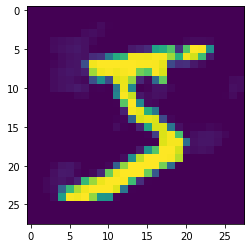

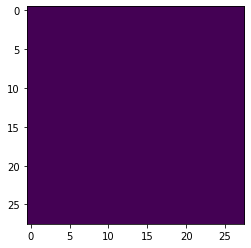

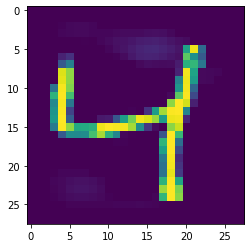

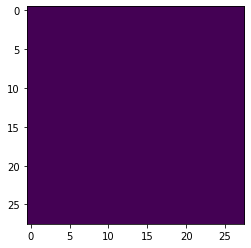

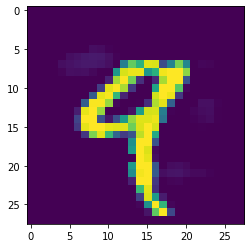

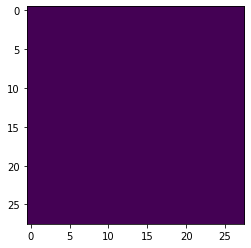

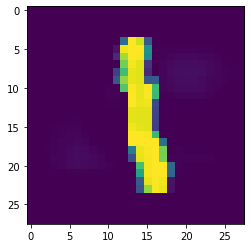

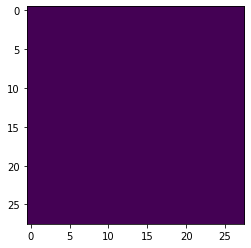

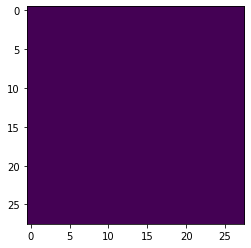

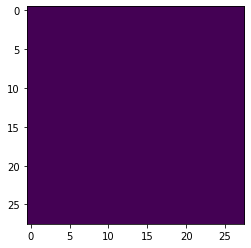

In [31]:
for i in range(10):
    plt.figure()
    plt.imshow(tf.reshape(adversarials[i], (28,28)))
    print(tf.norm(adversarials[i]-x_to_attack[i]))

In [104]:
get_zeros_ratio(model.get_weights())

(0.005010574263868554, 308, 61470)

In [90]:
len(starting_points)


1000

In [108]:
5 in cls_samples

False

In [111]:
least_likely = 5
if least_likely in cls_samples and np.argmax(model_to_attack(cls_samples[least_likely])) != np.argmax(model_to_attack(x)):
    starting_points.append(cls_samples[least_likely])
else:
    print('yay')

yay


In [43]:
model_to_attack = model
fmodel = fb.models.TensorFlowModel(model_to_attack, bounds=(0,1))
init_attack = fb.attacks.DatasetAttack()
batches = [(x_to_attack[:500], y_to_attack[:500]), (x_to_attack[500:], y_to_attack[500:])]

# create attack that picks adversarials from given dataset of samples
#init_attack = fb.attacks.DatasetAttack()
init_attack = fb.attacks.DatasetAttack()

init_attack.feed(fmodel, batches[0][0])   # feed 1st batch of inputs
init_attack.feed(fmodel, batches[1][0])   # feed 2nd batch of inputs
attack = fb.attacks.L0BrendelBethgeAttack(binary_search_steps=30, steps=500,lr_num_decay=30, lr=1e7, init_attack=init_attack)
adversarials, _, success = attack(
    fmodel,
    x_to_attack,
    criterion=fb.criteria.Misclassification(y_to_attack),
    epsilons=[None]
)
dists = [np.count_nonzero(x_to_attack[i]-adversarials[0][i]) for i in range(len(x_to_attack))]
#return dists, ([x.numpy().tolist() for x in adversarials], success.numpy().tolist())

In [80]:
sample = 429

2
label =  0


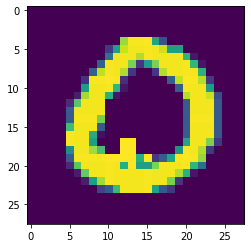

In [119]:
plt.imshow(tf.reshape(adversarials[0][sample], (28,28)))
print(np.argmax(model_to_attack(adversarials[0][sample])))
print('label = ',y_to_attack[sample].numpy())

0

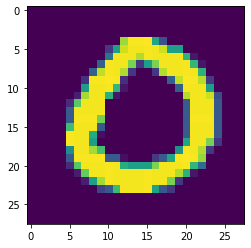

In [118]:
plt.imshow(tf.reshape(x_to_attack[sample], (28,28)))
np.argmax(model_to_attack(x_to_attack[sample]))

In [95]:
#lr 1e7
sum(dists)/1000

14.261

In [98]:
#lr 1e10
sum(dists)/1000

14.258

In [100]:
#lr 1e15
sum(dists)/1000

15.779

In [103]:
#lr 1e3 mit l0 dist datasetattack
sum(dists)/1000

18.635

In [105]:
#lr 1e3
sum(dists)/1000

16.218

In [103]:
#lr 1e7 mit l0 dist datasetattack
sum(dists)/1000

18.635

In [107]:
#lr 1e7 mit l2 dist datasetattack
sum(dists)/1000

15.352

In [110]:
#lr 1e7 mit 5000 steps 50 binary steps
sum(dists)/1000

15.402

In [112]:
#lr 1e5 mit 5000 steps 50 binary steps
sum(dists)/1000

15.19

In [114]:
#lr 1e3 mit 5000 steps 50 binary steps
sum(dists)/1000

14.014

In [121]:
#lr 1e3 mit 5000 steps 10 binary steps
sum(dists)/1000

15.332

In [123]:
#lr num decay=5, lr 1e3 mit 5000 steps 10 binary steps
sum(dists)/1000

16.215

In [125]:
#lr num decay=40, lr 1e3 mit 5000 steps 10 binary steps
sum(dists)/1000

11.85

In [127]:
#lr num decay=40, lr 1e7 mit 5000 steps 10 binary steps
sum(dists)/1000

13.066

In [12]:
#lr num decay=30, lr 1e3 mit 1000 steps 10 binary steps
sum(dists)/1000

9.63

In [14]:
#lr num decay=30, lr 1e2 mit 1000 steps 10 binary steps
sum(dists)/1000

10.005

In [16]:
#lr num decay=20, lr 1e4 mit 1000 steps 10 binary steps
sum(dists)/1000

8.635

In [18]:
#lr num decay=20, lr 1e4 mit 1000 steps 10 binary steps
sum(dists)/1000

8.667

In [20]:
#lr num decay=20, lr 1e4 mit 1000 steps 20 binary steps
sum(dists)/1000

8.0

In [22]:
#lr num decay=20, lr 1e5 mit 2000 steps 10 binary steps
sum(dists)/1000

8.125

In [24]:
#lr num decay=20, lr 1e5 mit 500 steps 30 binary steps
sum(dists)/1000

8.041

In [27]:
#lr num decay=20, lr 1e6 mit 500 steps 30 binary steps
sum(dists)/1000

7.655

In [29]:
#lr num decay=20, lr 1e7 mit 500 steps 30 binary steps
sum(dists)/1000

7.211

In [44]:
#lr num decay=40, lr 1e6 mit 500 steps 30 binary steps
sum(dists)/1000

8.208

In [31]:
#lr num decay=20, lr 1e7 mit 500 steps 40 binary steps
sum(dists)/1000

12.12

In [45]:
success

<tf.Tensor: shape=(1, 1000), dtype=bool, numpy=
array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True, 